In [1]:
%run evolution_file.py

In [2]:
def count_2413(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-3):
        for j in range(i+1,n-2):
            if P[i] < P[j]:
                for k in range(j+1,n-1):
                    if P[k] < P[i]:
                        for l in range(k+1,n):
                            if P[l] < P[j] and P[l]>  P[i]:
                                C = C+1
    return C

In [3]:
def count_2413_count(permutation):
    P = permutation
    n = len(P)
    C = 0
    TOTAL = 0
    for i in range(n-3):
        for j in range(i+1,n-2):
            if P[i] < P[j]:
                for k in range(j+1,n-1):
                    if P[k] < P[i]:
                        for l in range(k+1,n):
                            if P[l] < P[j] and P[l]>  P[i]:
                                C = C+1
                                TOTAL = TOTAL + 1
                    else:
                        TOTAL = TOTAL + 1
            else:
                TOTAL = TOTAL + 1
                
    return C

In [8]:
def Evolutionary_Algorithm_randomcrossover_2413(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(1500):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_2413(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<40001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,15)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        P3 = randomset[-3]
        P4 = randomset[-4]
        crossover_type = random.randint(1,3)
        if crossover_type == 1:
            child1 = crossover1(P1[1],P4[1])
            child2 = crossover1(P2[1],P3[1])
        if crossover_type == 2:
            [child1,child2] = crossover2(P1[1],P2[1])
        if crossover_type == 3:
            [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_2413(child1)
        fitness2 = count_2413(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:1500]
        if fe % 1000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

In [22]:
def Evolutionary_Algorithm_randomcrossover_2413_POP(n,POPULATION):
    #initialize population and compute fitness for each individual
    POP = POPULATION
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<40001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,15)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        P3 = randomset[-3]
        P4 = randomset[-4]
        crossover_type = random.randint(1,3)
        if crossover_type == 1:
            child1 = crossover1(P1[1],P4[1])
            child2 = crossover1(P2[1],P3[1])
        if crossover_type == 2:
            [child1,child2] = crossover2(P1[1],P2[1])
        if crossover_type == 3:
            [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_2413(child1)
        fitness2 = count_2413(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:15000]
        if fe % 1000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

[10000] [283695, 283695, 283651, 282003, 281001, 280325, 278555, 278327, 277640, 276028] [170363]


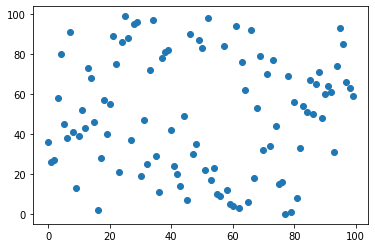

[20000] [308547, 306593, 305911, 305342, 304028, 303880, 303205, 302335, 302270, 300943] [207501]


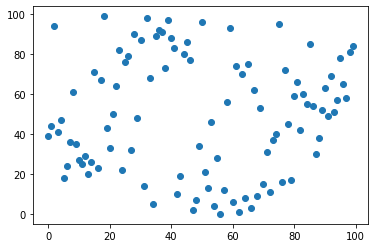

[30000] [334630, 328681, 325040, 324967, 324253, 323007, 322660, 322074, 321106, 320882] [239577]


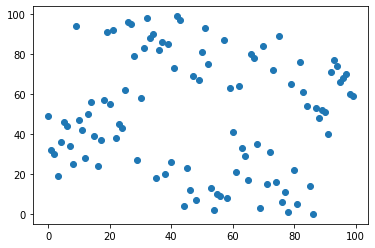

[40000] [345586, 345221, 344455, 342425, 342099, 340378, 339891, 339741, 339594, 339236] [262607]


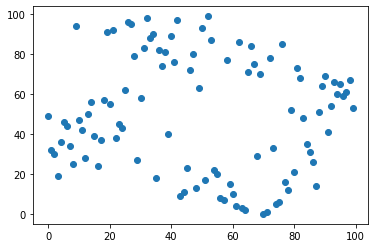

[50000] [356774, 353366, 353349, 353091, 352886, 352689, 352304, 352244, 352207, 351725] [281488]


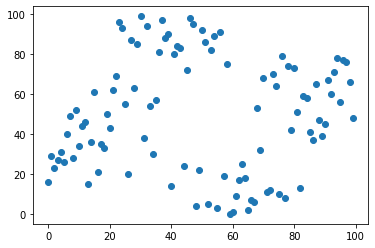

[60000] [373960, 367235, 366799, 362882, 362705, 362434, 361589, 361418, 361369, 360429] [298264]


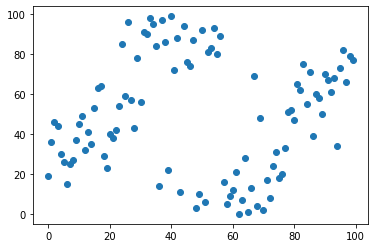

[70000] [380689, 377758, 377115, 374817, 374154, 373960, 371712, 371307, 371287, 371245] [312431]


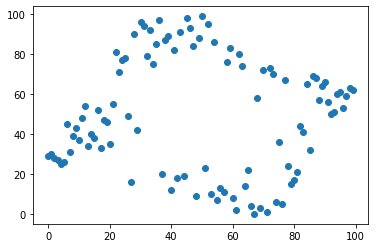

[80000] [385994, 381900, 381890, 381630, 380689, 379970, 379753, 379376, 379184, 379007] [324499]


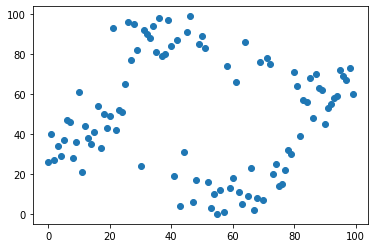

[90000] [393899, 386497, 385994, 385780, 385487, 385471, 385272, 384982, 384660, 384593] [334696]


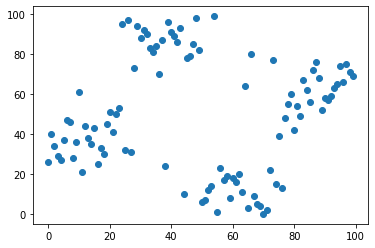

[100000] [393956, 393899, 393862, 391805, 389954, 389262, 389217, 388691, 387406, 387295] [343783]


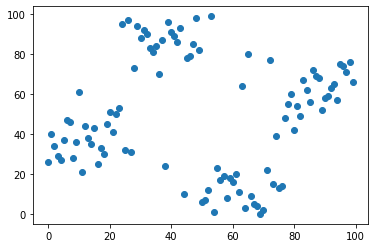

[110000] [394080, 393956, 393904, 393899, 393862, 392829, 392748, 392505, 392167, 391805] [351689]


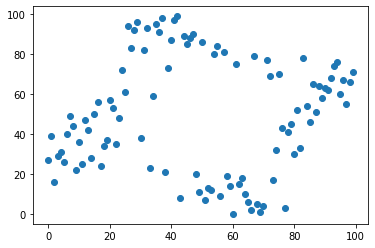

[120000] [399086, 397880, 396812, 396567, 396432, 395678, 395336, 395162, 394810, 394670] [358624]


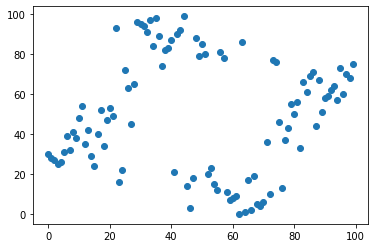

[130000] [400174, 399728, 399321, 399231, 399086, 398951, 398887, 398684, 398608, 398149] [364614]


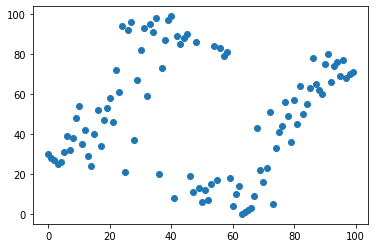

[140000] [402286, 402128, 401069, 400647, 400174, 399864, 399736, 399728, 399411, 399343] [369866]


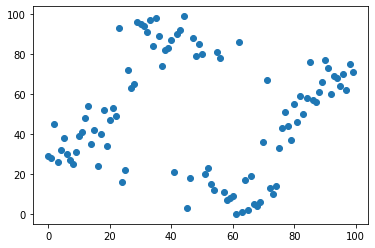

[150000] [404382, 403964, 403644, 402920, 402587, 402333, 402304, 402286, 402225, 402128] [374448]


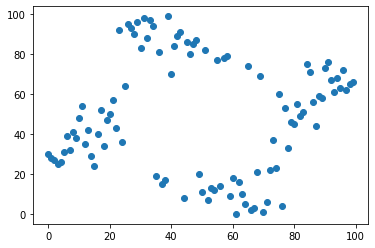

[160000] [407518, 407066, 406477, 405914, 405757, 405604, 404648, 404580, 404538, 404457] [378629]


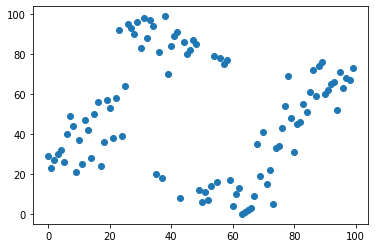

[170000] [408504, 407518, 407438, 407438, 407386, 407262, 407066, 406917, 406694, 406659] [382190]


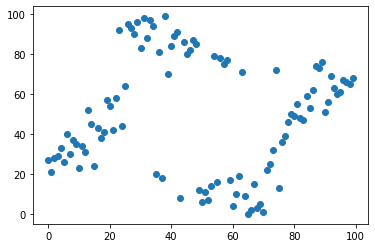

[180000] [410346, 409551, 409060, 408998, 408937, 408899, 408875, 408504, 408384, 408105] [385565]


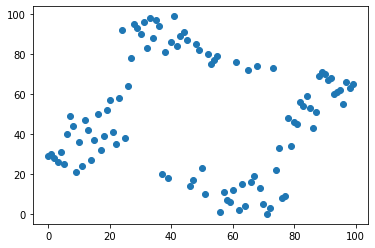

[190000] [413426, 413361, 413326, 411791, 411513, 411501, 411187, 410368, 410346, 410336] [388584]


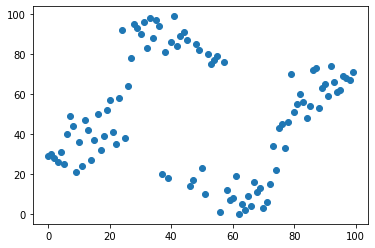

[200000] [414916, 414273, 414226, 413593, 413426, 413361, 413326, 413068, 412555, 412420] [391221]


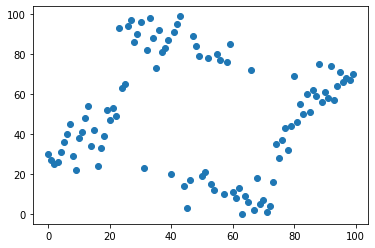

[210000] [415672, 414916, 414630, 414322, 414273, 414233, 414226, 414216, 414103, 414088] [393741]


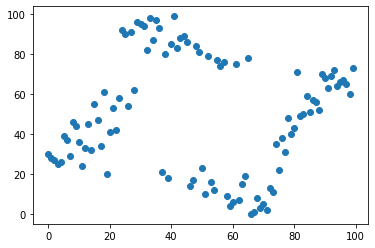

[220000] [416048, 415969, 415672, 415641, 415214, 415153, 415093, 415040, 414960, 414921] [396010]


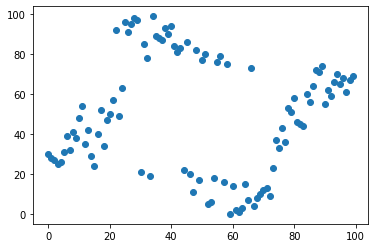

[230000] [416048, 415969, 415672, 415641, 415522, 415481, 415328, 415234, 415214, 415165] [398122]


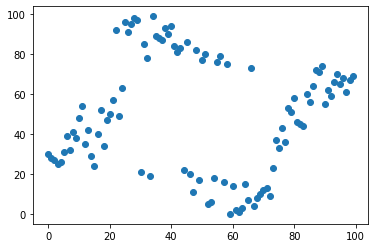

[240000] [417759, 417759, 416760, 416543, 416537, 416347, 416316, 416282, 416087, 416075] [400145]


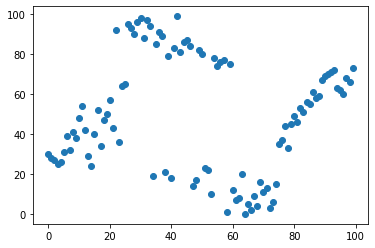

[250000] [418545, 417838, 417759, 417759, 417759, 417745, 417516, 417397, 417359, 417328] [401987]


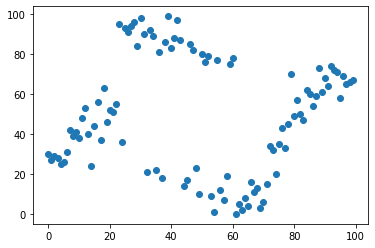

[260000] [418671, 418668, 418641, 418632, 418545, 418545, 418340, 418130, 417838, 417792] [403709]


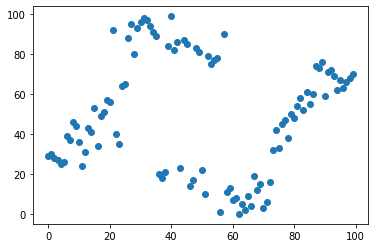

[270000] [419023, 418870, 418755, 418716, 418710, 418671, 418669, 418668, 418642, 418641] [405204]


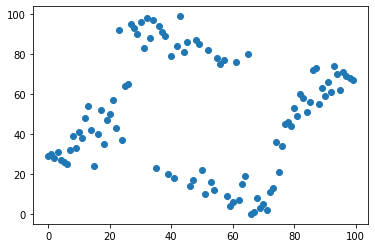

[280000] [420642, 420594, 420558, 420275, 420060, 420054, 419933, 419715, 419589, 419589] [406628]


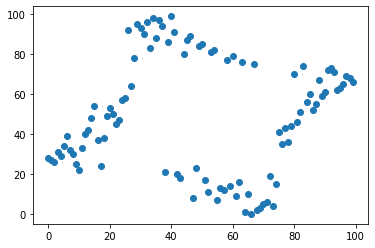

[290000] [420857, 420642, 420594, 420558, 420546, 420508, 420476, 420457, 420306, 420305] [407948]


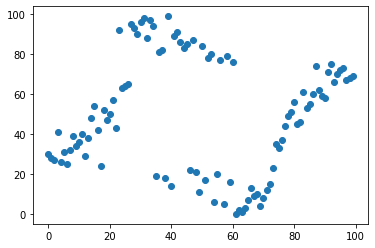

[300000] [422945, 421357, 421298, 421170, 421162, 421089, 420865, 420857, 420785, 420774] [409177]


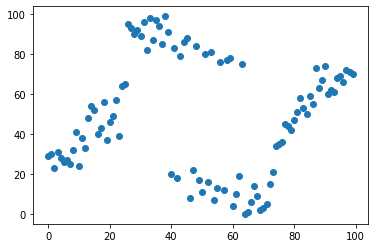

[310000] [423433, 422971, 422956, 422945, 422857, 422408, 422333, 422244, 421949, 421848] [410321]


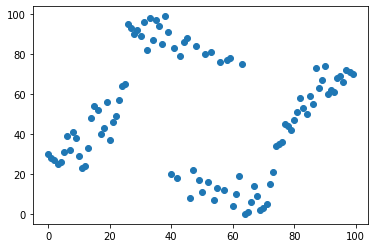

[320000] [423433, 423058, 422975, 422971, 422969, 422956, 422945, 422873, 422857, 422609] [411406]


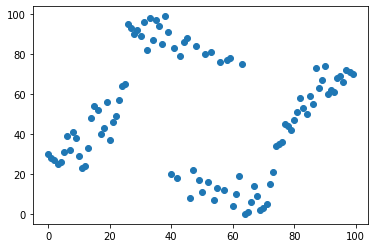

[330000] [423433, 423187, 423145, 423141, 423101, 423060, 423058, 422975, 422971, 422971] [412344]


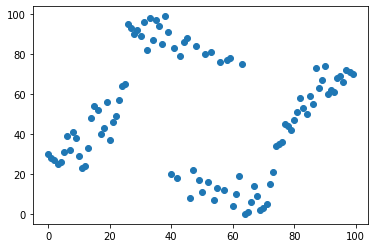

[340000] [423770, 423508, 423507, 423433, 423402, 423402, 423367, 423346, 423286, 423245] [413263]


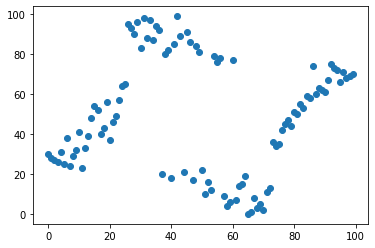

[350000] [424706, 424341, 424225, 424082, 424067, 423891, 423802, 423770, 423716, 423629] [414140]


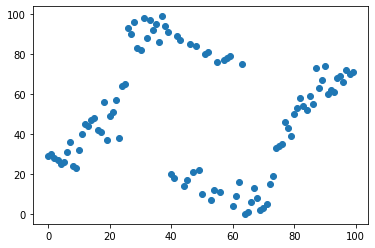

[360000] [425017, 424904, 424818, 424804, 424765, 424706, 424638, 424573, 424444, 424341] [414999]


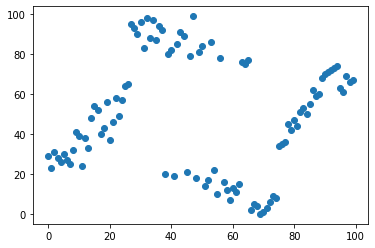

[370000] [426175, 425511, 425280, 425178, 425069, 425028, 425017, 424959, 424904, 424841] [415832]


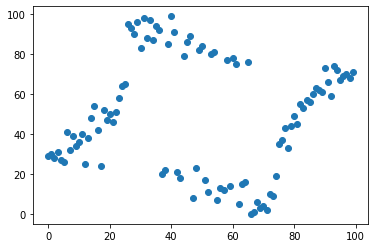

[380000] [426474, 426277, 426179, 426175, 426023, 426015, 425938, 425831, 425804, 425791] [416711]


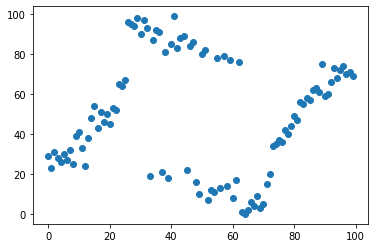

[390000] [427107, 427107, 426827, 426737, 426709, 426597, 426474, 426389, 426385, 426363] [417507]


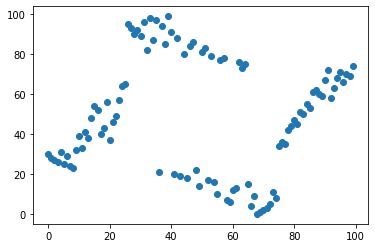

[400000] [427990, 427896, 427663, 427612, 427406, 427252, 427246, 427133, 427107, 427107] [418251]


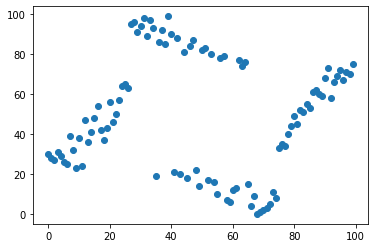

In [18]:
EA0 = Evolutionary_Algorithm_randomcrossover_2413(100)

[10000] [427998, 427997, 427993, 427993, 427990, 427982, 427896, 427803, 427771, 427728] [418941]


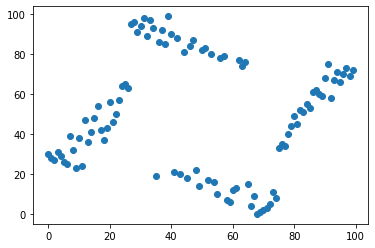

[20000] [428756, 427998, 427997, 427997, 427997, 427993, 427993, 427993, 427990, 427982] [419627]


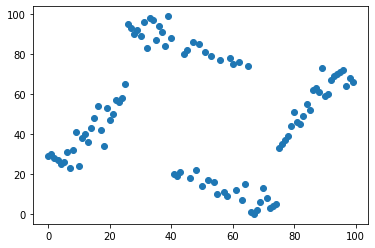

[30000] [428756, 428749, 428654, 428616, 428441, 428225, 428203, 428176, 428153, 428132] [420307]


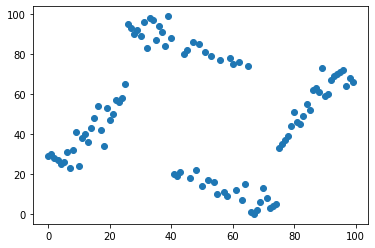

[40000] [428908, 428858, 428797, 428756, 428749, 428710, 428703, 428674, 428660, 428654] [420925]


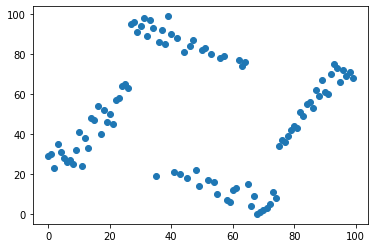

[50000] [429359, 429318, 429305, 429204, 428908, 428858, 428825, 428818, 428806, 428797] [421559]


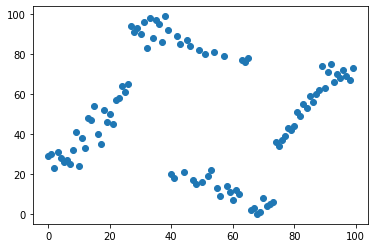

[60000] [429444, 429359, 429318, 429318, 429310, 429305, 429296, 429254, 429213, 429204] [422133]


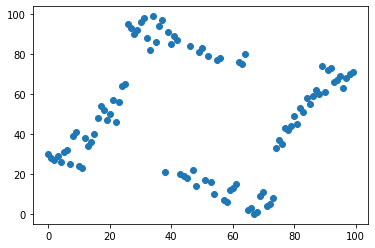

[70000] [429799, 429738, 429672, 429583, 429547, 429445, 429444, 429391, 429359, 429325] [422684]


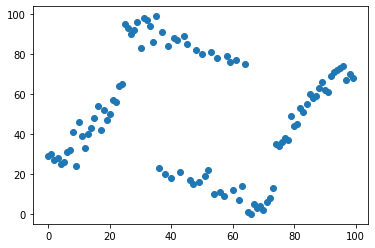

[80000] [430096, 430075, 429981, 429956, 429946, 429931, 429928, 429882, 429873, 429873] [423165]


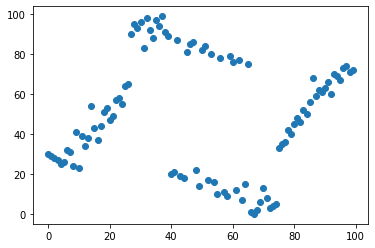

[90000] [430442, 430133, 430096, 430075, 430032, 430024, 430022, 430020, 430019, 429983] [423682]


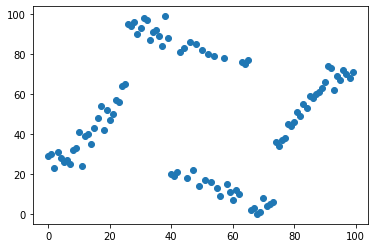

[100000] [431050, 430753, 430442, 430364, 430362, 430270, 430222, 430210, 430209, 430204] [424160]


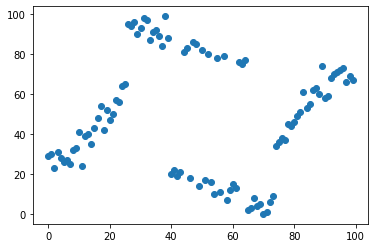

[110000] [431054, 431050, 430753, 430689, 430606, 430580, 430495, 430475, 430442, 430429] [424704]


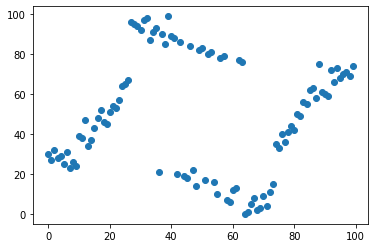

[120000] [431232, 431054, 431050, 430911, 430875, 430805, 430753, 430751, 430722, 430704] [425202]


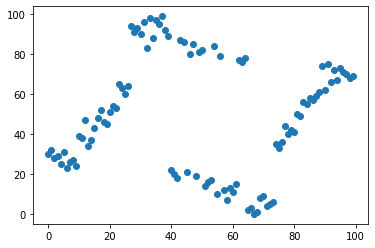

[130000] [431232, 431082, 431054, 431054, 431050, 431003, 430992, 430923, 430911, 430883] [425661]


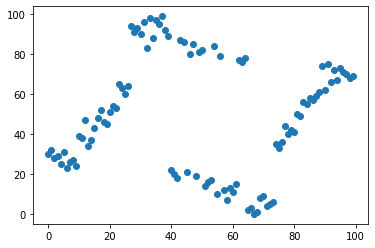

[140000] [431694, 431513, 431278, 431232, 431229, 431218, 431173, 431149, 431136, 431105] [426118]


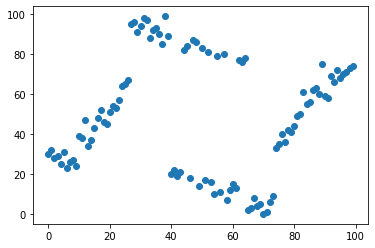

[150000] [431694, 431513, 431388, 431354, 431287, 431278, 431275, 431253, 431253, 431244] [426546]


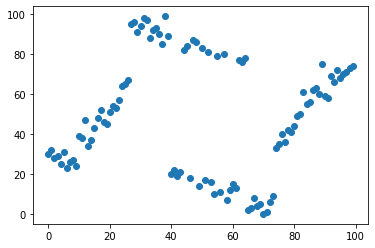

[160000] [431694, 431579, 431513, 431492, 431440, 431430, 431388, 431354, 431330, 431322] [426945]


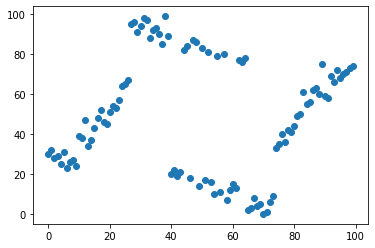

[170000] [432308, 431975, 431861, 431718, 431709, 431694, 431579, 431576, 431557, 431513] [427338]


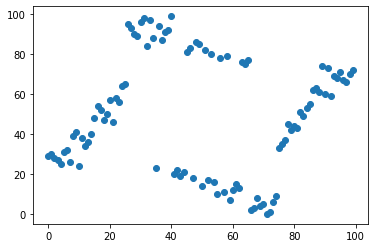

[180000] [432320, 432308, 431975, 431866, 431861, 431817, 431817, 431803, 431748, 431748] [427696]


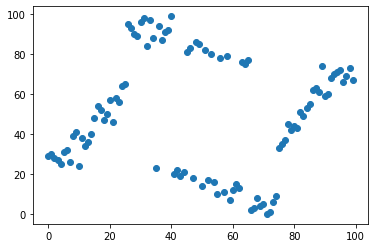

[190000] [432320, 432308, 432115, 431997, 431975, 431880, 431866, 431865, 431861, 431856] [428042]


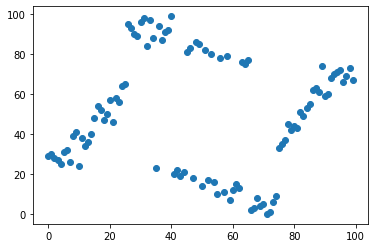

[200000] [432320, 432320, 432308, 432298, 432211, 432173, 432161, 432130, 432129, 432125] [428342]


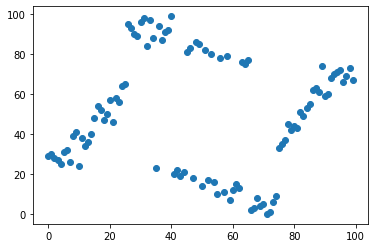

[210000] [432320, 432320, 432308, 432298, 432211, 432183, 432183, 432182, 432176, 432173] [428644]


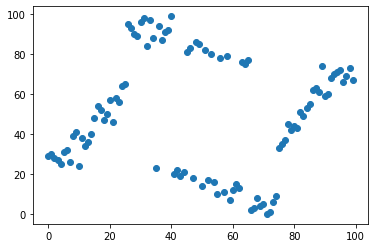

[220000] [432378, 432370, 432369, 432330, 432320, 432320, 432317, 432308, 432298, 432290] [428898]


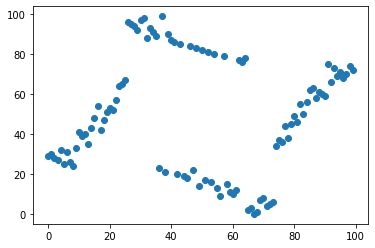

[230000] [432480, 432406, 432378, 432377, 432370, 432370, 432369, 432369, 432368, 432333] [429149]


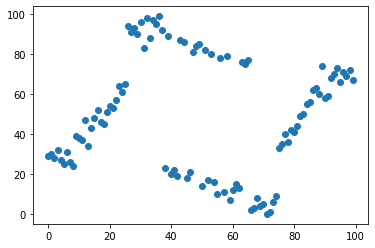

[240000] [432746, 432560, 432536, 432486, 432480, 432470, 432452, 432428, 432423, 432406] [429373]


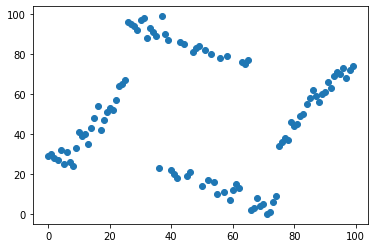

[250000] [432889, 432746, 432663, 432647, 432566, 432560, 432541, 432539, 432536, 432526] [429575]


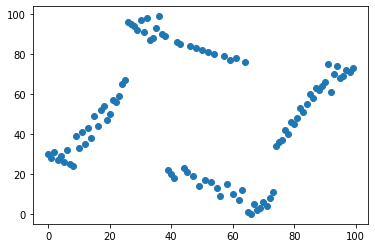

[260000] [432889, 432857, 432746, 432723, 432663, 432658, 432647, 432644, 432629, 432617] [429769]


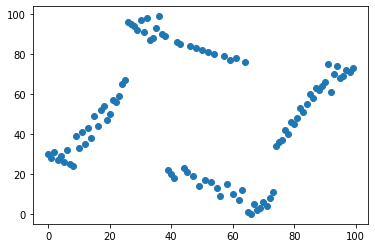

[270000] [432993, 432889, 432857, 432857, 432851, 432794, 432746, 432742, 432728, 432723] [429944]


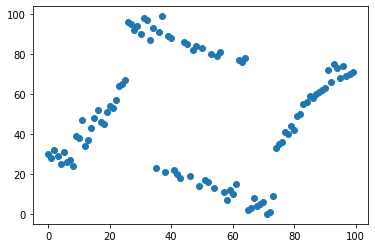

[280000] [433196, 433017, 433000, 432993, 432908, 432900, 432889, 432889, 432888, 432873] [430129]


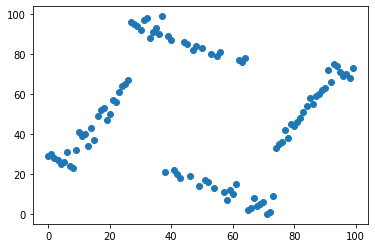

[290000] [433196, 433017, 433000, 432993, 432981, 432977, 432946, 432945, 432931, 432923] [430320]


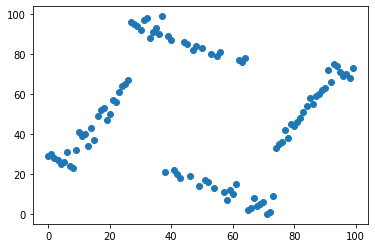

[300000] [433196, 433097, 433085, 433053, 433043, 433017, 433016, 433009, 433000, 432997] [430492]


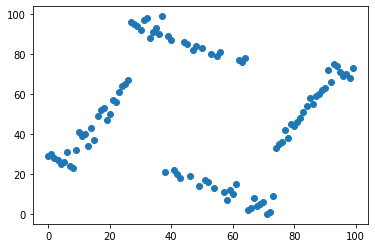

[310000] [433235, 433235, 433196, 433158, 433124, 433097, 433085, 433083, 433077, 433070] [430659]


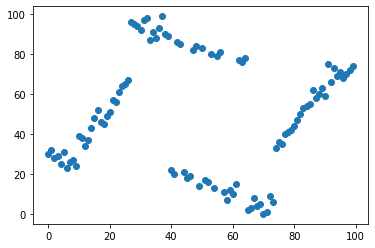

[320000] [433371, 433303, 433239, 433235, 433235, 433235, 433226, 433221, 433221, 433221] [430801]


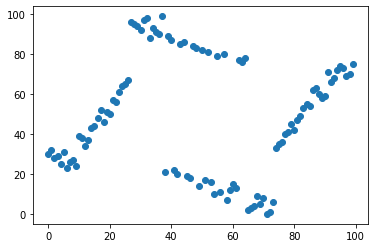

[330000] [433526, 433371, 433371, 433339, 433307, 433303, 433302, 433287, 433267, 433260] [430940]


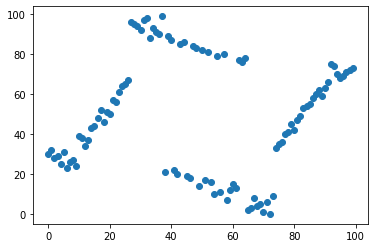

[340000] [433526, 433509, 433419, 433371, 433371, 433339, 433335, 433313, 433307, 433306] [431078]


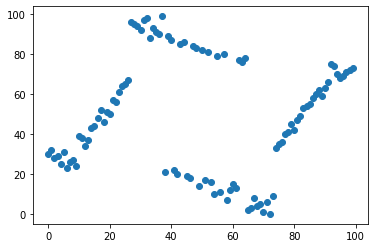

[350000] [433604, 433553, 433532, 433527, 433526, 433509, 433486, 433452, 433449, 433419] [431216]


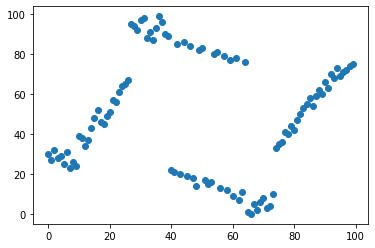

[360000] [433631, 433619, 433604, 433601, 433593, 433590, 433586, 433585, 433580, 433565] [431341]


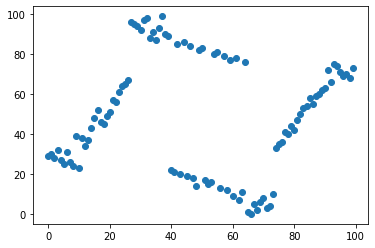

[370000] [433863, 433663, 433661, 433649, 433642, 433641, 433631, 433631, 433629, 433624] [431475]


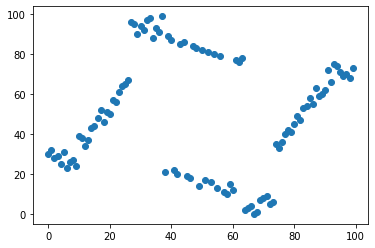

[380000] [433954, 433863, 433861, 433716, 433706, 433663, 433661, 433660, 433658, 433657] [431605]


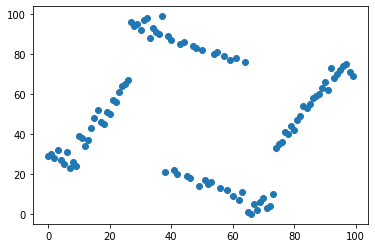

[390000] [434019, 433977, 433957, 433954, 433951, 433896, 433863, 433861, 433861, 433779] [431739]


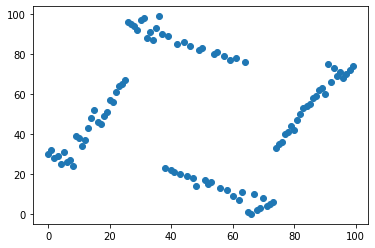

[400000] [434091, 434035, 434019, 433998, 433977, 433957, 433954, 433951, 433945, 433908] [431881]


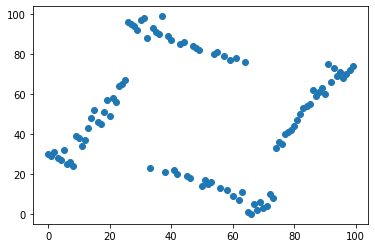

In [20]:
EA1 = Evolutionary_Algorithm_randomcrossover_2413_POP(100,EA0)

[10000] [434091, 434052, 434050, 434035, 434035, 434019, 434012, 433998, 433977, 433975] [432042]


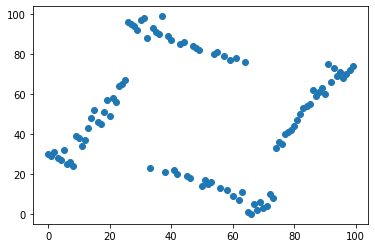

[20000] [434143, 434092, 434091, 434090, 434080, 434079, 434078, 434062, 434056, 434052] [432187]


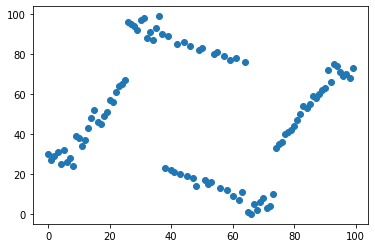

[30000] [434298, 434295, 434245, 434176, 434175, 434143, 434142, 434138, 434092, 434091] [432325]


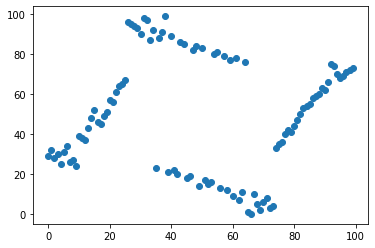

[40000] [434444, 434414, 434392, 434359, 434358, 434298, 434295, 434283, 434256, 434245] [432465]


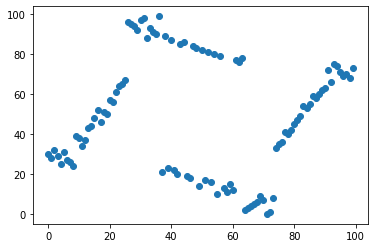

[50000] [434620, 434578, 434444, 434444, 434425, 434421, 434417, 434414, 434392, 434371] [432603]


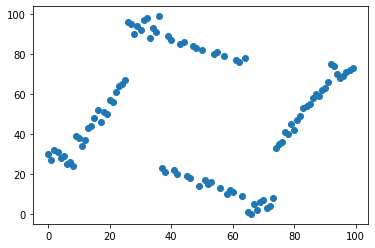

[60000] [434636, 434620, 434585, 434581, 434578, 434558, 434482, 434456, 434455, 434444] [432732]


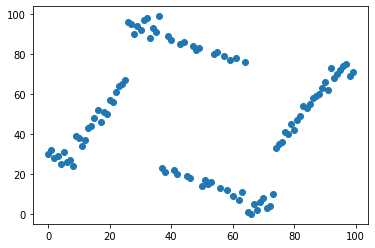

[70000] [434664, 434661, 434658, 434644, 434636, 434630, 434629, 434620, 434620, 434615] [432873]


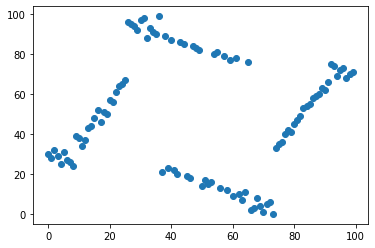

[80000] [434753, 434740, 434739, 434734, 434733, 434729, 434728, 434727, 434727, 434724] [433015]


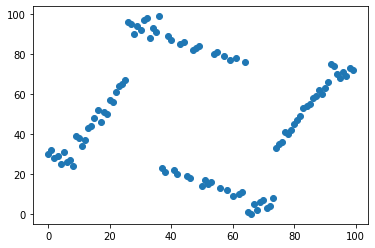

[90000] [434753, 434750, 434750, 434748, 434747, 434746, 434742, 434740, 434740, 434740] [433155]


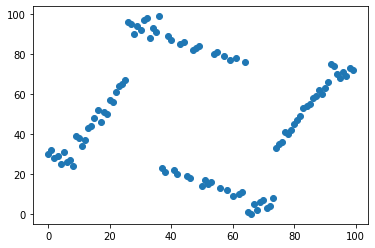

[100000] [434785, 434774, 434767, 434767, 434760, 434760, 434758, 434757, 434756, 434756] [433288]


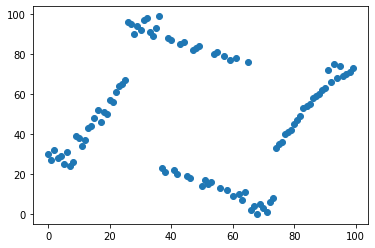

[110000] [434888, 434852, 434839, 434839, 434826, 434824, 434819, 434809, 434805, 434798] [433450]


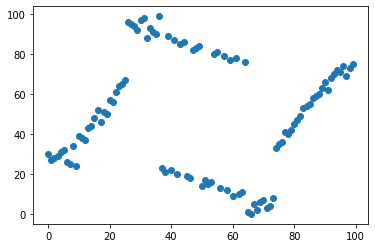

[120000] [434935, 434895, 434893, 434892, 434892, 434888, 434877, 434852, 434850, 434849] [433580]


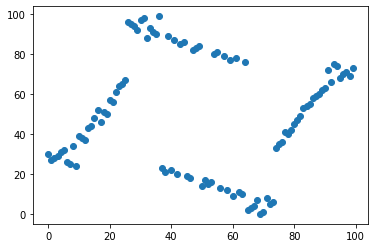

[130000] [434936, 434935, 434932, 434929, 434925, 434912, 434910, 434906, 434900, 434895] [433689]


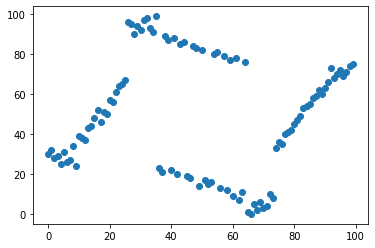

[140000] [434989, 434980, 434969, 434948, 434947, 434945, 434941, 434941, 434940, 434939] [433834]


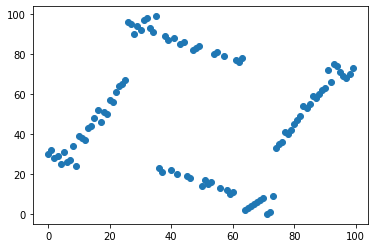

[150000] [435041, 435009, 435008, 435007, 435000, 434997, 434996, 434995, 434994, 434989] [433938]


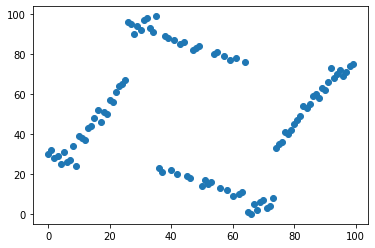

[160000] [435115, 435101, 435097, 435094, 435085, 435060, 435049, 435048, 435048, 435044] [434041]


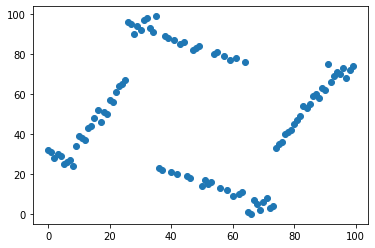

[170000] [435119, 435118, 435117, 435115, 435115, 435115, 435110, 435107, 435105, 435101] [434134]


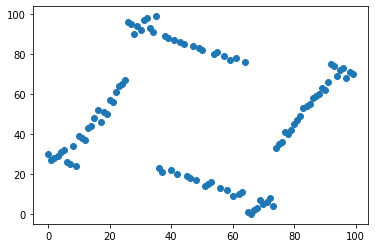

[180000] [435138, 435131, 435123, 435122, 435120, 435119, 435119, 435118, 435118, 435118] [434210]


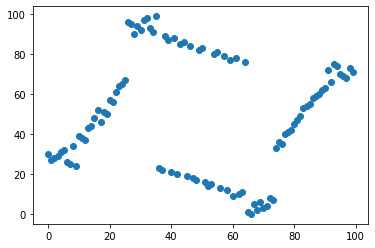

[190000] [435178, 435159, 435156, 435146, 435141, 435140, 435140, 435138, 435138, 435138] [434424]


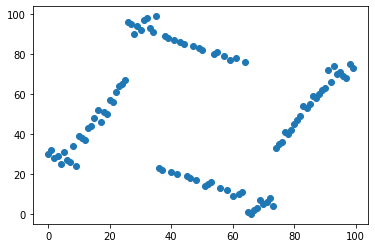

[200000] [435202, 435202, 435181, 435180, 435180, 435180, 435180, 435180, 435178, 435178] [434580]


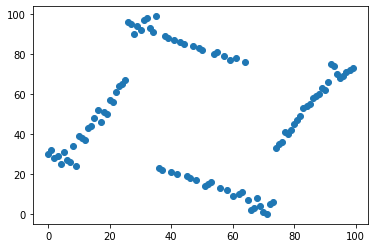

[210000] [435214, 435212, 435211, 435211, 435208, 435207, 435202, 435202, 435202, 435202] [434684]


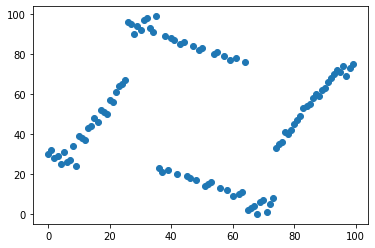

[220000] [435257, 435255, 435253, 435240, 435235, 435221, 435216, 435216, 435215, 435215] [434733]


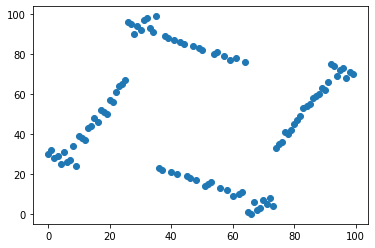

[230000] [435290, 435290, 435278, 435278, 435276, 435270, 435266, 435261, 435260, 435260] [434757]


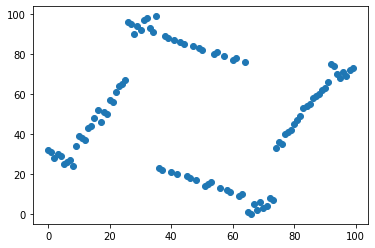

[240000] [435300, 435300, 435297, 435297, 435296, 435294, 435293, 435292, 435290, 435290] [434803]


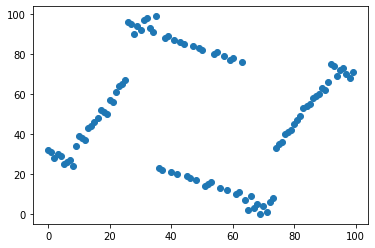

[250000] [435355, 435338, 435338, 435333, 435317, 435307, 435306, 435306, 435304, 435304] [434850]


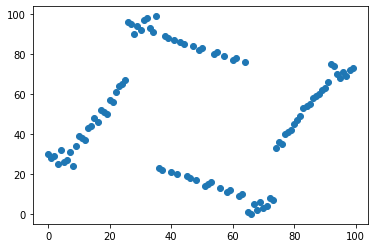

[260000] [435372, 435370, 435361, 435360, 435359, 435359, 435359, 435358, 435357, 435355] [434897]


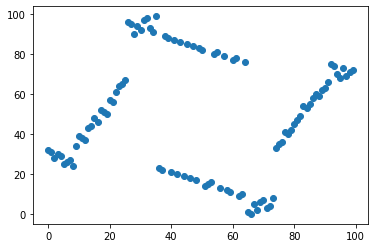

[270000] [435410, 435400, 435390, 435390, 435384, 435378, 435377, 435377, 435373, 435372] [434947]


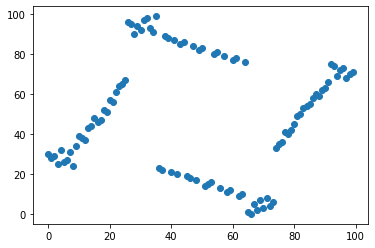

[280000] [435425, 435410, 435410, 435407, 435405, 435405, 435403, 435401, 435400, 435400] [435002]


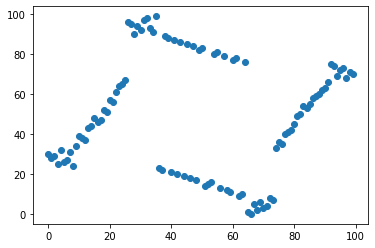

[290000] [435441, 435435, 435425, 435425, 435421, 435416, 435410, 435410, 435410, 435410] [435036]


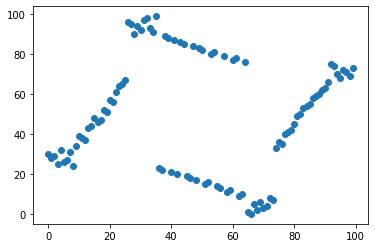

[300000] [435458, 435457, 435443, 435441, 435439, 435436, 435435, 435435, 435435, 435435] [435083]


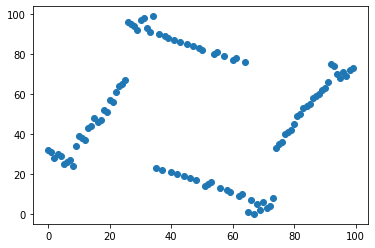

[310000] [435458, 435457, 435457, 435445, 435445, 435443, 435442, 435441, 435441, 435441] [435113]


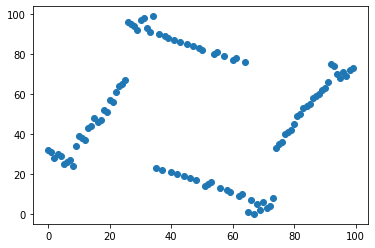

[320000] [435467, 435462, 435461, 435461, 435461, 435461, 435459, 435459, 435458, 435457] [435130]


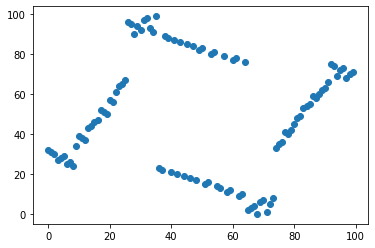

[330000] [435497, 435491, 435476, 435474, 435474, 435474, 435474, 435474, 435474, 435471] [435159]


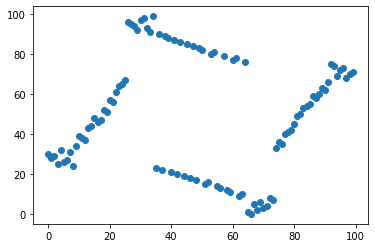

[340000] [435497, 435497, 435497, 435494, 435493, 435491, 435491, 435491, 435489, 435488] [435189]


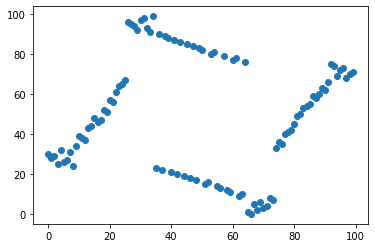

[350000] [435505, 435505, 435503, 435499, 435497, 435497, 435497, 435497, 435497, 435496] [435207]


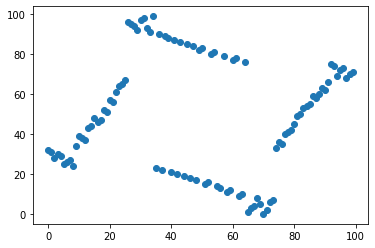

[360000] [435505, 435505, 435505, 435503, 435499, 435499, 435499, 435499, 435498, 435497] [435218]


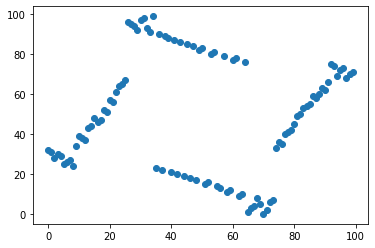

[370000] [435510, 435506, 435506, 435505, 435505, 435505, 435505, 435505, 435505, 435505] [435249]


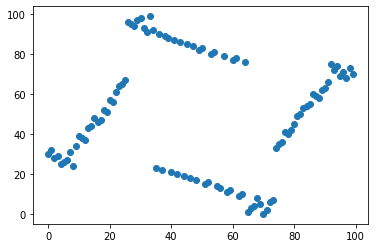

[380000] [435512, 435512, 435511, 435511, 435511, 435511, 435511, 435511, 435510, 435510] [435274]


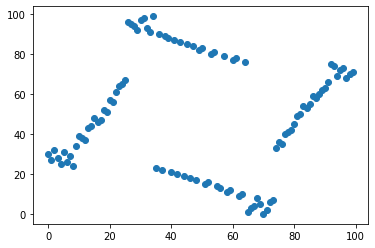

[390000] [435519, 435519, 435519, 435515, 435513, 435513, 435513, 435513, 435513, 435512] [435294]


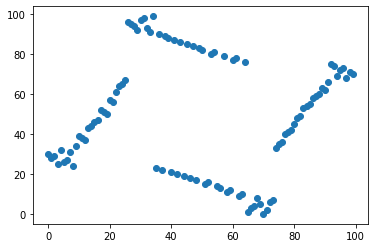

[400000] [435521, 435521, 435519, 435519, 435519, 435519, 435519, 435519, 435519, 435519] [435332]


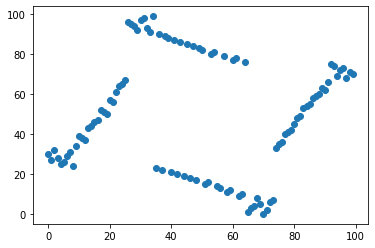

In [21]:
EA2 = Evolutionary_Algorithm_randomcrossover_2413_POP(100,EA1)

[10000] [435522, 435522, 435521, 435521, 435521, 435521, 435521, 435521, 435521, 435521] [435356]


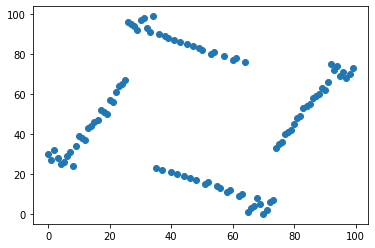

[20000] [435529, 435524, 435524, 435523, 435523, 435522, 435522, 435522, 435522, 435522] [435373]


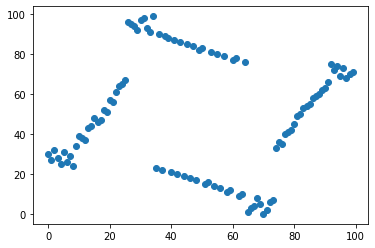

[30000] [435538, 435533, 435531, 435529, 435529, 435529, 435528, 435526, 435526, 435525] [435389]


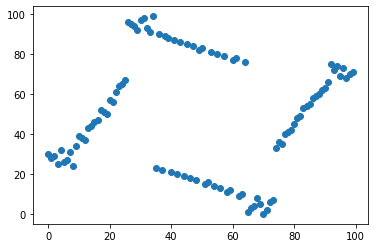

[40000] [435538, 435533, 435532, 435531, 435531, 435530, 435530, 435529, 435529, 435529] [435405]


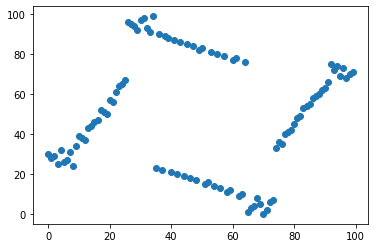

[50000] [435548, 435540, 435539, 435539, 435538, 435538, 435537, 435535, 435533, 435533] [435419]


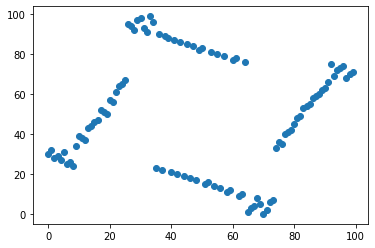

[60000] [435548, 435548, 435546, 435544, 435542, 435542, 435541, 435541, 435541, 435540] [435436]


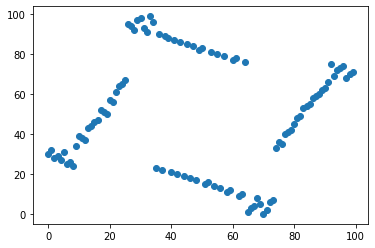

[70000] [435559, 435556, 435555, 435553, 435551, 435550, 435550, 435549, 435549, 435549] [435446]


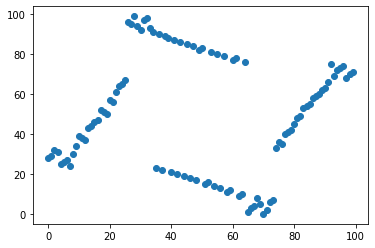

[80000] [435563, 435559, 435557, 435557, 435557, 435556, 435556, 435556, 435555, 435555] [435460]


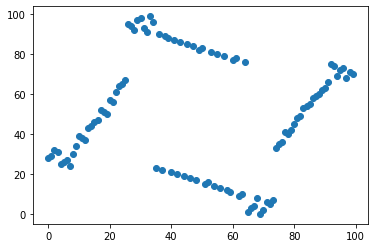

[90000] [435567, 435565, 435565, 435563, 435563, 435563, 435563, 435563, 435562, 435562] [435476]


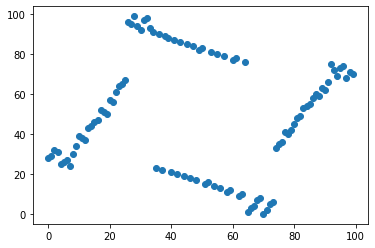

[100000] [435567, 435566, 435565, 435565, 435565, 435565, 435564, 435564, 435564, 435564] [435491]


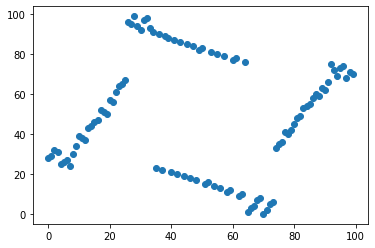

[110000] [435570, 435570, 435569, 435569, 435569, 435569, 435569, 435568, 435568, 435567] [435497]


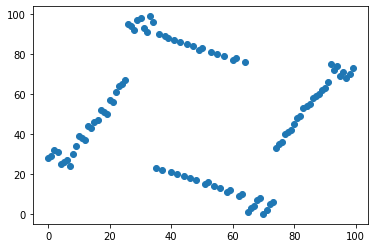

[120000] [435577, 435573, 435573, 435572, 435572, 435572, 435572, 435572, 435571, 435571] [435505]


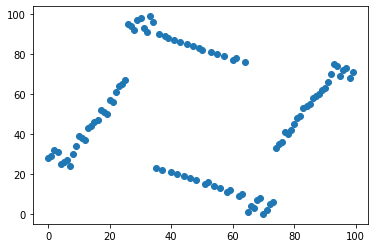

[130000] [435578, 435577, 435574, 435574, 435574, 435574, 435573, 435573, 435573, 435573] [435511]


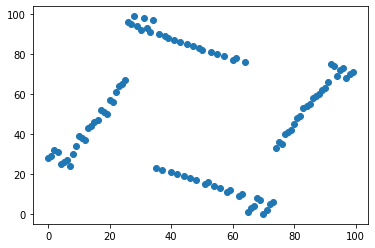

[140000] [435580, 435580, 435578, 435578, 435577, 435577, 435577, 435577, 435577, 435577] [435512]


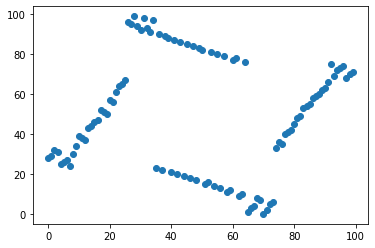

[150000] [435580, 435580, 435580, 435580, 435580, 435580, 435580, 435580, 435580, 435580] [435516]


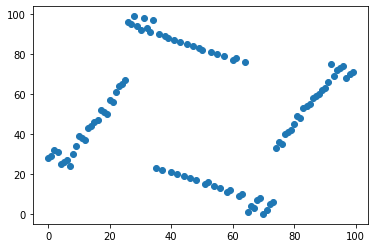

[160000] [435588, 435588, 435588, 435586, 435586, 435586, 435586, 435585, 435585, 435582] [435520]


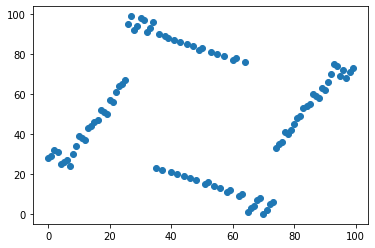

[170000] [435591, 435591, 435591, 435589, 435589, 435589, 435589, 435589, 435589, 435589] [435523]


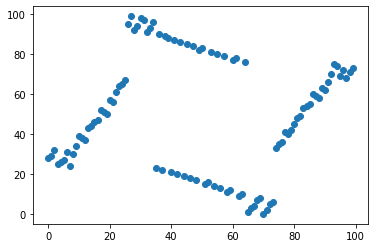

[180000] [435591, 435591, 435591, 435591, 435591, 435591, 435591, 435591, 435591, 435591] [435529]


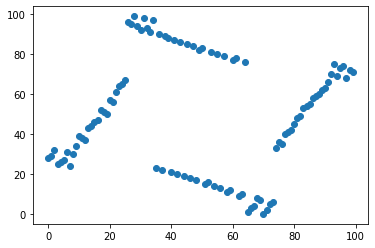

[190000] [435595, 435594, 435593, 435592, 435592, 435591, 435591, 435591, 435591, 435591] [435538]


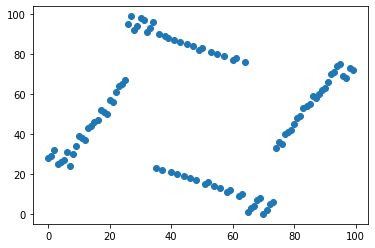

[200000] [435601, 435599, 435598, 435598, 435596, 435595, 435594, 435593, 435593, 435593] [435547]


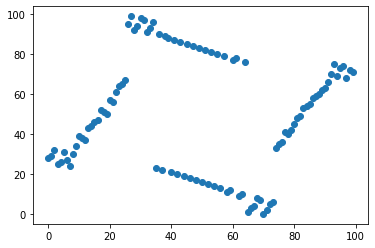

[210000] [435602, 435602, 435602, 435601, 435599, 435598, 435598, 435598, 435598, 435598] [435553]


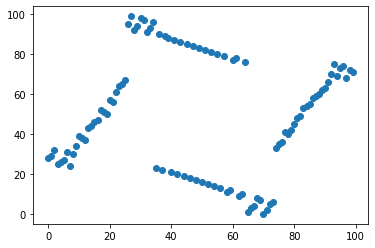

[220000] [435604, 435602, 435602, 435602, 435602, 435602, 435602, 435601, 435601, 435600] [435559]


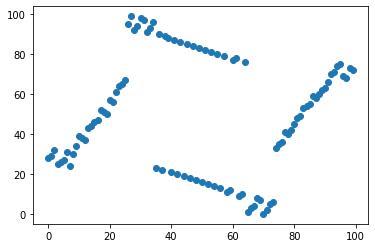

[230000] [435604, 435604, 435604, 435604, 435604, 435604, 435603, 435603, 435602, 435602] [435563]


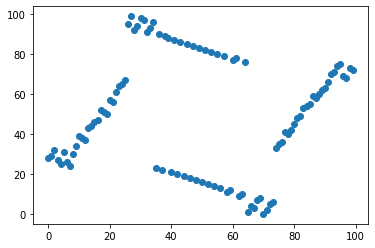

[240000] [435609, 435607, 435607, 435607, 435605, 435605, 435605, 435605, 435605, 435605] [435567]


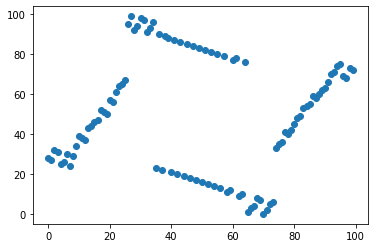

[250000] [435609, 435609, 435609, 435609, 435609, 435609, 435607, 435607, 435607, 435607] [435570]


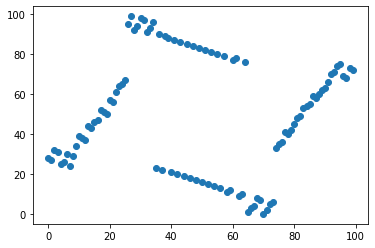

[260000] [435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609] [435572]


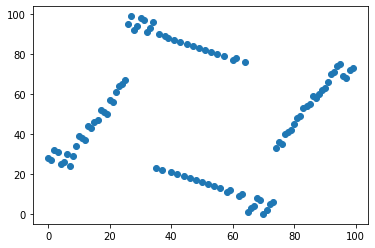

[270000] [435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609] [435574]


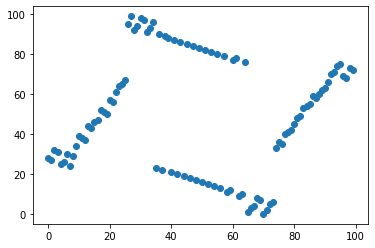

[280000] [435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609] [435580]


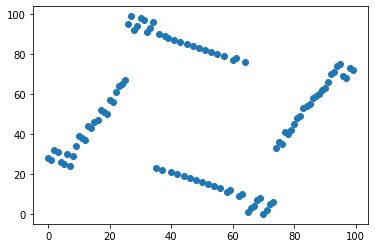

[290000] [435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609] [435583]


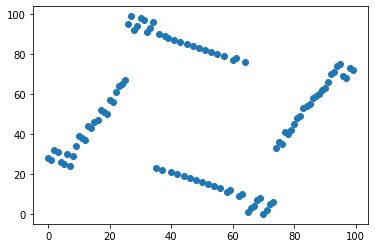

[300000] [435610, 435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609, 435609] [435588]


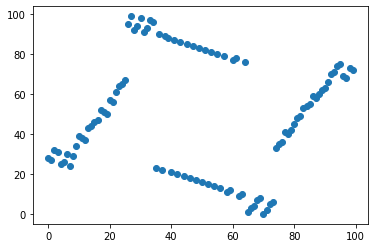

[310000] [435610, 435610, 435610, 435610, 435609, 435609, 435609, 435609, 435609, 435609] [435589]


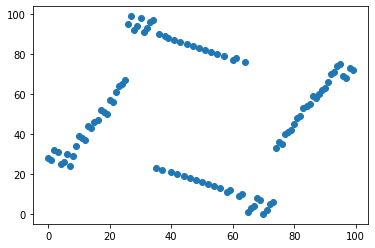

[320000] [435610, 435610, 435610, 435610, 435610, 435610, 435610, 435610, 435610, 435610] [435591]


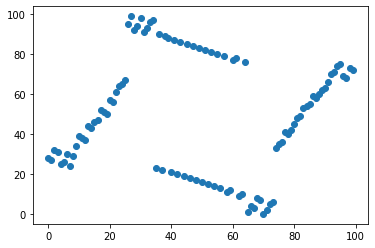

[330000] [435610, 435610, 435610, 435610, 435610, 435610, 435610, 435610, 435610, 435610] [435591]


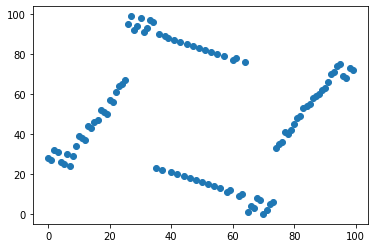

[340000] [435611, 435611, 435611, 435611, 435611, 435611, 435610, 435610, 435610, 435610] [435593]


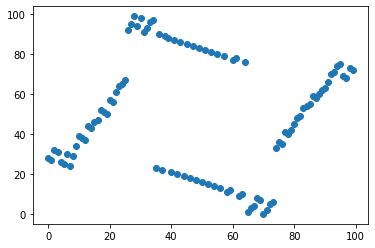

[350000] [435611, 435611, 435611, 435611, 435611, 435611, 435611, 435611, 435611, 435611] [435599]


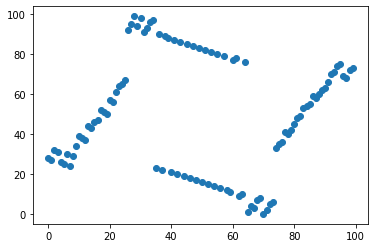

[360000] [435611, 435611, 435611, 435611, 435611, 435611, 435611, 435611, 435611, 435611] [435602]


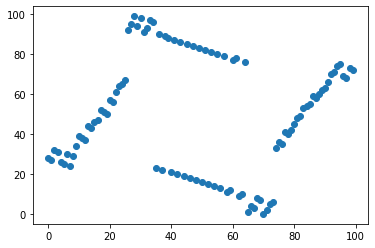

[370000] [435611, 435611, 435611, 435611, 435611, 435611, 435611, 435611, 435611, 435611] [435604]


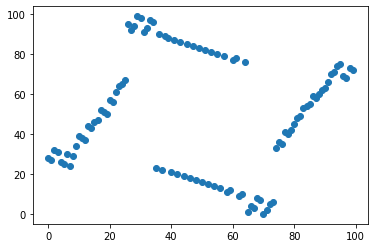

[380000] [435614, 435614, 435614, 435613, 435611, 435611, 435611, 435611, 435611, 435611] [435607]


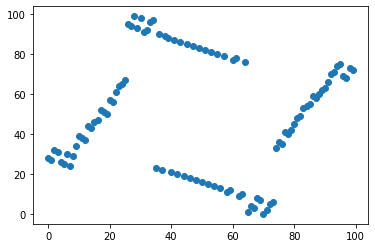

[390000] [435614, 435614, 435614, 435614, 435614, 435614, 435614, 435614, 435614, 435614] [435609]


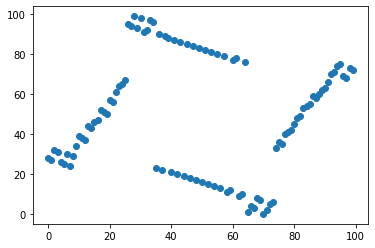

[400000] [435614, 435614, 435614, 435614, 435614, 435614, 435614, 435614, 435614, 435614] [435609]


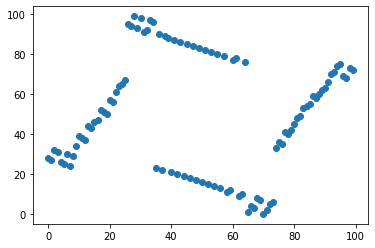

In [22]:
EA3 = Evolutionary_Algorithm_randomcrossover_2413_POP(100,EA2)

[10000] [435614, 435614, 435614, 435614, 435614, 435614, 435614, 435614, 435614, 435614] [435609]


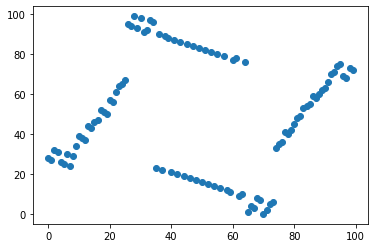

[20000] [435615, 435615, 435615, 435615, 435614, 435614, 435614, 435614, 435614, 435614] [435609]


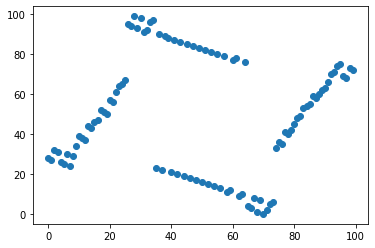

[30000] [435615, 435615, 435615, 435615, 435615, 435615, 435615, 435615, 435615, 435615] [435609]


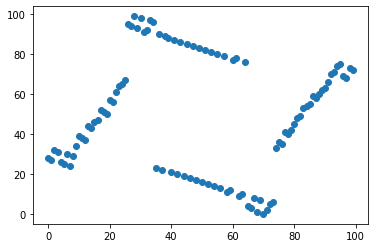

[40000] [435615, 435615, 435615, 435615, 435615, 435615, 435615, 435615, 435615, 435615] [435609]


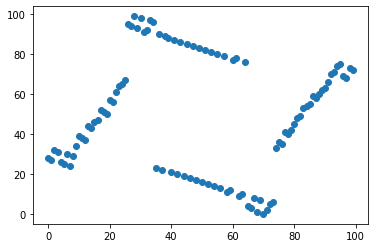

[50000] [435616, 435616, 435615, 435615, 435615, 435615, 435615, 435615, 435615, 435615] [435609]


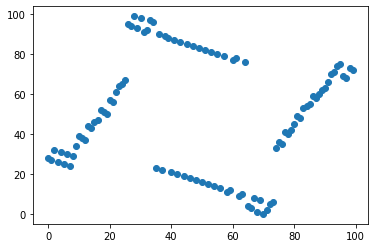

[60000] [435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616] [435610]


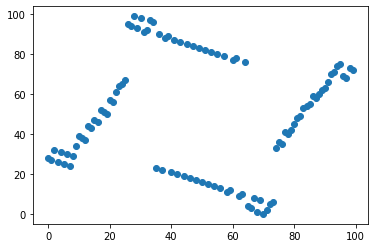

[70000] [435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616] [435610]


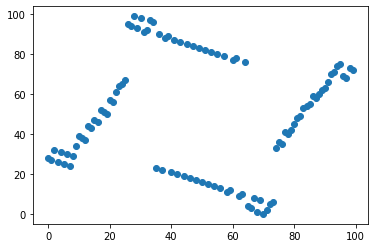

[80000] [435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616] [435610]


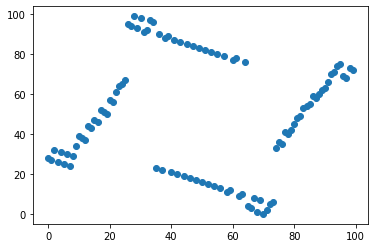

[90000] [435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616] [435611]


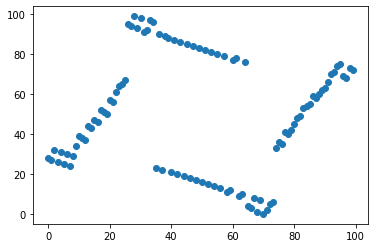

[100000] [435617, 435617, 435616, 435616, 435616, 435616, 435616, 435616, 435616, 435616] [435611]


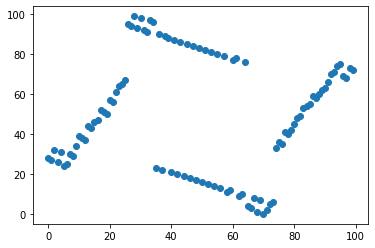

[110000] [435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617] [435611]


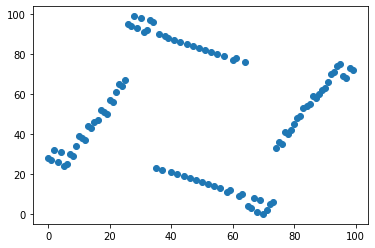

[120000] [435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617] [435612]


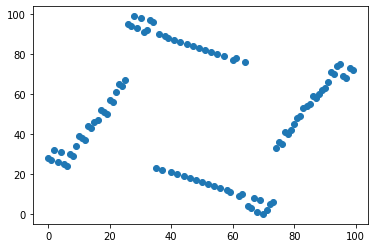

[130000] [435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617] [435614]


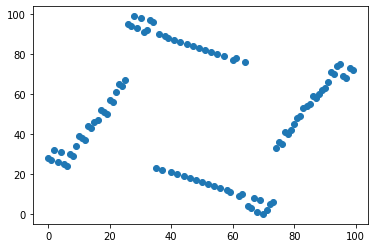

[140000] [435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617] [435614]


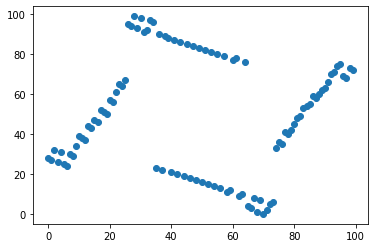

[150000] [435630, 435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617, 435617] [435614]


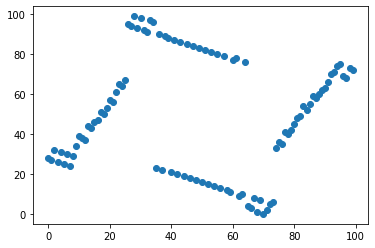

[160000] [435660, 435660, 435630, 435617, 435617, 435617, 435617, 435617, 435617, 435617] [435614]


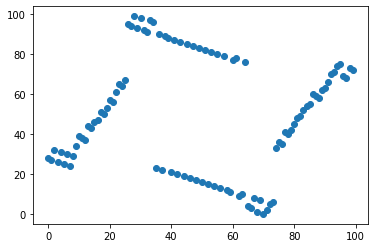

[170000] [435660, 435660, 435660, 435660, 435630, 435617, 435617, 435617, 435617, 435617] [435615]


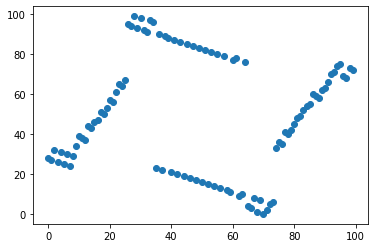

[180000] [435661, 435660, 435660, 435660, 435660, 435660, 435660, 435630, 435630, 435617] [435615]


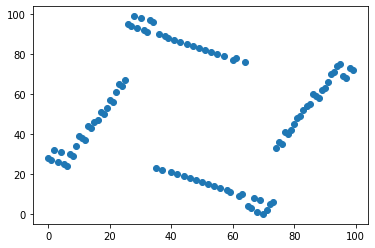

[190000] [435661, 435661, 435660, 435660, 435660, 435660, 435660, 435660, 435660, 435660] [435616]


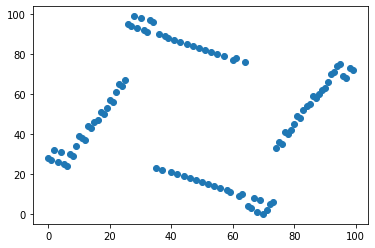

[200000] [435661, 435661, 435660, 435660, 435660, 435660, 435660, 435660, 435660, 435660] [435616]


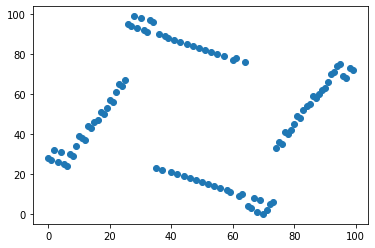

[210000] [435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435616]


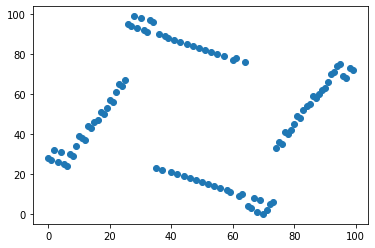

[220000] [435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435616]


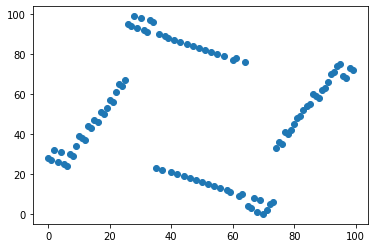

[230000] [435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435616]


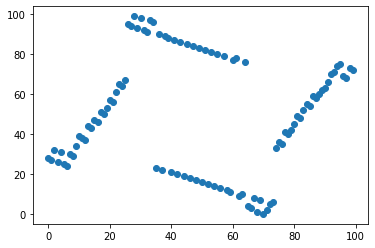

[240000] [435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435616]


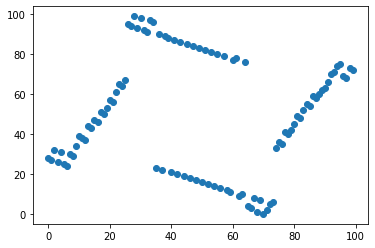

[250000] [435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435617]


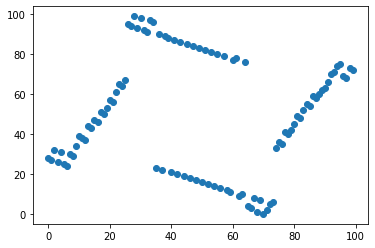

[260000] [435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435617]


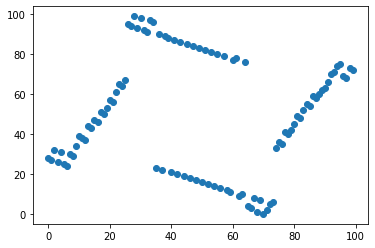

[270000] [435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435617]


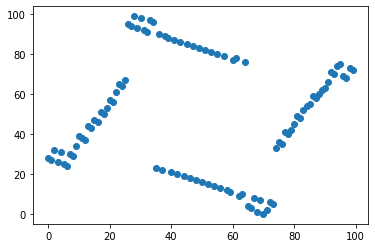

[280000] [435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435617]


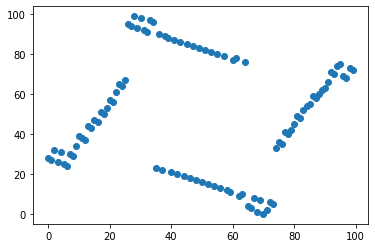

[290000] [435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435617]


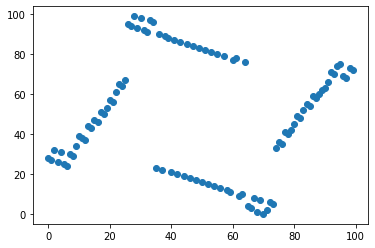

[300000] [435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435617]


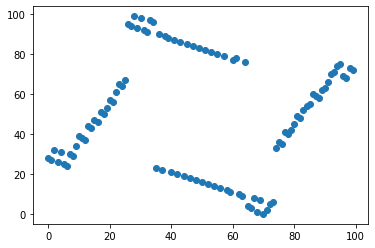

[310000] [435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435617]


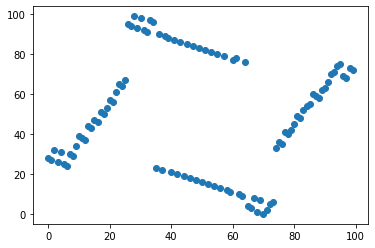

[320000] [435668, 435668, 435668, 435661, 435661, 435661, 435661, 435661, 435661, 435661] [435617]


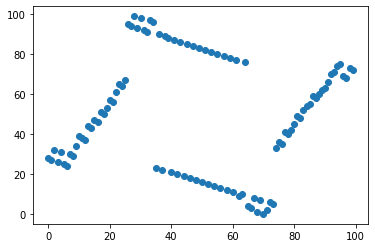

[330000] [435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668] [435660]


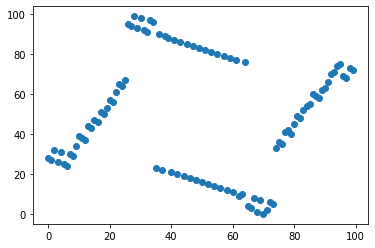

[340000] [435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668] [435661]


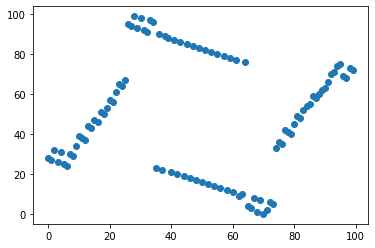

[350000] [435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668] [435661]


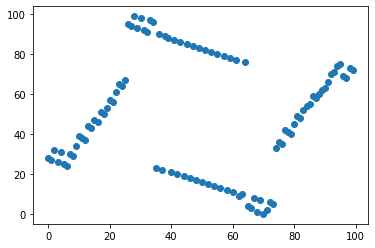

[360000] [435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668] [435661]


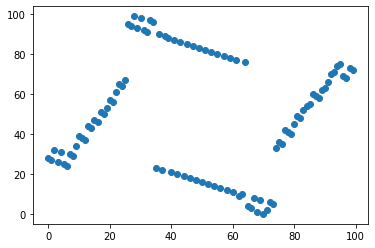

[370000] [435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668] [435661]


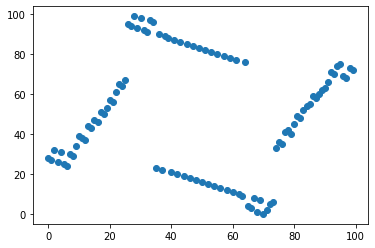

[380000] [435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668] [435661]


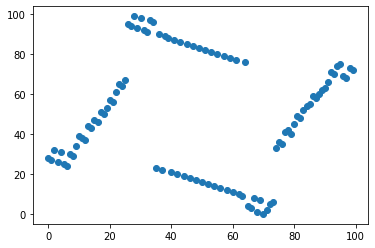

[390000] [435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668] [435661]


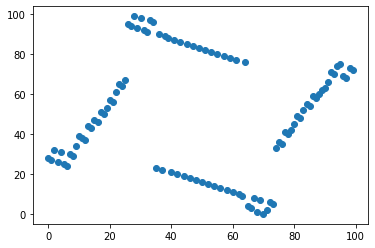

[400000] [435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668, 435668] [435661]


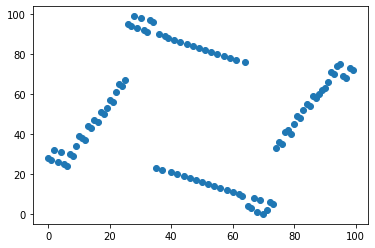

In [23]:
EA4 = Evolutionary_Algorithm_randomcrossover_2413_POP(100,EA3)

[1000] [3882974, 3862482, 3849651, 3795503, 3743189, 3724589, 3705245, 3672818, 3671307, 3667771] [2756154]


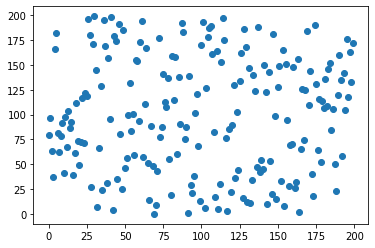

[2000] [4207351, 4144016, 4117994, 4066235, 4044797, 4011730, 3995467, 3992803, 3984607, 3961265] [3107827]


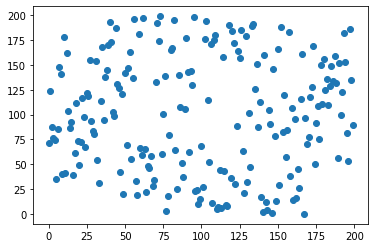

[3000] [4326730, 4256993, 4228245, 4218740, 4217069, 4215621, 4207351, 4205032, 4196295, 4187682] [3405925]


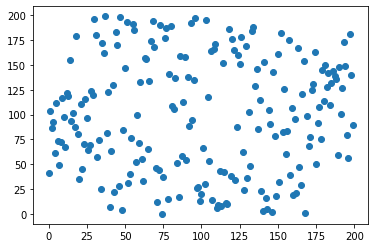

[4000] [4469159, 4395044, 4378303, 4361252, 4360801, 4359761, 4354652, 4351084, 4347420, 4345383] [3682580]


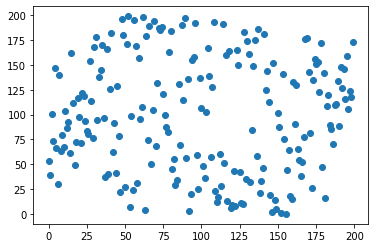

[5000] [4586153, 4585444, 4573406, 4570806, 4570500, 4548152, 4536395, 4533099, 4525083, 4521415] [3883988]


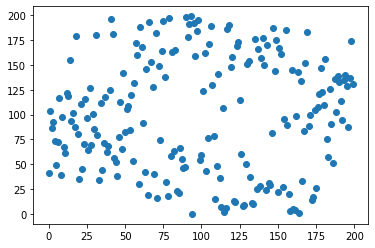

[6000] [4766908, 4691666, 4677334, 4677179, 4676422, 4671166, 4670776, 4670521, 4659986, 4655656] [4039688]


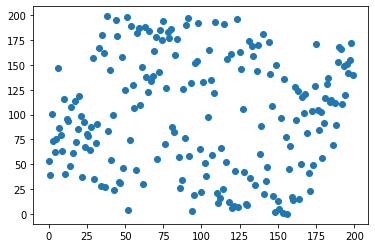

[7000] [4926664, 4880671, 4828514, 4824306, 4819520, 4817062, 4812323, 4806937, 4784763, 4783729] [4189312]


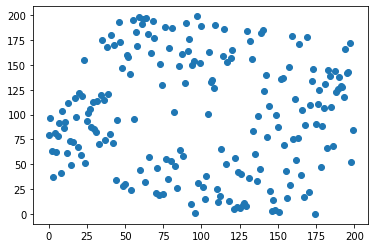

[8000] [5020639, 5007346, 4995466, 4961128, 4953785, 4947731, 4945509, 4943459, 4941513, 4940685] [4333438]


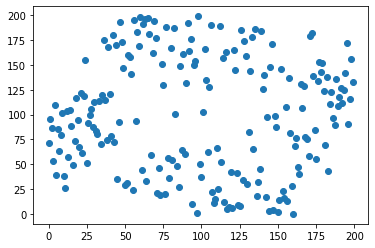

[9000] [5155268, 5113312, 5103600, 5101283, 5078228, 5076447, 5072460, 5062151, 5059460, 5059337] [4480858]


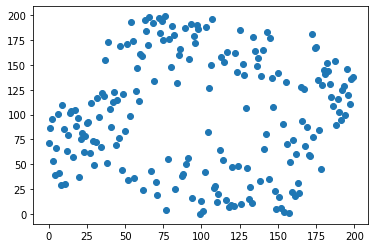

[10000] [5215218, 5196924, 5175348, 5156352, 5156153, 5155268, 5153481, 5153123, 5152934, 5152426] [4607501]


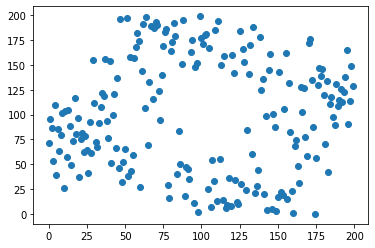

[11000] [5305704, 5247071, 5232420, 5227435, 5215218, 5205899, 5199266, 5196924, 5190080, 5188353] [4723729]


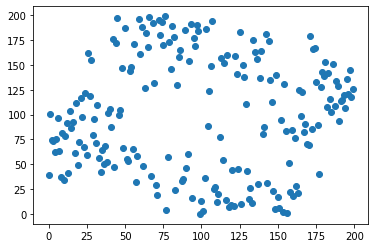

[12000] [5319088, 5307683, 5305704, 5291380, 5273151, 5271948, 5268077, 5265429, 5265198, 5261974] [4837794]


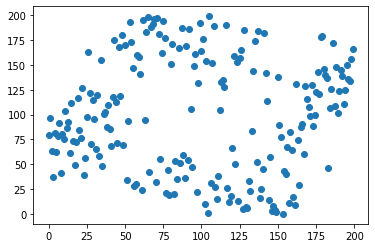

[13000] [5416978, 5400981, 5381074, 5366406, 5363082, 5359587, 5350014, 5342379, 5340492, 5331966] [4925770]


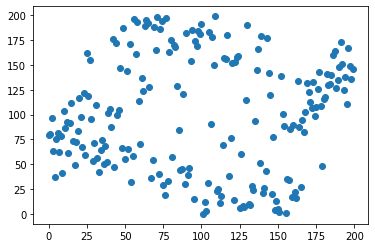

[14000] [5493741, 5493439, 5461186, 5460026, 5459181, 5455791, 5454506, 5448919, 5440636, 5429358] [5016333]


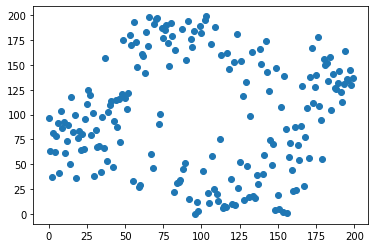

[15000] [5597294, 5582066, 5512847, 5506283, 5497160, 5493741, 5493439, 5491735, 5491087, 5484887] [5084909]


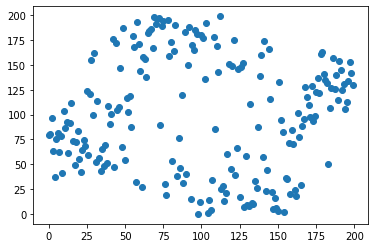

[16000] [5643496, 5620624, 5605225, 5601418, 5597294, 5596103, 5587416, 5582066, 5581898, 5575770] [5152338]


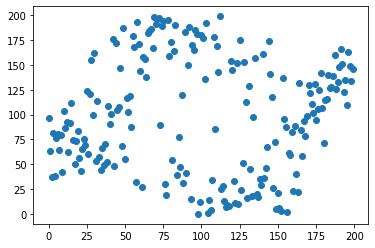

[17000] [5655963, 5648773, 5646429, 5643496, 5640223, 5628771, 5620624, 5605225, 5601418, 5598713] [5221752]


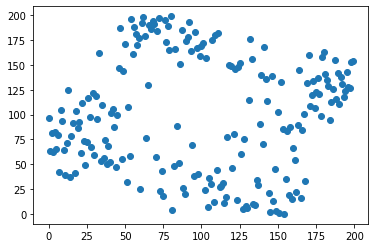

[18000] [5697372, 5696749, 5673120, 5667235, 5663922, 5658110, 5655963, 5653193, 5648773, 5647719] [5291508]


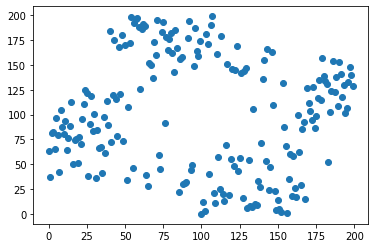

[19000] [5779804, 5775349, 5760293, 5751338, 5735978, 5729264, 5720331, 5701797, 5698269, 5697657] [5356645]


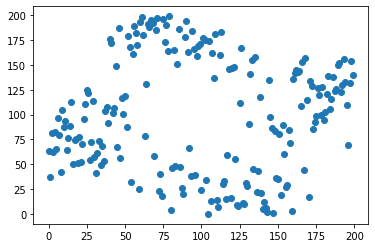

[20000] [5789232, 5779804, 5775349, 5774762, 5773311, 5768664, 5768469, 5763850, 5760293, 5756522] [5425426]


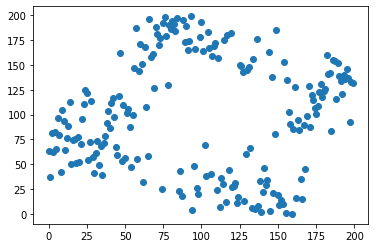

[21000] [5836353, 5833694, 5800161, 5789232, 5784390, 5783644, 5781050, 5780855, 5779804, 5779127] [5483499]


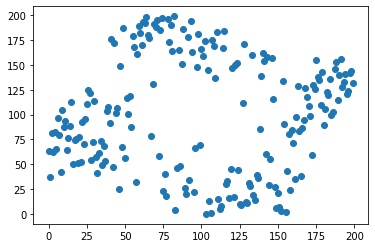

[22000] [5906059, 5890083, 5872616, 5842825, 5840071, 5836353, 5836106, 5833694, 5832790, 5830970] [5541929]


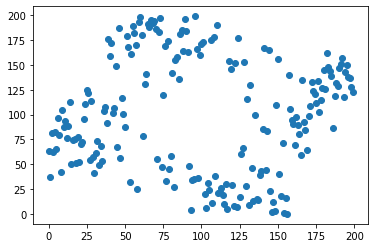

[23000] [5906059, 5890083, 5872616, 5871440, 5860219, 5859677, 5855149, 5851880, 5851443, 5842825] [5583823]


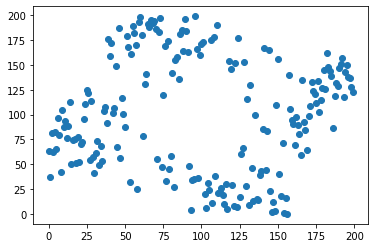

[24000] [5947743, 5926248, 5913937, 5911276, 5906896, 5906059, 5897576, 5893681, 5893028, 5890083] [5631209]


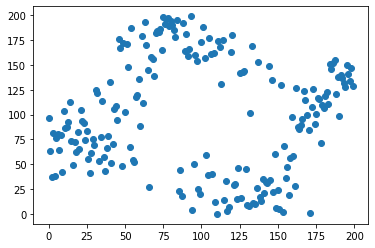

[25000] [5979874, 5947743, 5931374, 5930649, 5926248, 5925285, 5919313, 5917020, 5916902, 5915907] [5672955]


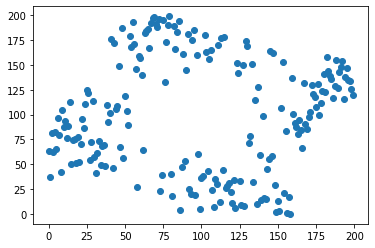

[26000] [5980833, 5979874, 5979743, 5979135, 5975584, 5964831, 5961958, 5961275, 5960086, 5959950] [5716051]


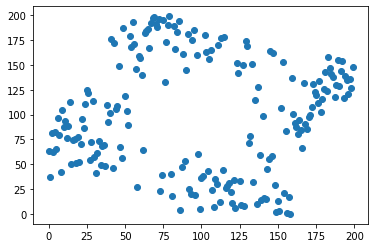

[27000] [6089521, 6083619, 6073772, 6049383, 6039283, 6028024, 6026577, 6020648, 6010935, 6006137] [5755567]


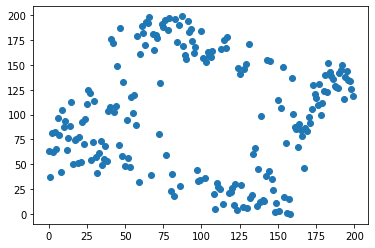

[28000] [6105116, 6089521, 6083619, 6073772, 6060583, 6055304, 6054455, 6049383, 6048893, 6043040] [5789314]


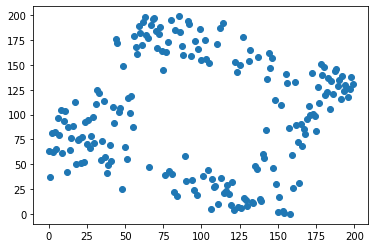

[29000] [6169122, 6159000, 6129072, 6105116, 6089521, 6085714, 6083619, 6079380, 6076515, 6075578] [5826919]


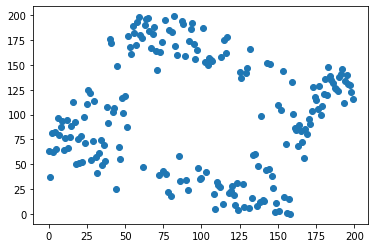

[30000] [6170665, 6169122, 6159000, 6144434, 6129072, 6126231, 6113788, 6113579, 6108510, 6105834] [5859009]


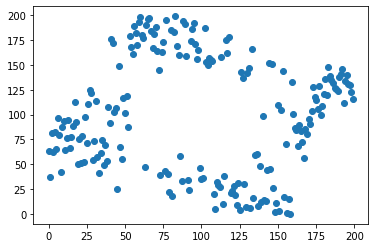

[31000] [6207255, 6196035, 6172023, 6170665, 6169122, 6159000, 6158850, 6151061, 6146494, 6145259] [5890600]


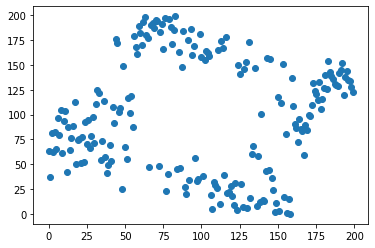

[32000] [6207255, 6196035, 6188191, 6172023, 6170665, 6170665, 6169122, 6164574, 6163237, 6159000] [5926248]


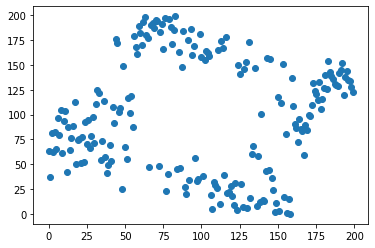

[33000] [6211104, 6207255, 6205387, 6204930, 6200226, 6197703, 6196035, 6193762, 6192256, 6188191] [5963580]


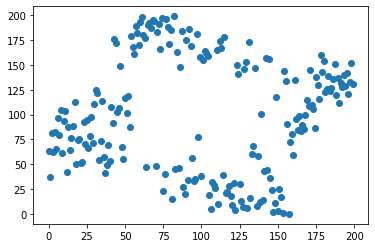

[34000] [6272900, 6268305, 6244839, 6239425, 6238876, 6233569, 6230613, 6227889, 6218866, 6218333] [5999863]


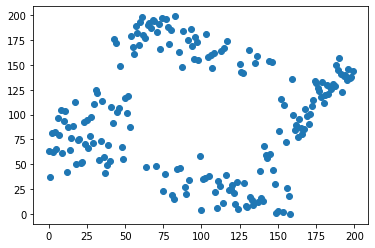

[35000] [6285626, 6283617, 6283230, 6279230, 6274432, 6272900, 6271926, 6268305, 6265591, 6244839] [6030235]


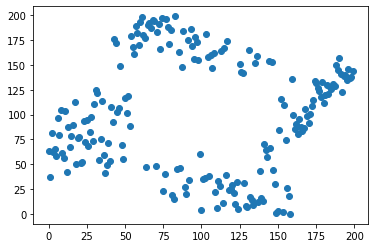

[36000] [6302248, 6293286, 6291969, 6285626, 6285084, 6283617, 6283230, 6279230, 6276832, 6274432] [6065177]


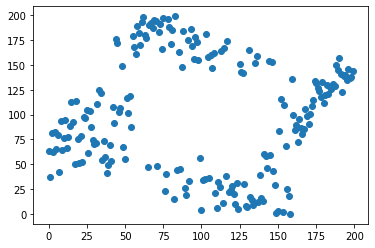

[37000] [6333962, 6311677, 6304767, 6304085, 6303467, 6302248, 6301449, 6297991, 6294318, 6294187] [6094849]


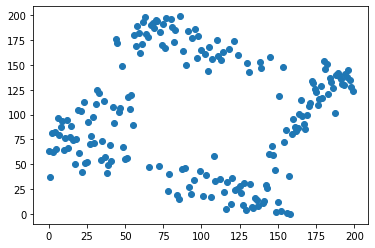

[38000] [6390446, 6355056, 6333962, 6326424, 6326217, 6319086, 6311677, 6311677, 6307828, 6307264] [6120434]


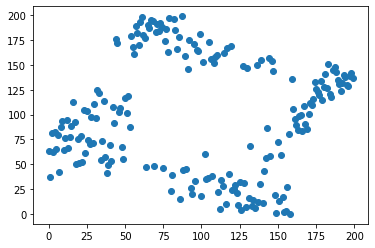

[39000] [6390446, 6376844, 6365865, 6362090, 6355056, 6341060, 6337268, 6336819, 6333962, 6328759] [6147768]


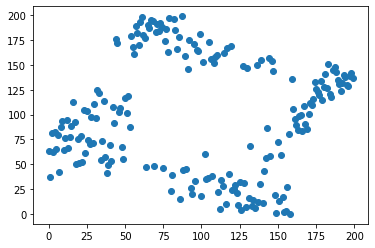

[40000] [6390446, 6379190, 6377785, 6376844, 6370818, 6368958, 6366323, 6365865, 6364741, 6363873] [6171926]


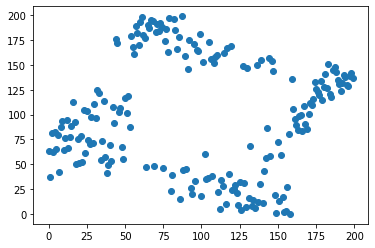

In [9]:
 EA200 = Evolutionary_Algorithm_randomcrossover_2413(200)

[1000] [6390446, 6383332, 6379195, 6379190, 6378618, 6377785, 6377143, 6376844, 6370940, 6370930] [6197483]


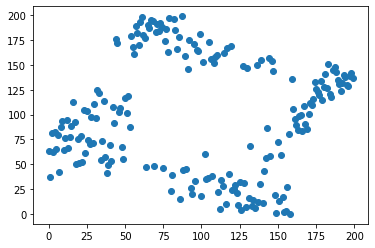

[2000] [6413321, 6402369, 6391180, 6390742, 6390446, 6387330, 6387208, 6385644, 6383642, 6383332] [6223339]


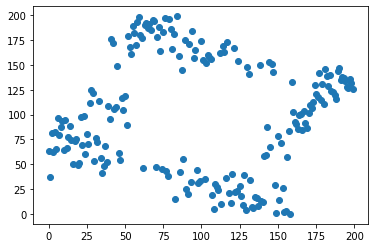

[3000] [6414680, 6413321, 6412686, 6409821, 6409682, 6403662, 6402369, 6402369, 6401246, 6399998] [6246706]


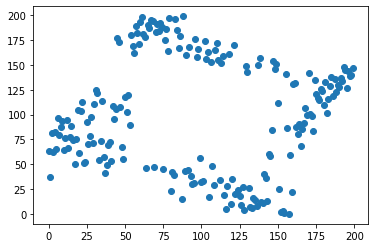

[4000] [6438656, 6436883, 6434821, 6417936, 6414680, 6413321, 6412686, 6412299, 6409821, 6409682] [6269225]


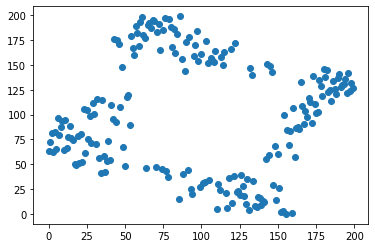

[5000] [6438656, 6436883, 6436022, 6435717, 6434821, 6422876, 6422654, 6420005, 6417936, 6417525] [6284331]


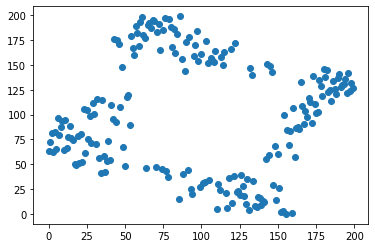

[6000] [6446343, 6439145, 6439145, 6438656, 6436883, 6436022, 6435717, 6434821, 6427476, 6426594] [6298651]


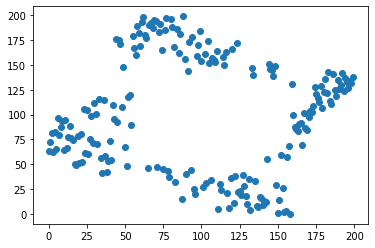

[7000] [6454653, 6452802, 6450624, 6446343, 6444716, 6439145, 6439145, 6438656, 6436883, 6436717] [6312671]


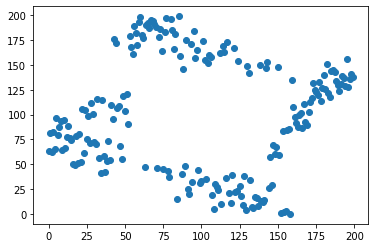

[8000] [6458944, 6456072, 6455777, 6454653, 6454204, 6452802, 6450624, 6448337, 6448337, 6446534] [6326424]


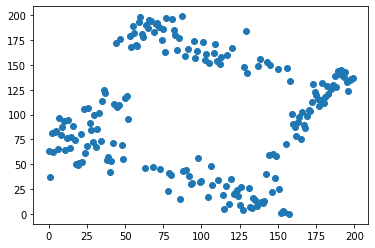

[9000] [6497331, 6494961, 6476262, 6468336, 6459689, 6458944, 6458570, 6457664, 6456447, 6456074] [6339887]


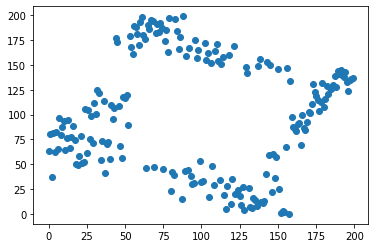

[10000] [6497331, 6497331, 6494961, 6476262, 6469724, 6468336, 6467017, 6466499, 6466038, 6465986] [6354415]


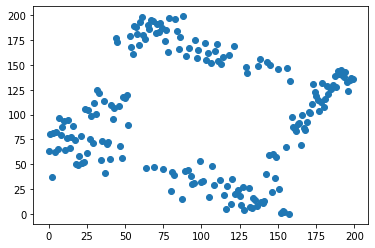

[11000] [6526958, 6497331, 6497331, 6494961, 6494285, 6492730, 6483246, 6479971, 6476865, 6476262] [6366030]


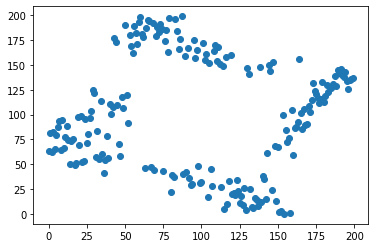

[12000] [6526958, 6511427, 6508769, 6508070, 6505154, 6505060, 6503991, 6498317, 6497331, 6497331] [6378064]


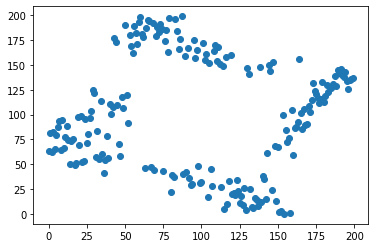

[13000] [6526958, 6520707, 6511427, 6509714, 6508769, 6508070, 6507249, 6506399, 6505154, 6505060] [6389079]


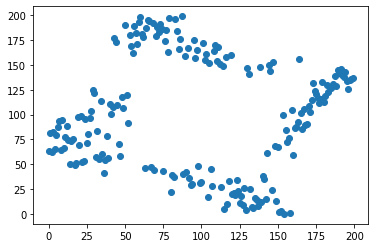

[14000] [6537975, 6537941, 6526958, 6523869, 6520707, 6516644, 6513690, 6512849, 6512533, 6511427] [6400381]


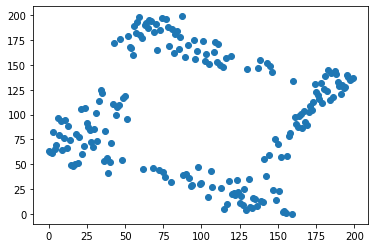

[15000] [6544732, 6537975, 6537941, 6526958, 6526485, 6523869, 6520707, 6520325, 6517553, 6517423] [6411661]


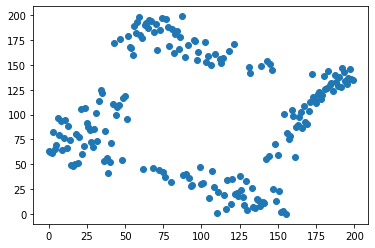

[16000] [6544732, 6537975, 6537941, 6536323, 6526958, 6526485, 6526485, 6526224, 6524425, 6523869] [6421971]


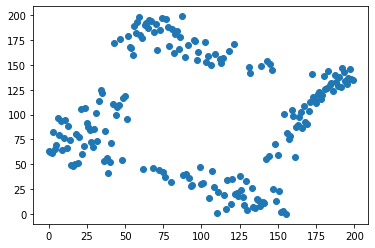

[17000] [6547688, 6546821, 6545761, 6544732, 6544703, 6539019, 6537975, 6537941, 6536869, 6536323] [6434363]


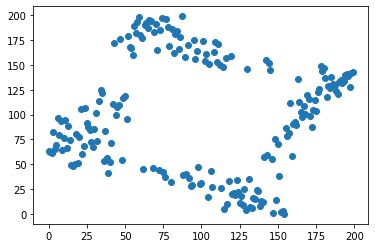

[18000] [6560676, 6547688, 6546821, 6545761, 6544732, 6544703, 6544295, 6543042, 6542815, 6539733] [6442494]


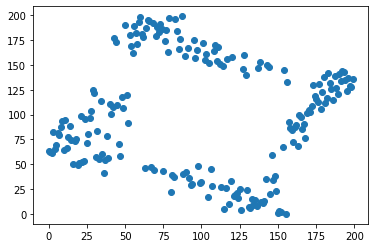

[19000] [6560676, 6551717, 6547688, 6547323, 6546821, 6546300, 6545761, 6545696, 6544732, 6544703] [6452091]


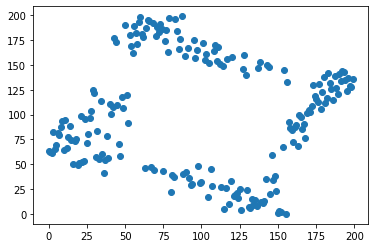

[20000] [6569915, 6560676, 6556031, 6555954, 6552102, 6552102, 6551717, 6551370, 6550778, 6549384] [6459883]


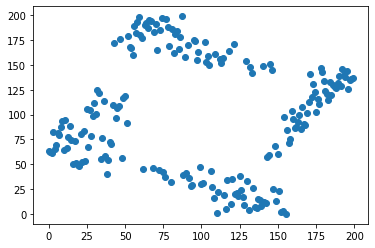

[21000] [6569915, 6568841, 6568607, 6566019, 6560676, 6559822, 6558831, 6556031, 6555954, 6554161] [6470014]


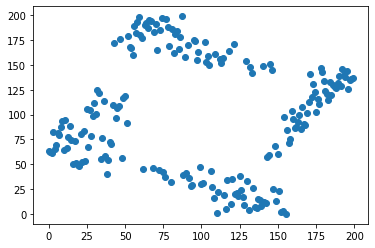

[22000] [6572801, 6569915, 6568841, 6568607, 6566019, 6563314, 6560676, 6560588, 6559861, 6559822] [6478605]


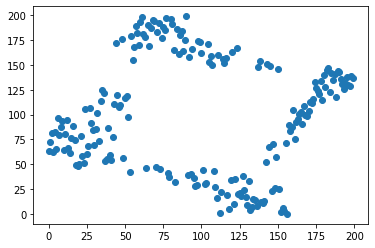

[23000] [6572801, 6569915, 6568841, 6568607, 6567789, 6567123, 6566019, 6565615, 6565572, 6564134] [6488195]


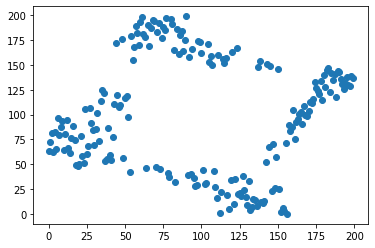

[24000] [6579716, 6572801, 6571649, 6570014, 6569955, 6569915, 6568841, 6568608, 6568607, 6567789] [6494396]


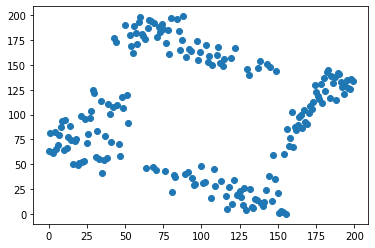

[25000] [6582671, 6580490, 6580270, 6580078, 6579716, 6579182, 6574736, 6574527, 6572801, 6572491] [6502750]


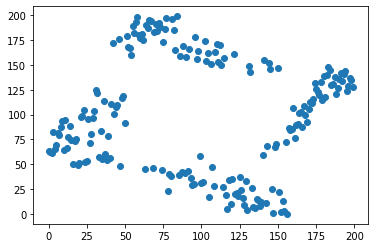

[26000] [6587419, 6585177, 6584696, 6582671, 6582527, 6581593, 6581044, 6580490, 6580270, 6580078] [6510617]


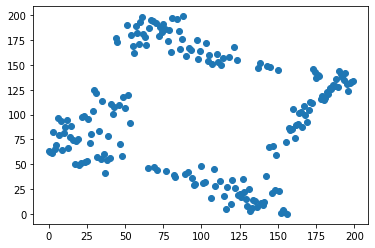

[27000] [6587419, 6585177, 6584696, 6584080, 6583609, 6583315, 6582671, 6582527, 6581593, 6581044] [6517068]


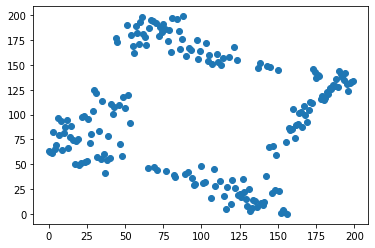

[28000] [6589497, 6588547, 6588477, 6587911, 6587668, 6587419, 6585177, 6584696, 6584080, 6584080] [6522561]


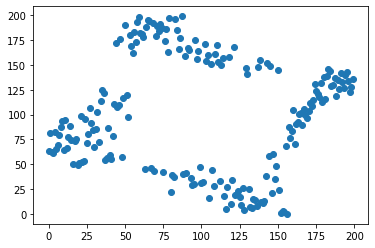

[29000] [6603578, 6600316, 6599629, 6592017, 6591692, 6590447, 6589497, 6589129, 6588547, 6588477] [6527588]


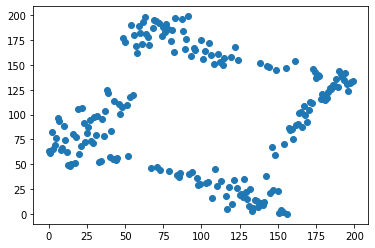

[30000] [6606071, 6605860, 6603830, 6603578, 6600316, 6600037, 6599629, 6599629, 6599526, 6598428] [6531977]


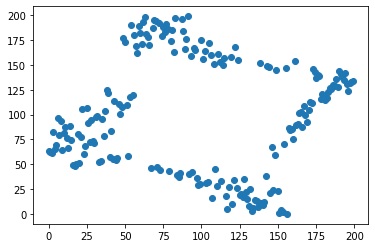

[31000] [6606071, 6605860, 6604276, 6604230, 6604181, 6603830, 6603578, 6601960, 6601294, 6600630] [6536981]


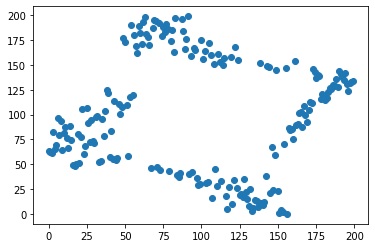

[32000] [6621146, 6620634, 6609859, 6608295, 6608171, 6607527, 6606573, 6606071, 6605860, 6604477] [6542229]


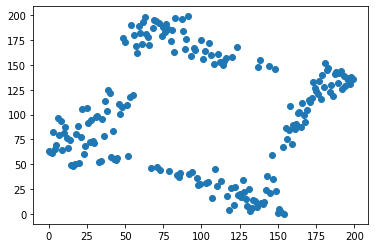

[33000] [6621357, 6621146, 6620634, 6620634, 6617065, 6615274, 6613853, 6609859, 6608295, 6608184] [6546943]


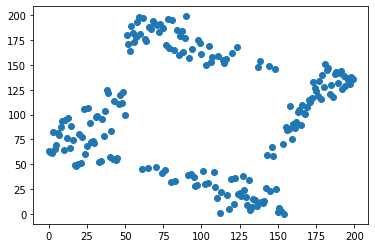

[34000] [6622790, 6621357, 6621146, 6621146, 6620634, 6620634, 6620072, 6618294, 6618051, 6617065] [6552358]


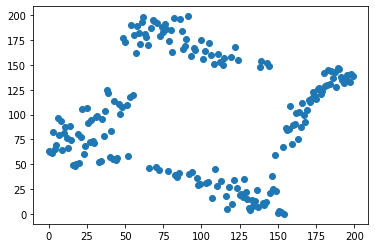

[35000] [6636495, 6631480, 6627513, 6623539, 6622790, 6622120, 6621357, 6621146, 6621146, 6620634] [6557450]


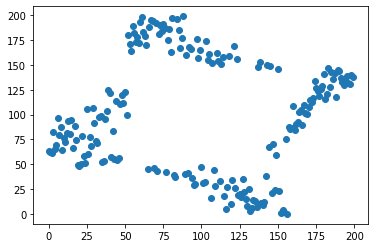

[36000] [6638065, 6637759, 6636495, 6635371, 6634798, 6631480, 6627905, 6627513, 6626676, 6625125] [6561801]


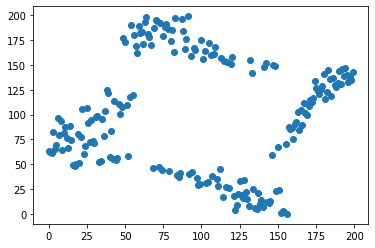

[37000] [6646827, 6642240, 6638967, 6638692, 6638183, 6638065, 6637759, 6637411, 6636571, 6636495] [6566048]


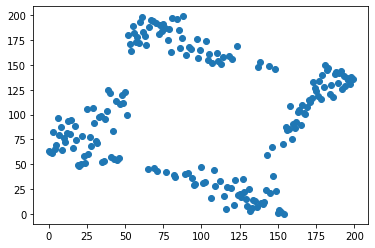

[38000] [6653003, 6650361, 6647169, 6646827, 6645277, 6642808, 6642240, 6640770, 6639328, 6638991] [6571188]


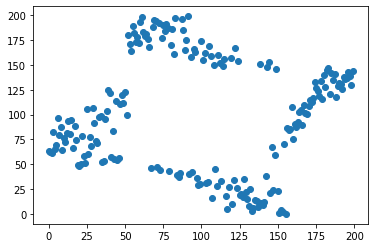

[39000] [6657780, 6653003, 6651769, 6650361, 6648144, 6647240, 6647169, 6646989, 6646827, 6646213] [6576367]


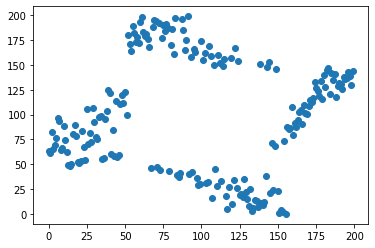

[40000] [6658760, 6658327, 6657780, 6657498, 6656520, 6654763, 6653003, 6652247, 6651769, 6651742] [6581593]


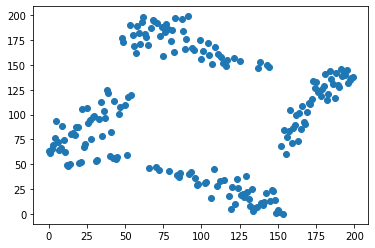

In [11]:
 EA201 = Evolutionary_Algorithm_randomcrossover_2413_POP(200,EA200)

[1000] [6687222, 6669357, 6669337, 6662969, 6660539, 6660290, 6658760, 6658540, 6658327, 6657780] [6587104]


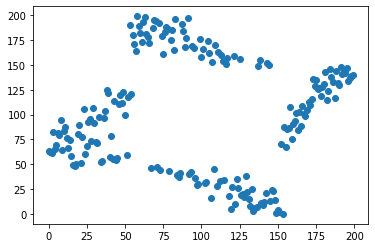

[2000] [6687222, 6686005, 6677909, 6674892, 6674582, 6670725, 6669357, 6669337, 6669235, 6666796] [6592866]


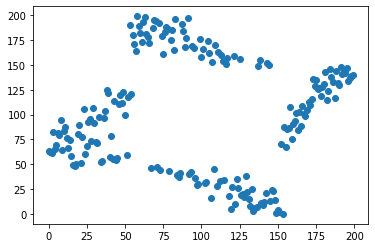

[3000] [6687222, 6686497, 6686005, 6683651, 6677909, 6677833, 6674935, 6674892, 6674582, 6671000] [6598351]


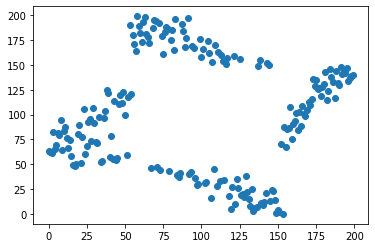

[4000] [6688371, 6688048, 6687222, 6686497, 6686005, 6683807, 6683807, 6683651, 6681396, 6680294] [6604664]


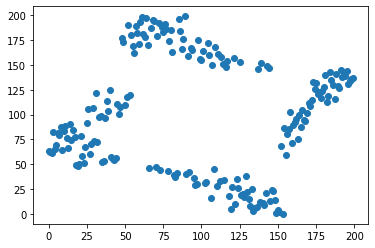

[5000] [6704287, 6698613, 6696912, 6695810, 6692319, 6689848, 6689295, 6688371, 6688048, 6687222] [6609559]


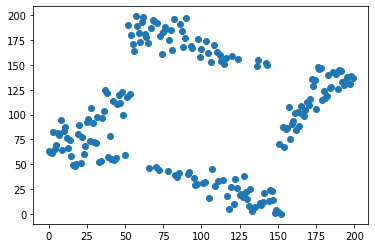

[6000] [6704287, 6698613, 6696912, 6695810, 6694096, 6692486, 6692444, 6692319, 6692051, 6689848] [6615274]


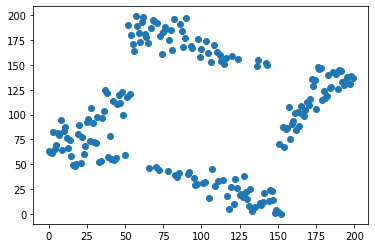

[7000] [6704287, 6702146, 6699088, 6699085, 6698613, 6698317, 6696912, 6695830, 6695810, 6694478] [6620971]


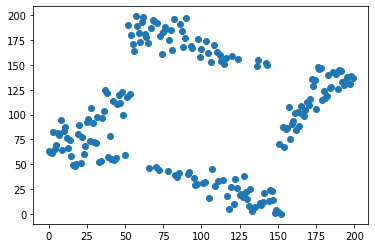

[8000] [6707923, 6704287, 6702146, 6699088, 6699085, 6698613, 6698328, 6698317, 6697029, 6696912] [6626197]


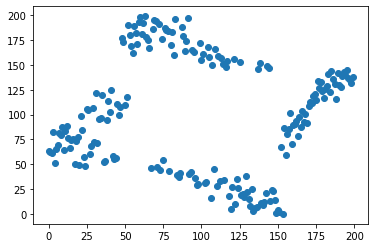

[9000] [6715467, 6711273, 6709260, 6708527, 6707923, 6707660, 6706507, 6706127, 6704315, 6704287] [6632905]


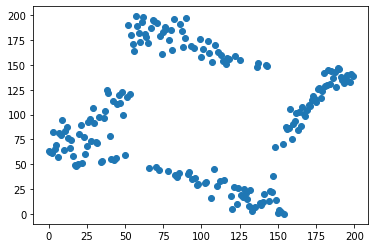

[10000] [6715467, 6715431, 6713798, 6711531, 6711273, 6709260, 6708527, 6708386, 6707923, 6707660] [6638776]


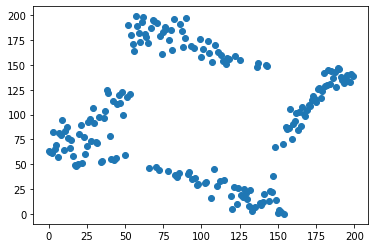

[11000] [6717567, 6716499, 6715467, 6715464, 6715431, 6713798, 6712790, 6711531, 6711531, 6711273] [6645455]


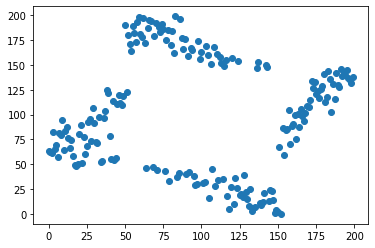

[12000] [6729437, 6721860, 6717609, 6717567, 6716548, 6716499, 6715467, 6715467, 6715464, 6715431] [6650381]


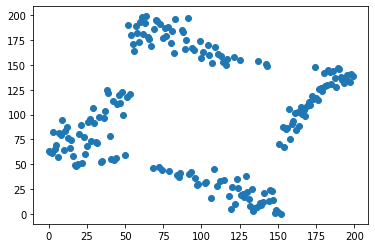

[13000] [6729437, 6727628, 6725958, 6723421, 6721860, 6719801, 6717635, 6717609, 6717567, 6717167] [6655958]


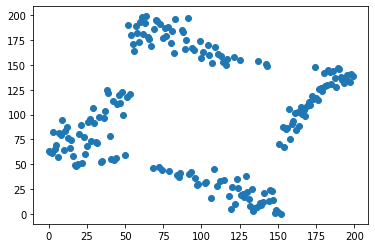

[14000] [6731220, 6729437, 6728548, 6727628, 6725958, 6725538, 6723786, 6723421, 6723206, 6721881] [6661583]


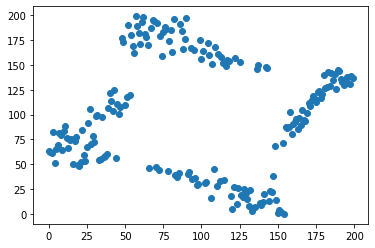

[15000] [6735315, 6734051, 6731220, 6730499, 6730328, 6729437, 6729437, 6729400, 6728548, 6728548] [6668649]


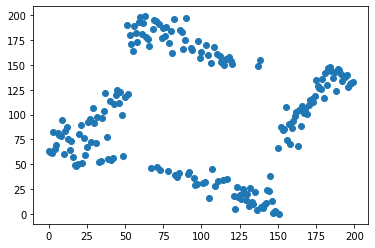

[16000] [6738184, 6738184, 6737523, 6737382, 6735315, 6734051, 6733193, 6733004, 6731220, 6730761] [6674513]


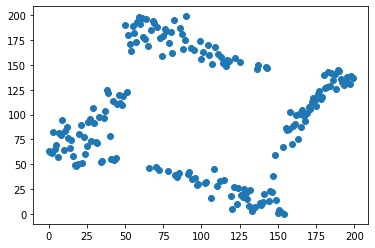

[17000] [6740903, 6740146, 6738184, 6738184, 6738184, 6737966, 6737579, 6737523, 6737382, 6735437] [6679200]


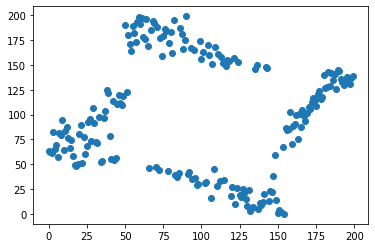

[18000] [6748648, 6741147, 6740903, 6740608, 6740146, 6738184, 6738184, 6738184, 6737966, 6737579] [6683647]


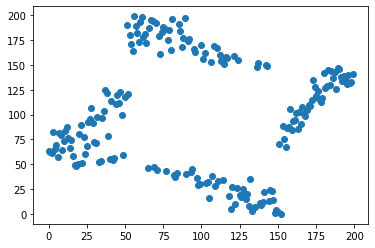

[19000] [6753796, 6748648, 6748648, 6745558, 6745251, 6744778, 6744712, 6742675, 6741147, 6740903] [6687573]


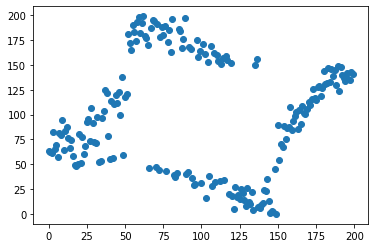

[20000] [6762889, 6753796, 6750951, 6748648, 6748648, 6748648, 6748648, 6748648, 6747912, 6745839] [6691918]


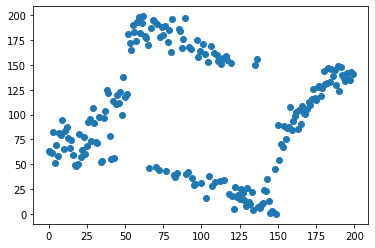

[21000] [6767024, 6762889, 6761277, 6753796, 6753633, 6752218, 6750951, 6750357, 6750346, 6750281] [6695830]


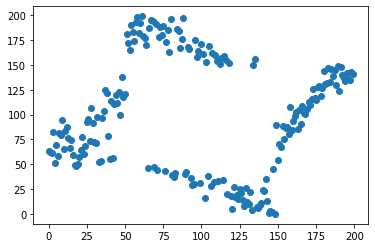

[22000] [6767024, 6762889, 6761277, 6753796, 6753633, 6752218, 6750951, 6750357, 6750346, 6750281] [6700446]


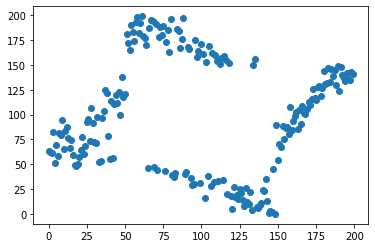

[23000] [6767024, 6763119, 6762889, 6761277, 6761216, 6757890, 6757651, 6756866, 6756476, 6753796] [6704198]


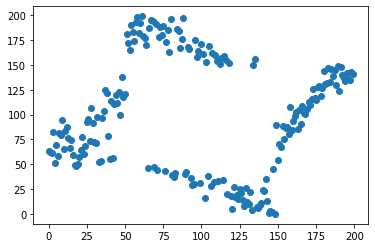

[24000] [6767024, 6765865, 6763119, 6762889, 6761941, 6761277, 6761216, 6760495, 6759937, 6759867] [6709739]


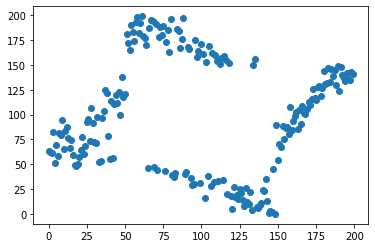

[25000] [6767024, 6765865, 6763119, 6762889, 6762403, 6761941, 6761595, 6761277, 6761216, 6761184] [6714366]


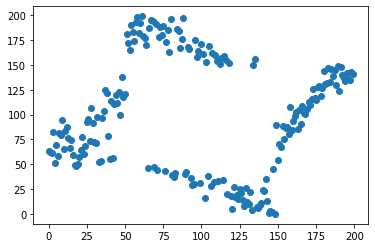

[26000] [6768216, 6767024, 6767024, 6765865, 6763119, 6762909, 6762889, 6762413, 6762403, 6761941] [6717796]


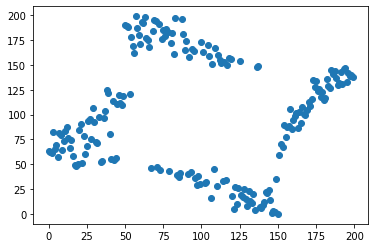

[27000] [6769709, 6769296, 6768825, 6768216, 6768028, 6767398, 6767365, 6767024, 6767024, 6766945] [6721692]


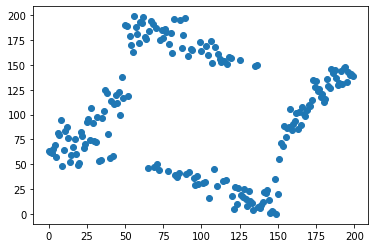

[28000] [6779693, 6777078, 6776011, 6773068, 6771489, 6771153, 6769855, 6769709, 6769700, 6769584] [6724907]


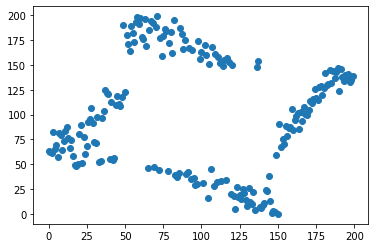

[29000] [6779693, 6778169, 6777078, 6776011, 6774154, 6773114, 6773068, 6771489, 6771153, 6770658] [6727883]


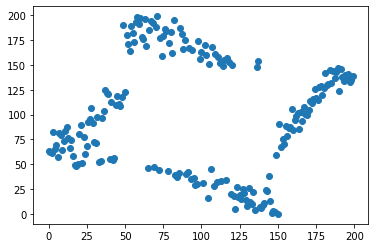

[30000] [6781526, 6780245, 6779693, 6779693, 6779600, 6778169, 6777078, 6776252, 6776237, 6776011] [6730944]


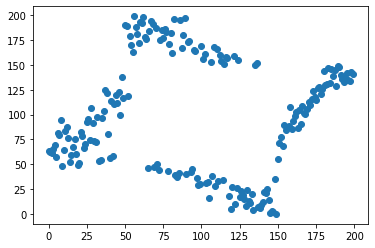

[31000] [6783528, 6783522, 6781651, 6781526, 6780245, 6779693, 6779693, 6779690, 6779600, 6779470] [6735038]


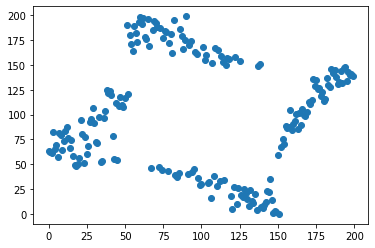

[32000] [6783528, 6783522, 6781651, 6781581, 6781526, 6780752, 6780245, 6779693, 6779693, 6779690] [6738233]


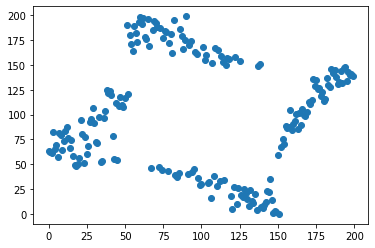

[33000] [6784736, 6784365, 6783528, 6783522, 6781651, 6781581, 6781526, 6781211, 6780752, 6780245] [6741635]


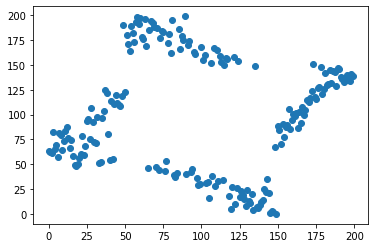

[34000] [6785432, 6785238, 6784750, 6784736, 6784365, 6784168, 6783528, 6783528, 6783522, 6783080] [6744335]


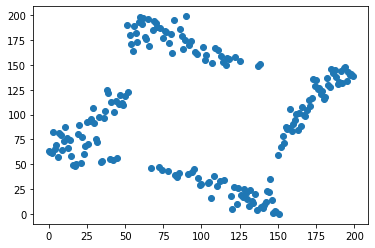

[35000] [6789711, 6789678, 6785432, 6785238, 6784865, 6784750, 6784736, 6784365, 6784168, 6784168] [6747397]


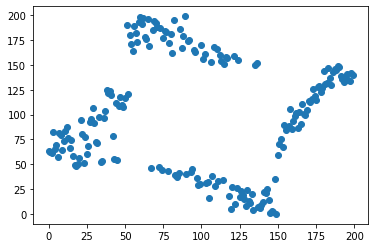

[36000] [6791123, 6789711, 6789711, 6789679, 6789678, 6787203, 6787057, 6786263, 6785904, 6785432] [6749183]


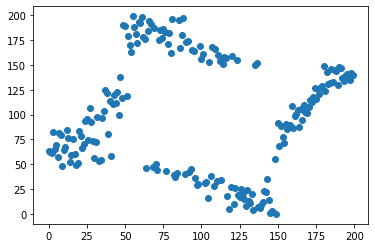

[37000] [6793841, 6791889, 6791123, 6789711, 6789711, 6789679, 6789678, 6789173, 6788348, 6787878] [6751225]


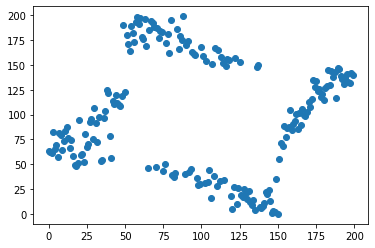

[38000] [6794059, 6794059, 6794040, 6793841, 6793671, 6793616, 6793273, 6792262, 6791889, 6791188] [6754513]


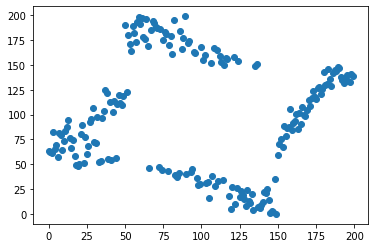

[39000] [6797677, 6794881, 6794059, 6794059, 6794040, 6793841, 6793671, 6793616, 6793273, 6792597] [6757058]


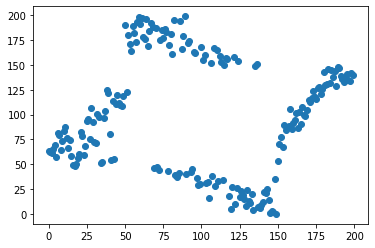

[40000] [6797677, 6796151, 6795936, 6794881, 6794736, 6794361, 6794059, 6794059, 6794040, 6793841] [6760542]


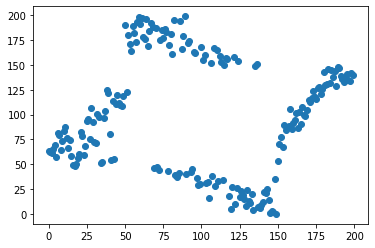

In [12]:
 EA202 = Evolutionary_Algorithm_randomcrossover_2413_POP(200,EA201)

[1000] [6797677, 6796980, 6796268, 6796151, 6795936, 6795323, 6795058, 6794881, 6794858, 6794736] [6762921]


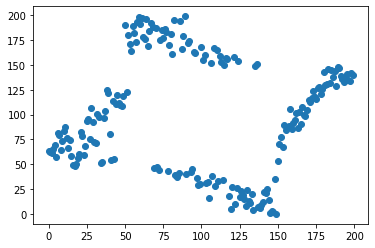

[2000] [6799365, 6798275, 6798047, 6797677, 6796980, 6796792, 6796456, 6796287, 6796268, 6796151] [6765959]


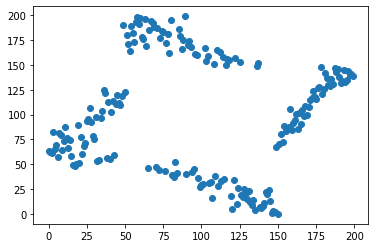

[3000] [6801762, 6799365, 6798643, 6798403, 6798275, 6798047, 6798040, 6797808, 6797753, 6797677] [6767798]


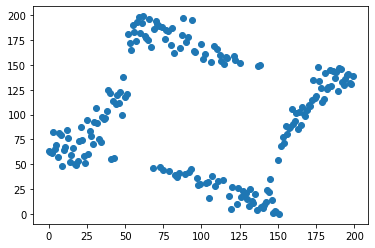

[4000] [6804744, 6804744, 6801762, 6799365, 6799331, 6798689, 6798643, 6798643, 6798632, 6798476] [6770218]


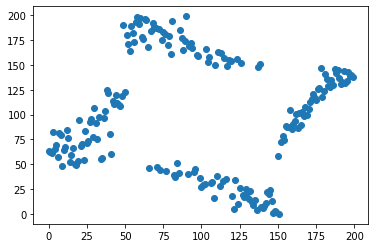

[5000] [6806654, 6804744, 6804744, 6803830, 6803826, 6803745, 6803465, 6802724, 6802682, 6801762] [6772282]


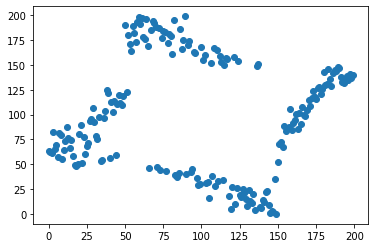

[6000] [6806654, 6804744, 6804744, 6804600, 6804200, 6803830, 6803826, 6803745, 6803745, 6803680] [6774399]


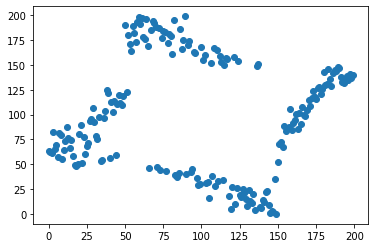

[7000] [6806814, 6806703, 6806654, 6806637, 6804744, 6804744, 6804600, 6804200, 6803830, 6803826] [6776537]


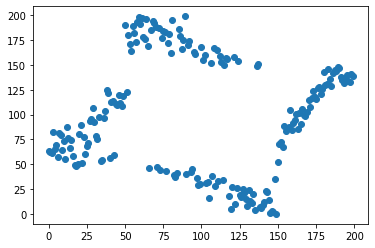

[8000] [6807411, 6806814, 6806798, 6806703, 6806654, 6806637, 6804744, 6804744, 6804600, 6804242] [6778422]


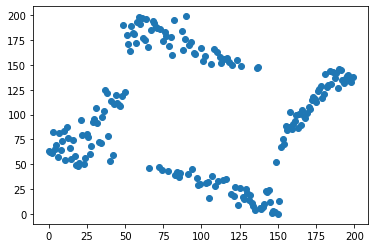

[9000] [6811320, 6807411, 6807064, 6806814, 6806798, 6806703, 6806654, 6806637, 6805718, 6805718] [6780028]


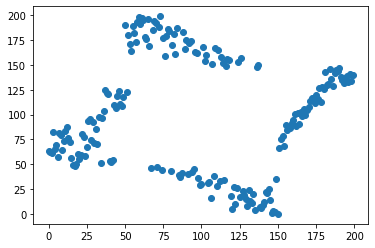

[10000] [6811320, 6810346, 6808222, 6807550, 6807459, 6807411, 6807064, 6806814, 6806798, 6806703] [6782352]


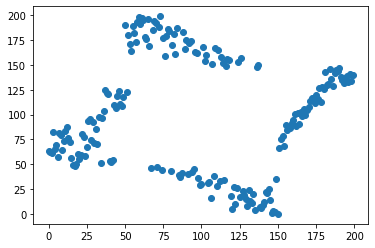

[11000] [6815632, 6815146, 6814290, 6811320, 6810750, 6810499, 6810346, 6809077, 6808885, 6808252] [6784014]


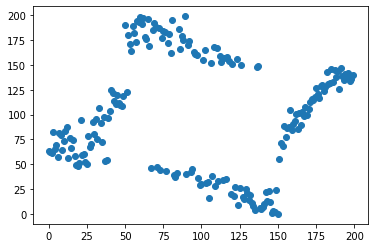

[12000] [6815921, 6815632, 6815146, 6814290, 6811382, 6811320, 6811228, 6810888, 6810750, 6810499] [6785397]


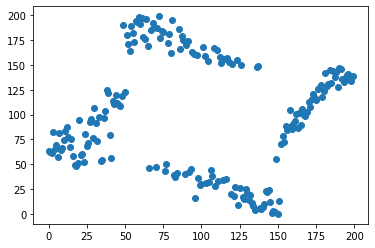

[13000] [6816361, 6816181, 6815921, 6815632, 6815150, 6815146, 6814336, 6814290, 6814234, 6813670] [6787057]


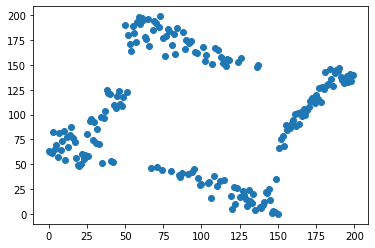

[14000] [6820561, 6816361, 6816181, 6815921, 6815632, 6815150, 6815146, 6814336, 6814290, 6814234] [6788766]


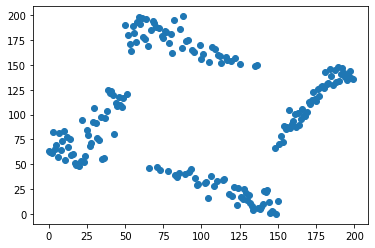

[15000] [6820561, 6820431, 6816537, 6816361, 6816202, 6816181, 6815921, 6815632, 6815150, 6815146] [6790552]


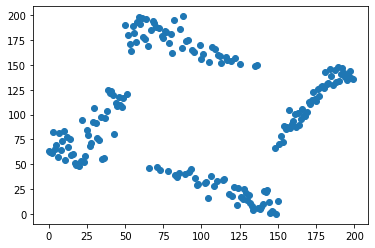

[16000] [6821499, 6820561, 6820431, 6818790, 6818790, 6816644, 6816537, 6816361, 6816243, 6816202] [6791742]


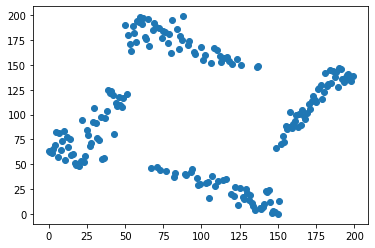

[17000] [6823208, 6822327, 6822098, 6821499, 6821499, 6820561, 6820499, 6820431, 6820419, 6820082] [6793071]


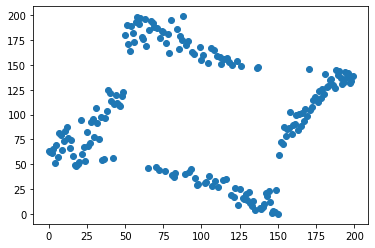

[18000] [6826069, 6825713, 6823208, 6822415, 6822327, 6822098, 6821499, 6821499, 6821237, 6821228] [6794045]


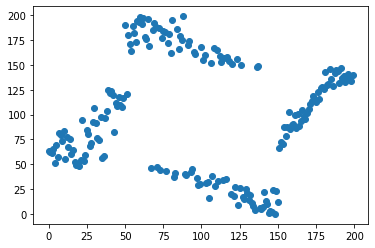

[19000] [6826069, 6825713, 6823208, 6822415, 6822327, 6822217, 6822143, 6822098, 6821905, 6821513] [6795413]


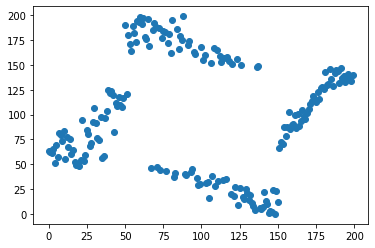

[20000] [6826069, 6825713, 6825713, 6824359, 6824152, 6823997, 6823208, 6823139, 6822415, 6822327] [6796730]


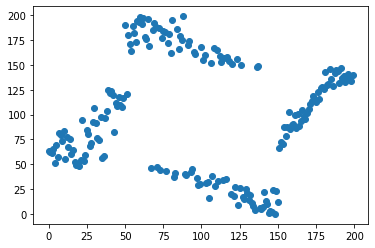

[21000] [6828133, 6827850, 6826793, 6826323, 6826069, 6825749, 6825713, 6825713, 6825713, 6825713] [6797974]


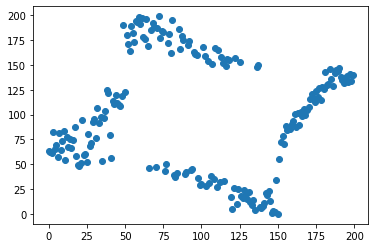

[22000] [6830790, 6828187, 6828133, 6827850, 6827430, 6826810, 6826793, 6826456, 6826323, 6826323] [6799322]


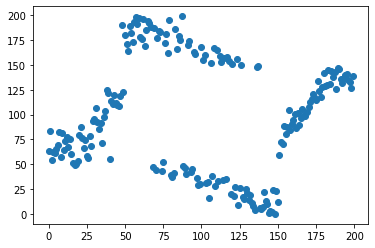

[23000] [6830815, 6830790, 6830246, 6828599, 6828334, 6828187, 6828177, 6828144, 6828133, 6827850] [6801316]


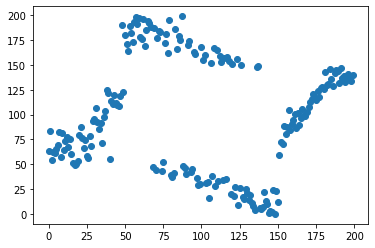

[24000] [6830815, 6830790, 6830246, 6829520, 6829157, 6829046, 6828858, 6828599, 6828334, 6828334] [6802864]


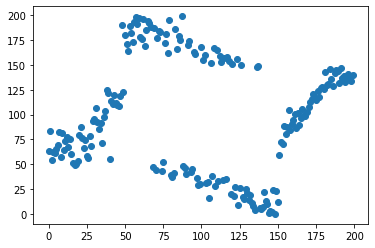

[25000] [6834526, 6833704, 6833572, 6832738, 6831911, 6830989, 6830815, 6830792, 6830790, 6830466] [6804484]


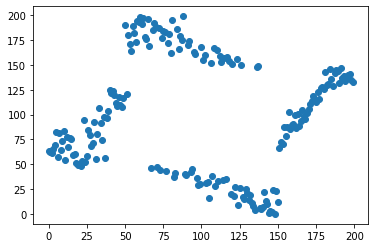

[26000] [6839189, 6835700, 6834526, 6834275, 6833871, 6833704, 6833572, 6832738, 6832210, 6832072] [6806598]


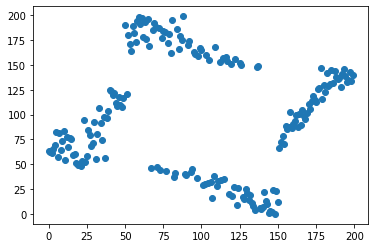

[27000] [6839189, 6835700, 6834526, 6834526, 6834275, 6833929, 6833871, 6833871, 6833871, 6833721] [6808783]


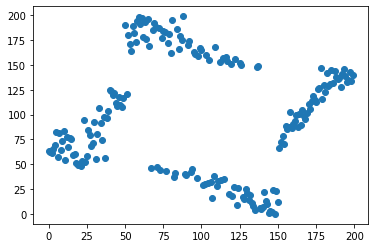

[28000] [6839228, 6839189, 6837117, 6835700, 6835369, 6835317, 6835273, 6835164, 6835107, 6834713] [6811113]


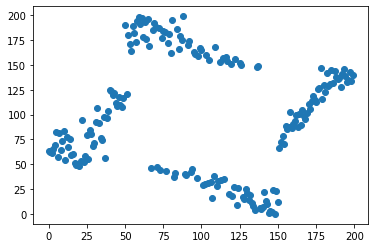

[29000] [6839228, 6839189, 6837117, 6837117, 6837095, 6837044, 6835700, 6835615, 6835448, 6835369] [6812870]


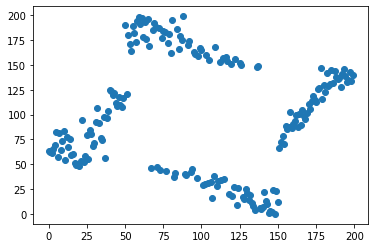

[30000] [6839246, 6839228, 6839189, 6838476, 6837687, 6837124, 6837117, 6837117, 6837095, 6837044] [6814662]


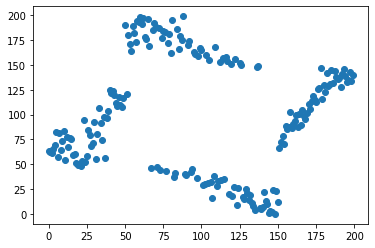

[31000] [6841359, 6841359, 6840599, 6839976, 6839709, 6839676, 6839548, 6839246, 6839228, 6839227] [6816517]


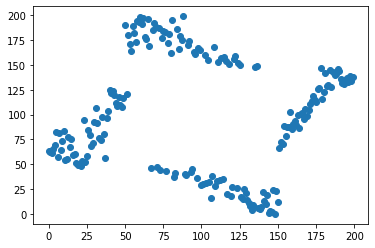

[32000] [6844042, 6844034, 6844032, 6841359, 6841359, 6841333, 6841202, 6840859, 6840632, 6840599] [6818993]


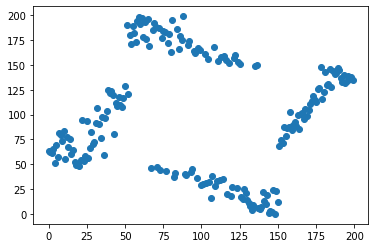

[33000] [6847332, 6847185, 6844517, 6844042, 6844034, 6844032, 6842620, 6842343, 6842093, 6841779] [6821124]


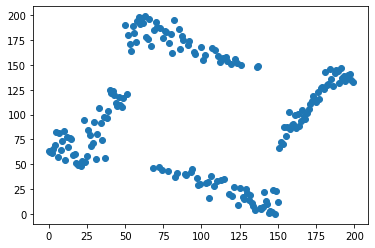

[34000] [6848293, 6847332, 6847185, 6844743, 6844517, 6844095, 6844042, 6844034, 6844034, 6844032] [6822273]


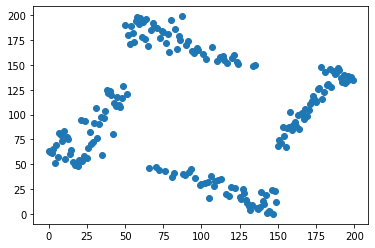

[35000] [6848293, 6848293, 6847348, 6847332, 6847185, 6846965, 6845830, 6845215, 6844743, 6844517] [6824641]


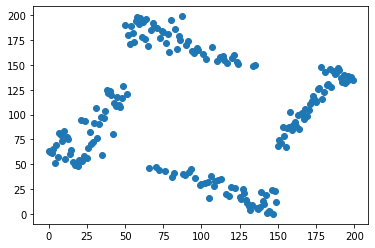

[36000] [6850489, 6849896, 6849456, 6848577, 6848566, 6848513, 6848293, 6848293, 6847887, 6847485] [6826323]


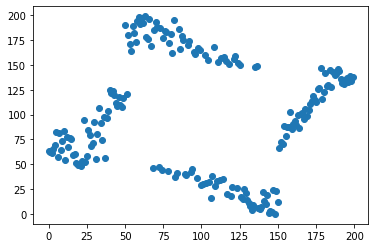

[37000] [6850633, 6850489, 6849896, 6849702, 6849561, 6849456, 6848808, 6848802, 6848577, 6848566] [6827641]


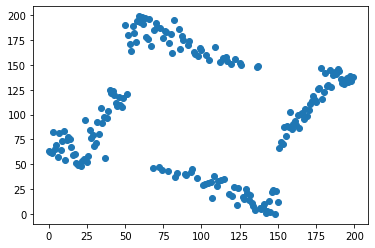

[38000] [6851969, 6850792, 6850756, 6850633, 6850489, 6850329, 6849896, 6849820, 6849702, 6849561] [6828888]


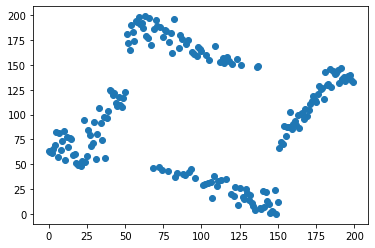

[39000] [6852464, 6852390, 6851969, 6851969, 6851087, 6850792, 6850756, 6850633, 6850576, 6850489] [6830970]


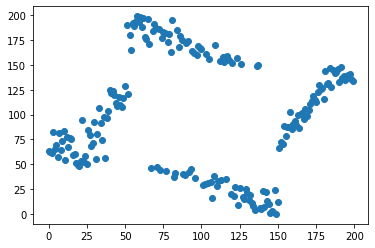

[40000] [6853611, 6852885, 6852464, 6852390, 6852356, 6852345, 6852251, 6852062, 6851969, 6851969] [6832817]


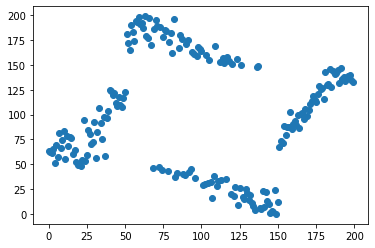

In [13]:
 EA203 = Evolutionary_Algorithm_randomcrossover_2413_POP(200,EA202)

[1000] [6856950, 6856551, 6855816, 6854837, 6854706, 6854525, 6854303, 6854185, 6854122, 6853809] [6833987]


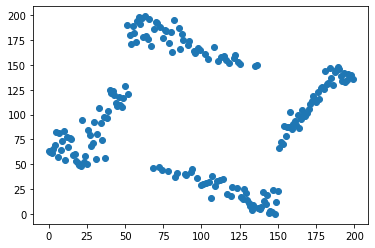

[2000] [6856950, 6856854, 6856551, 6856030, 6855864, 6855816, 6854837, 6854834, 6854706, 6854525] [6834767]


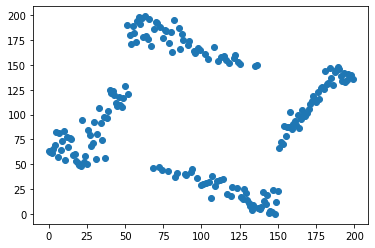

[3000] [6859160, 6856950, 6856854, 6856672, 6856551, 6856030, 6855864, 6855829, 6855816, 6855589] [6836013]


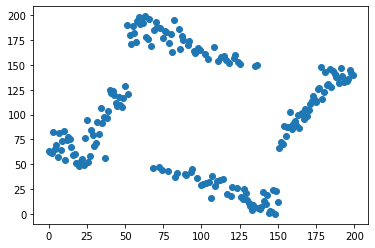

[4000] [6860095, 6859742, 6859740, 6859160, 6859004, 6858921, 6858755, 6857724, 6857662, 6857659] [6837433]


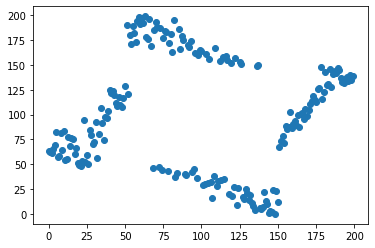

[5000] [6861043, 6860095, 6859807, 6859742, 6859740, 6859203, 6859160, 6859004, 6858921, 6858755] [6839122]


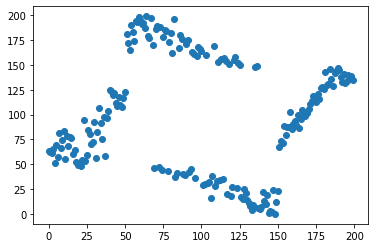

[6000] [6867496, 6861086, 6861043, 6860761, 6860652, 6860185, 6860151, 6860095, 6859807, 6859742] [6839895]


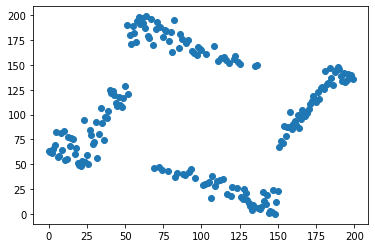

[7000] [6867496, 6861421, 6861086, 6861043, 6860761, 6860652, 6860222, 6860185, 6860151, 6860095] [6841076]


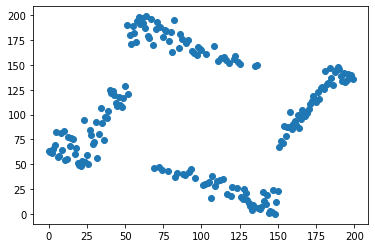

[8000] [6867496, 6863020, 6862673, 6862028, 6861488, 6861421, 6861401, 6861225, 6861178, 6861086] [6842329]


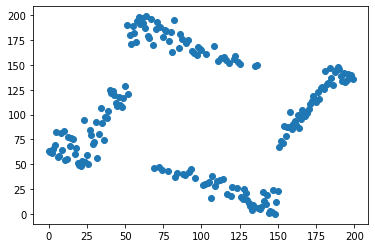

[9000] [6867496, 6863020, 6863004, 6862673, 6862358, 6862355, 6862037, 6862028, 6861987, 6861720] [6843635]


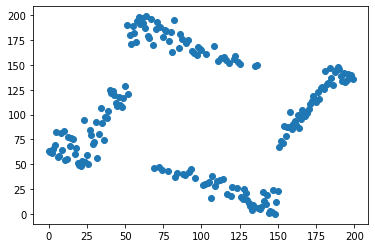

[10000] [6867496, 6866208, 6865323, 6863020, 6863013, 6863004, 6863004, 6862955, 6862955, 6862762] [6845037]


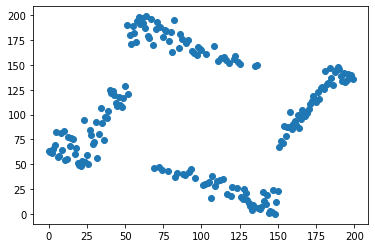

[11000] [6869101, 6867496, 6866208, 6865323, 6863789, 6863424, 6863356, 6863280, 6863020, 6863013] [6846545]


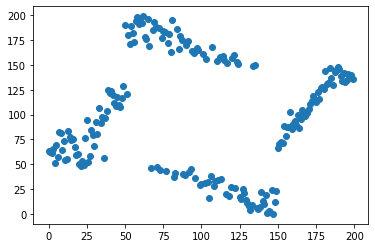

[12000] [6869101, 6867496, 6866208, 6866122, 6865696, 6865634, 6865323, 6864658, 6864443, 6864387] [6847781]


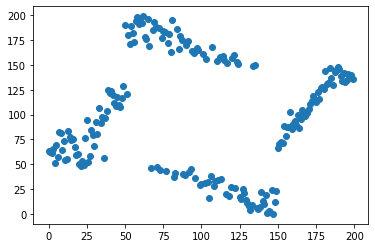

[13000] [6869101, 6867627, 6867496, 6866269, 6866208, 6866172, 6866122, 6865749, 6865696, 6865634] [6848752]


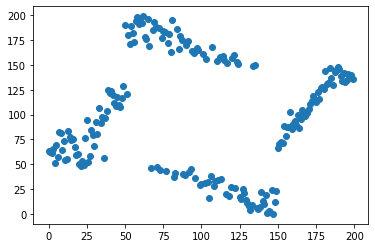

[14000] [6869101, 6869101, 6869090, 6868672, 6868658, 6867627, 6867496, 6866269, 6866269, 6866208] [6849439]


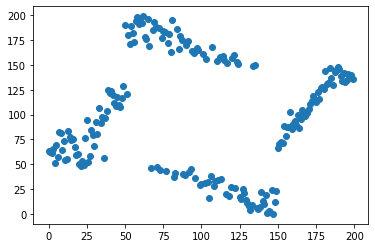

[15000] [6869101, 6869101, 6869090, 6868798, 6868672, 6868658, 6868658, 6868325, 6867627, 6867496] [6850240]


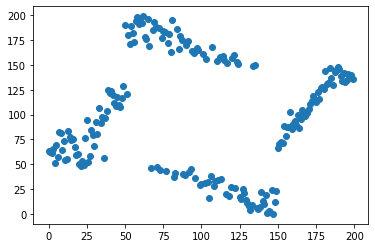

[16000] [6869101, 6869101, 6869101, 6869090, 6868798, 6868672, 6868658, 6868658, 6868325, 6867627] [6851204]


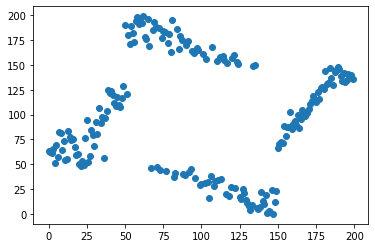

[17000] [6872929, 6870588, 6869226, 6869101, 6869101, 6869101, 6869090, 6869065, 6869059, 6868798] [6852356]


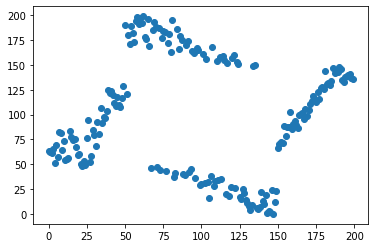

[18000] [6872929, 6870588, 6869309, 6869226, 6869101, 6869101, 6869101, 6869090, 6869090, 6869065] [6853338]


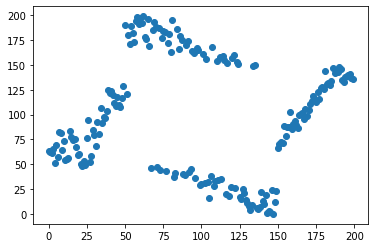

[19000] [6872929, 6872804, 6870588, 6870583, 6869885, 6869309, 6869309, 6869226, 6869226, 6869108] [6854575]


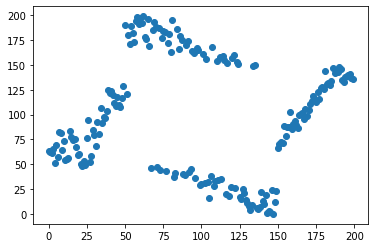

[20000] [6873983, 6872929, 6872804, 6872545, 6870588, 6870583, 6869885, 6869730, 6869309, 6869309] [6855403]


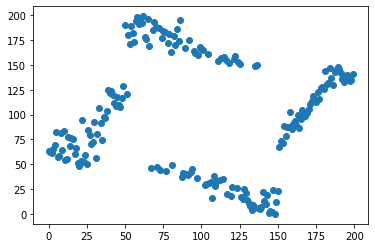

[21000] [6873983, 6873056, 6872929, 6872804, 6872711, 6872545, 6870760, 6870613, 6870588, 6870583] [6856525]


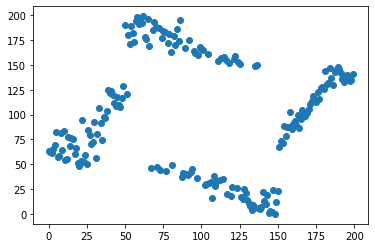

[22000] [6873983, 6873056, 6872932, 6872929, 6872804, 6872793, 6872791, 6872711, 6872694, 6872545] [6857895]


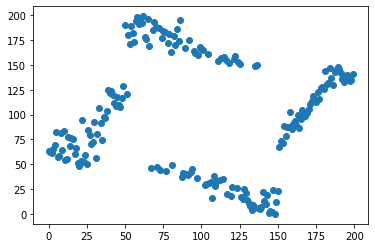

[23000] [6874409, 6874057, 6873983, 6873056, 6872932, 6872929, 6872804, 6872793, 6872791, 6872711] [6858859]


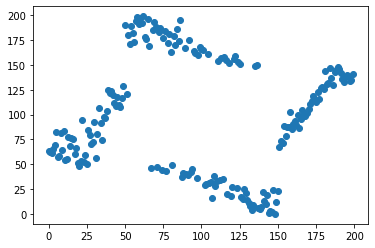

[24000] [6874759, 6874409, 6874057, 6873983, 6873979, 6873354, 6873056, 6873012, 6872932, 6872929] [6859797]


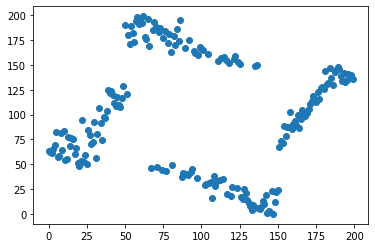

[25000] [6875396, 6874759, 6874409, 6874387, 6874375, 6874362, 6874334, 6874057, 6873983, 6873979] [6860526]


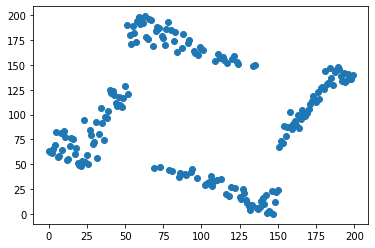

[26000] [6876040, 6875705, 6875396, 6875023, 6874759, 6874409, 6874387, 6874375, 6874362, 6874334] [6861087]


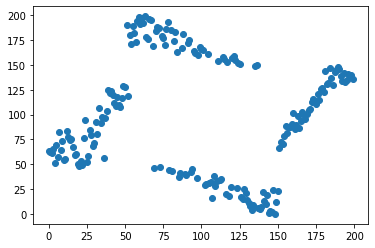

[27000] [6876040, 6875829, 6875705, 6875396, 6875203, 6875023, 6874759, 6874409, 6874387, 6874375] [6861807]


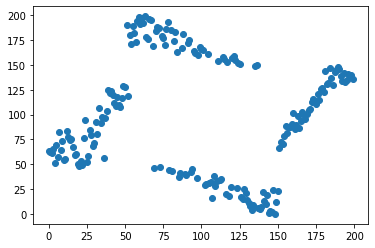

[28000] [6876513, 6876040, 6875829, 6875705, 6875484, 6875404, 6875396, 6875388, 6875295, 6875203] [6862603]


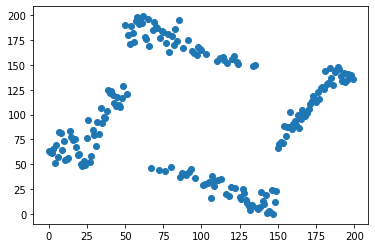

[29000] [6877174, 6876953, 6876887, 6876513, 6876040, 6875864, 6875864, 6875829, 6875705, 6875484] [6862995]


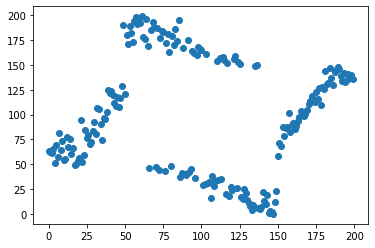

[30000] [6878271, 6877174, 6877016, 6876953, 6876887, 6876887, 6876739, 6876641, 6876553, 6876513] [6863871]


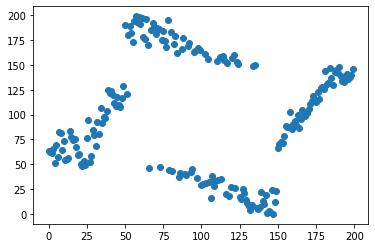

[31000] [6882651, 6882013, 6880940, 6878744, 6878482, 6878271, 6877872, 6877745, 6877174, 6877016] [6864534]


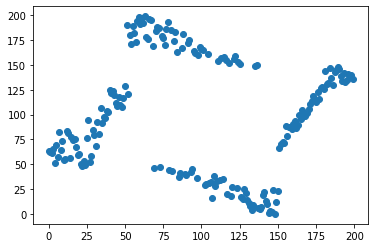

[32000] [6883416, 6882651, 6882013, 6880940, 6880377, 6878744, 6878482, 6878329, 6878280, 6878271] [6865350]


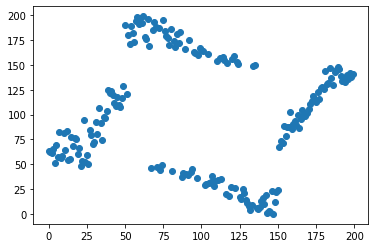

[33000] [6883416, 6882651, 6882050, 6882013, 6881134, 6881030, 6880950, 6880940, 6880377, 6880151] [6866194]


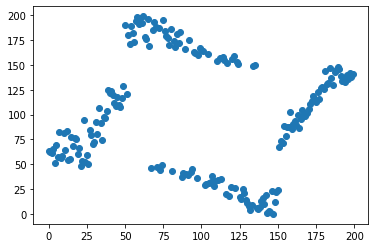

[34000] [6883416, 6882651, 6882651, 6882050, 6882013, 6882013, 6881675, 6881134, 6881030, 6880950] [6866768]


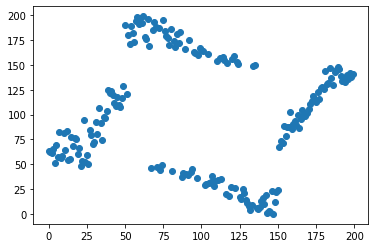

[35000] [6883860, 6883416, 6883297, 6883200, 6883008, 6882651, 6882651, 6882469, 6882050, 6882013] [6867498]


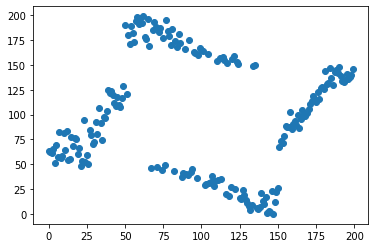

[36000] [6883860, 6883416, 6883297, 6883200, 6883195, 6883103, 6883008, 6882653, 6882651, 6882651] [6868146]


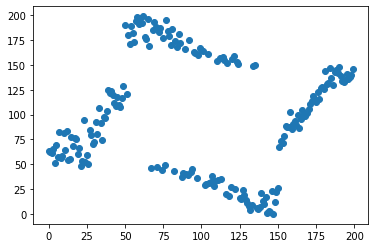

[37000] [6883987, 6883987, 6883860, 6883655, 6883416, 6883386, 6883297, 6883297, 6883200, 6883195] [6868779]


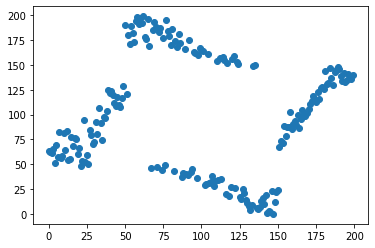

[38000] [6884984, 6884984, 6883987, 6883987, 6883985, 6883915, 6883860, 6883844, 6883655, 6883416] [6869256]


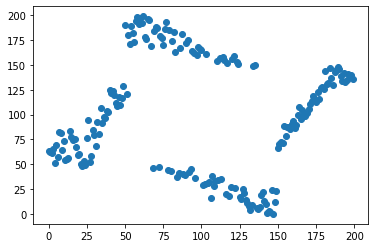

[39000] [6890318, 6885654, 6885560, 6884984, 6884984, 6884852, 6884649, 6884624, 6884434, 6884414] [6870376]


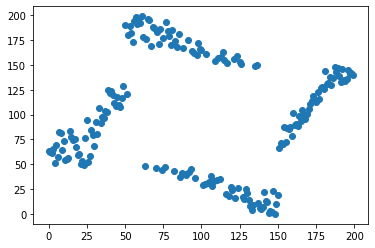

[40000] [6890318, 6885838, 6885654, 6885560, 6885560, 6885509, 6885420, 6885420, 6885410, 6885409] [6871397]


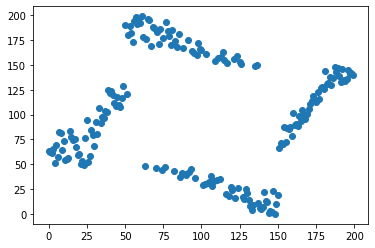

In [14]:
 EA204 = Evolutionary_Algorithm_randomcrossover_2413_POP(200,EA203)

[1000] [6890318, 6887240, 6886673, 6886356, 6886301, 6886289, 6886248, 6886066, 6886043, 6885838] [6872505]


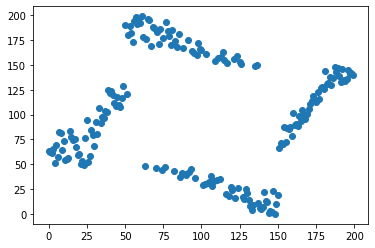

[2000] [6890318, 6888059, 6887840, 6887240, 6887141, 6887136, 6887111, 6886832, 6886673, 6886437] [6873420]


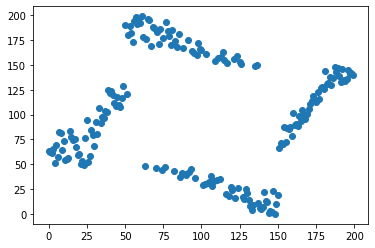

[3000] [6892348, 6890318, 6889399, 6888078, 6888059, 6887990, 6887962, 6887860, 6887840, 6887513] [6874271]


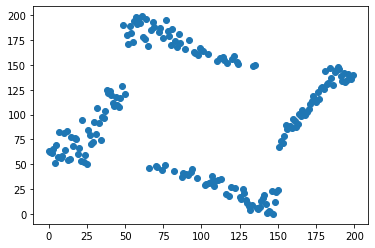

[4000] [6892348, 6890318, 6890318, 6889399, 6888813, 6888666, 6888652, 6888274, 6888163, 6888078] [6875136]


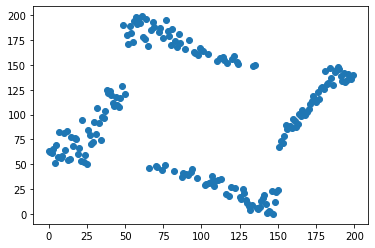

[5000] [6892358, 6892348, 6892328, 6892328, 6890443, 6890318, 6890318, 6889870, 6889399, 6888913] [6876042]


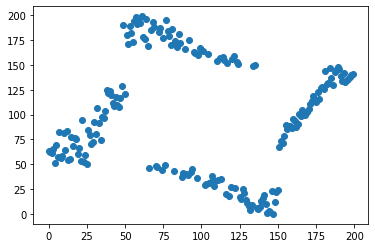

[6000] [6892658, 6892656, 6892358, 6892348, 6892328, 6892328, 6891788, 6890733, 6890443, 6890443] [6877458]


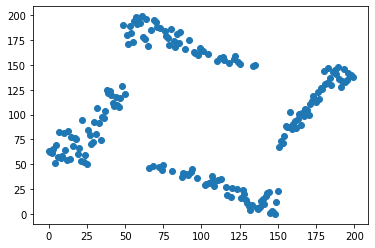

[7000] [6894119, 6894111, 6893414, 6892689, 6892658, 6892656, 6892358, 6892348, 6892328, 6892328] [6878904]


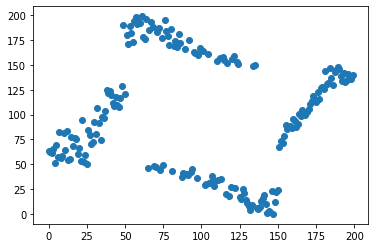

[8000] [6895475, 6894119, 6894111, 6893414, 6893096, 6893003, 6892689, 6892658, 6892656, 6892476] [6880306]


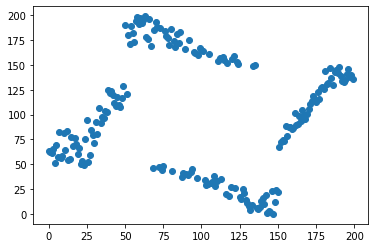

[9000] [6899976, 6895603, 6895505, 6895475, 6895475, 6894371, 6894119, 6894111, 6894111, 6893414] [6881675]


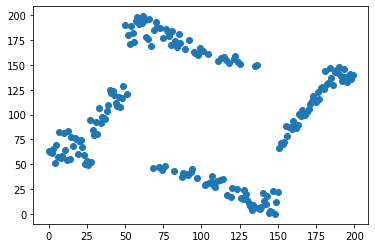

[10000] [6899976, 6895768, 6895768, 6895603, 6895505, 6895475, 6895475, 6895470, 6894902, 6894890] [6882630]


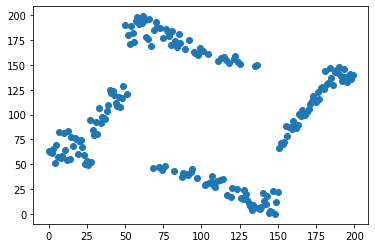

[11000] [6900578, 6899978, 6899976, 6895883, 6895883, 6895768, 6895768, 6895612, 6895603, 6895505] [6883397]


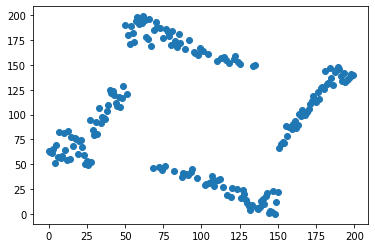

[12000] [6900578, 6900578, 6899978, 6899976, 6897262, 6896816, 6895901, 6895891, 6895883, 6895883] [6883985]


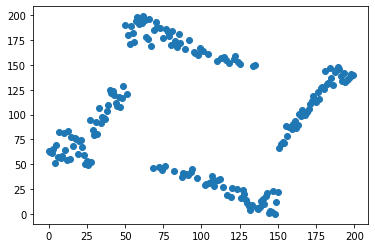

[13000] [6900578, 6900578, 6899978, 6899976, 6899976, 6897262, 6896816, 6896521, 6896437, 6896350] [6884492]


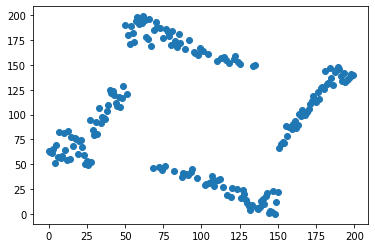

[14000] [6901167, 6900979, 6900578, 6900578, 6900145, 6899978, 6899976, 6899976, 6898161, 6897562] [6885230]


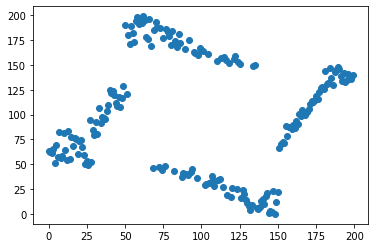

[15000] [6901167, 6900979, 6900979, 6900578, 6900578, 6900560, 6900145, 6899978, 6899976, 6899976] [6885953]


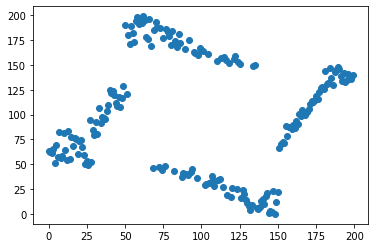

[16000] [6901167, 6900979, 6900979, 6900578, 6900578, 6900560, 6900145, 6899978, 6899976, 6899976] [6886357]


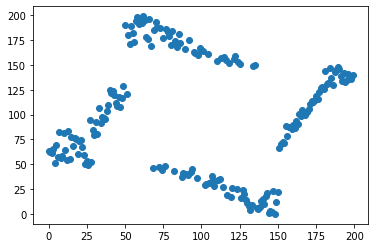

[17000] [6902520, 6901442, 6901439, 6901167, 6901055, 6900979, 6900979, 6900979, 6900979, 6900961] [6887240]


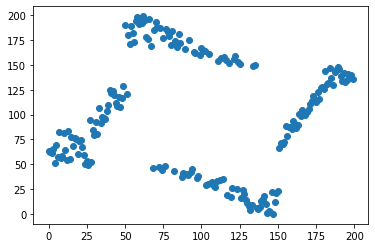

[18000] [6904010, 6902520, 6902520, 6902520, 6902394, 6901442, 6901439, 6901288, 6901167, 6901055] [6887919]


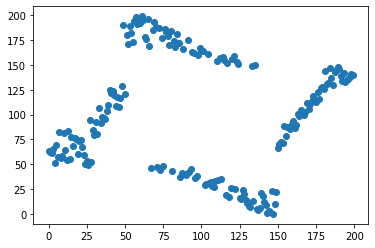

[19000] [6904010, 6904010, 6902520, 6902520, 6902520, 6902506, 6902394, 6902394, 6901759, 6901753] [6888619]


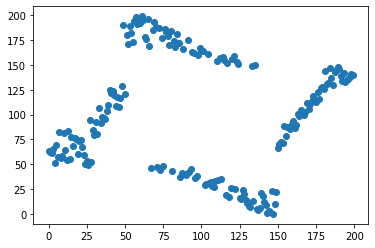

[20000] [6904010, 6904010, 6904010, 6903866, 6902782, 6902775, 6902520, 6902520, 6902520, 6902520] [6889391]


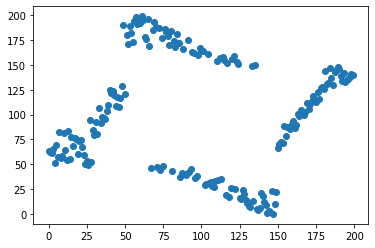

[21000] [6904287, 6904178, 6904010, 6904010, 6904010, 6903866, 6902905, 6902782, 6902782, 6902775] [6890286]


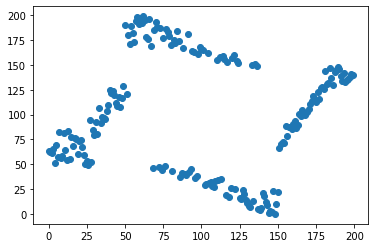

[22000] [6904287, 6904178, 6904010, 6904010, 6904010, 6904010, 6904010, 6903973, 6903866, 6903863] [6891521]


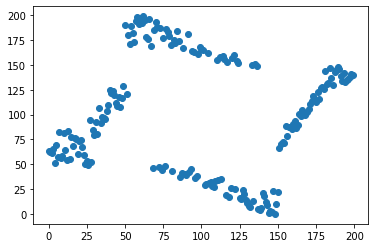

[23000] [6904353, 6904292, 6904287, 6904287, 6904287, 6904178, 6904010, 6904010, 6904010, 6904010] [6892498]


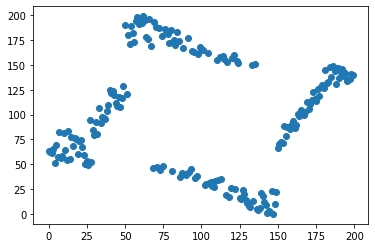

[24000] [6906292, 6905909, 6905416, 6904353, 6904292, 6904287, 6904287, 6904287, 6904287, 6904279] [6893502]


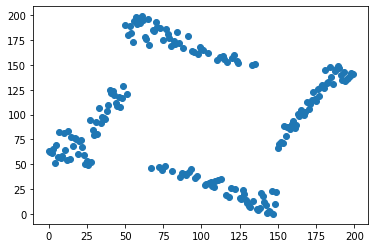

[25000] [6906377, 6906292, 6905909, 6905482, 6905416, 6905391, 6904999, 6904912, 6904610, 6904525] [6894634]


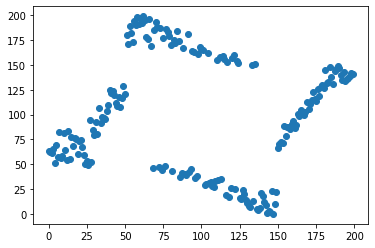

[26000] [6907724, 6907384, 6906377, 6906292, 6905909, 6905699, 6905546, 6905482, 6905416, 6905416] [6895309]


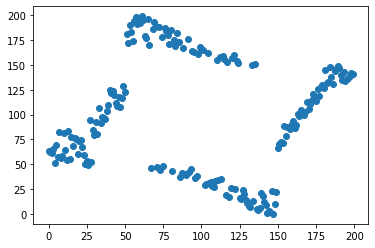

[27000] [6907724, 6907384, 6907202, 6907199, 6907058, 6907029, 6906377, 6906292, 6905909, 6905909] [6895901]


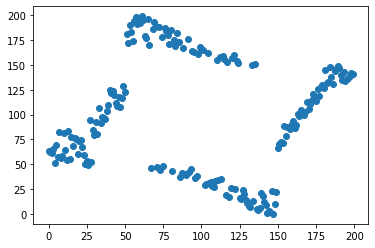

[28000] [6907769, 6907769, 6907724, 6907634, 6907384, 6907202, 6907199, 6907072, 6907058, 6907048] [6896599]


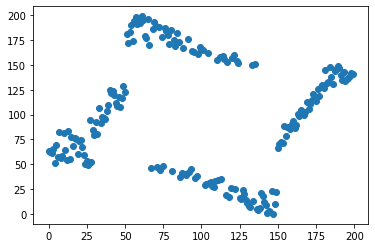

[29000] [6907800, 6907800, 6907769, 6907769, 6907761, 6907724, 6907634, 6907384, 6907202, 6907202] [6897417]


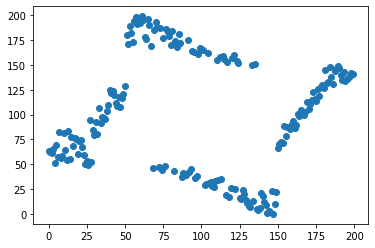

[30000] [6907800, 6907800, 6907769, 6907769, 6907761, 6907724, 6907724, 6907634, 6907444, 6907396] [6898780]


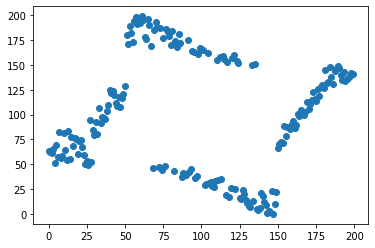

[31000] [6908757, 6908698, 6908185, 6908161, 6908031, 6907800, 6907800, 6907769, 6907769, 6907769] [6900208]


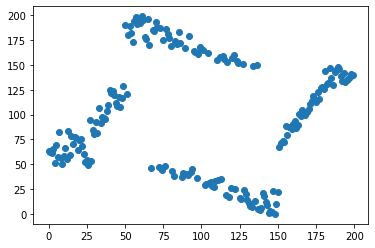

[32000] [6909582, 6908954, 6908847, 6908757, 6908698, 6908638, 6908529, 6908465, 6908423, 6908328] [6900841]


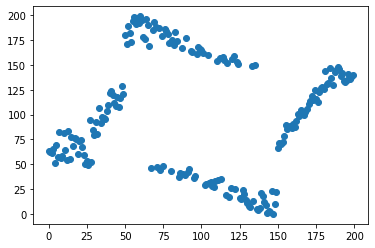

[33000] [6909582, 6908954, 6908850, 6908847, 6908838, 6908828, 6908757, 6908698, 6908638, 6908542] [6901324]


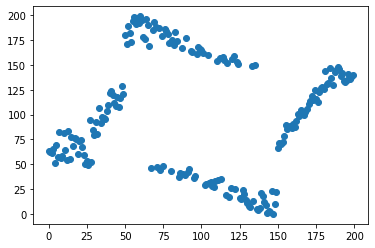

[34000] [6909582, 6909573, 6909146, 6909144, 6909143, 6908979, 6908954, 6908861, 6908861, 6908850] [6902085]


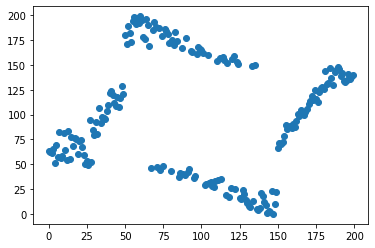

[35000] [6910552, 6910096, 6909598, 6909582, 6909582, 6909573, 6909475, 6909248, 6909146, 6909145] [6902566]


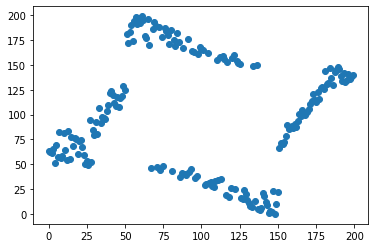

[36000] [6910552, 6910552, 6910261, 6910096, 6910048, 6910038, 6910038, 6909972, 6909684, 6909640] [6903033]


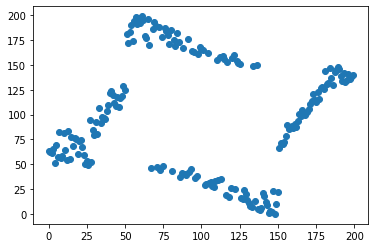

[37000] [6911948, 6911213, 6911190, 6911077, 6910612, 6910552, 6910552, 6910466, 6910347, 6910344] [6903426]


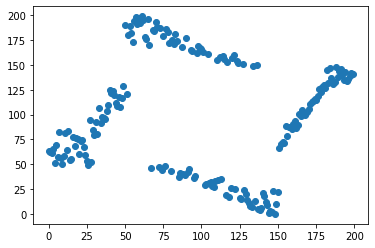

[38000] [6913056, 6912075, 6911948, 6911542, 6911213, 6911190, 6911186, 6911172, 6911077, 6911068] [6903936]


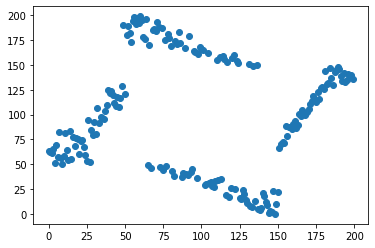

[39000] [6913056, 6913054, 6912865, 6912075, 6911948, 6911542, 6911517, 6911456, 6911409, 6911213] [6904178]


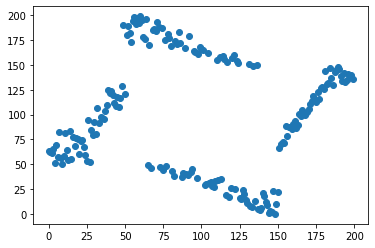

[40000] [6913056, 6913054, 6912865, 6912295, 6912280, 6912075, 6911948, 6911668, 6911643, 6911639] [6904460]


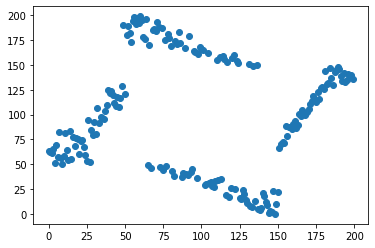

In [15]:
 EA205 = Evolutionary_Algorithm_randomcrossover_2413_POP(200,EA204)

[1000] [6913396, 6913252, 6913172, 6913068, 6913056, 6913054, 6912986, 6912986, 6912865, 6912797] [6905075]


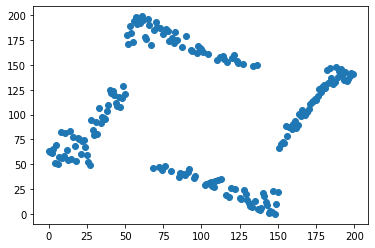

[2000] [6916147, 6914121, 6913482, 6913405, 6913396, 6913252, 6913172, 6913068, 6913056, 6913054] [6905769]


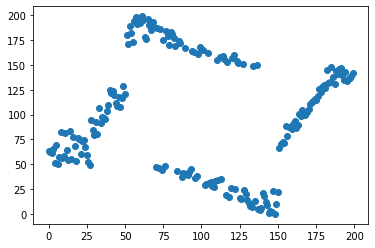

[3000] [6916147, 6914373, 6914121, 6913908, 6913772, 6913699, 6913541, 6913526, 6913505, 6913482] [6906362]


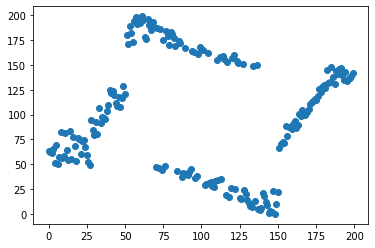

[4000] [6916147, 6916056, 6915444, 6915393, 6915381, 6915000, 6914373, 6914121, 6914082, 6913915] [6906884]


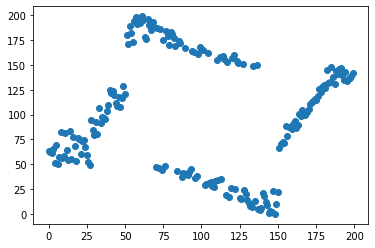

[5000] [6916553, 6916147, 6916120, 6916056, 6915873, 6915444, 6915393, 6915381, 6915315, 6915000] [6907208]


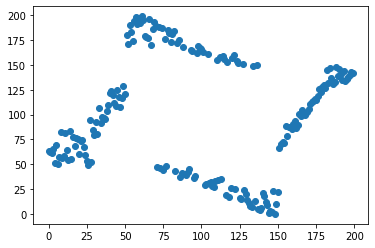

[6000] [6916553, 6916147, 6916120, 6916056, 6916055, 6916018, 6915873, 6915846, 6915767, 6915451] [6907730]


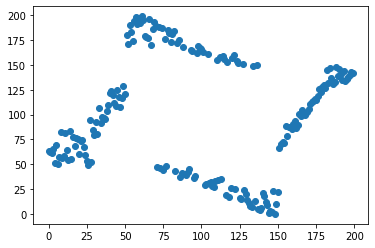

[7000] [6918069, 6917822, 6917822, 6916782, 6916782, 6916721, 6916553, 6916483, 6916424, 6916396] [6908178]


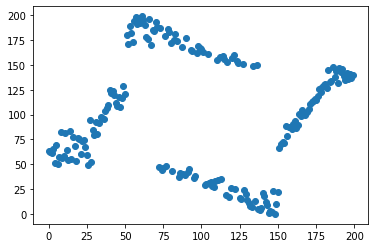

[8000] [6918375, 6918302, 6918273, 6918069, 6918064, 6918064, 6917822, 6917822, 6917822, 6917816] [6908528]


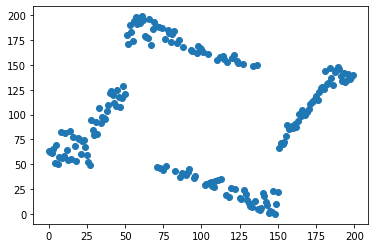

[9000] [6919300, 6918680, 6918680, 6918375, 6918333, 6918302, 6918273, 6918079, 6918069, 6918064] [6908946]


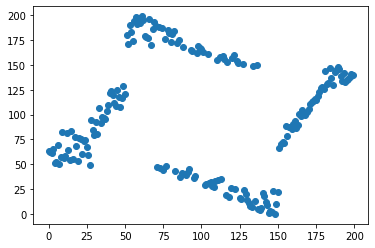

[10000] [6920778, 6920589, 6919610, 6919300, 6919299, 6919148, 6918680, 6918680, 6918680, 6918627] [6909410]


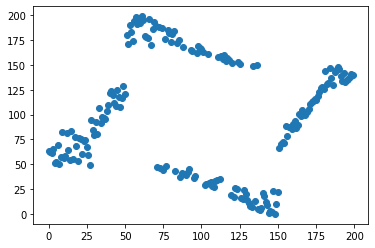

[11000] [6920778, 6920589, 6919996, 6919937, 6919771, 6919610, 6919328, 6919300, 6919299, 6919148] [6910026]


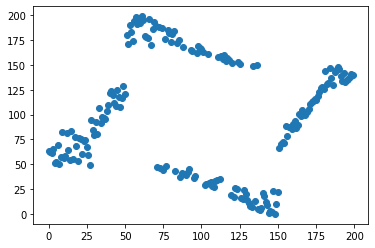

[12000] [6920912, 6920778, 6920778, 6920647, 6920647, 6920589, 6920477, 6920062, 6919996, 6919976] [6910611]


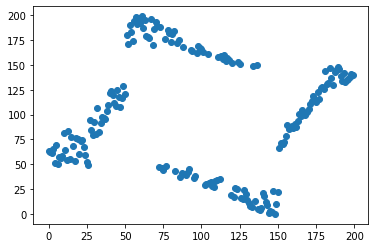

[13000] [6923117, 6922077, 6921781, 6920912, 6920778, 6920778, 6920732, 6920647, 6920647, 6920647] [6911366]


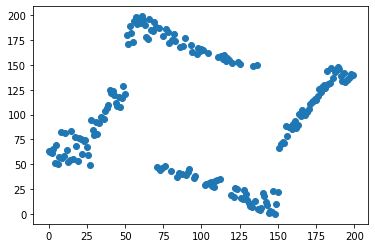

[14000] [6923117, 6922077, 6922052, 6921781, 6921739, 6921581, 6921581, 6921569, 6921469, 6921457] [6911919]


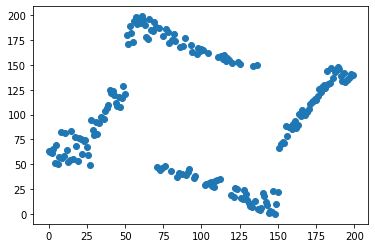

[15000] [6923302, 6923178, 6923117, 6923117, 6922428, 6922321, 6922077, 6922052, 6921991, 6921781] [6912640]


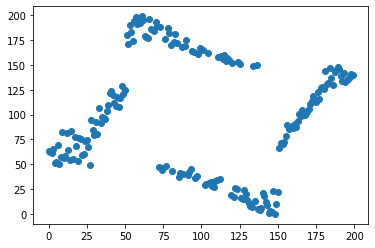

[16000] [6923776, 6923306, 6923302, 6923178, 6923124, 6923124, 6923117, 6923117, 6922842, 6922693] [6913341]


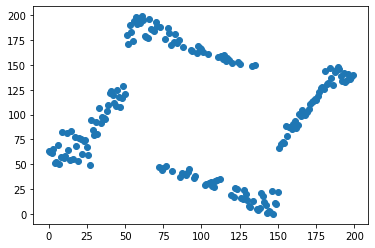

[17000] [6923776, 6923306, 6923302, 6923210, 6923178, 6923159, 6923124, 6923124, 6923122, 6923117] [6913917]


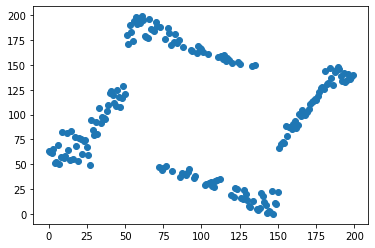

[18000] [6924357, 6924192, 6923776, 6923465, 6923393, 6923380, 6923344, 6923306, 6923302, 6923210] [6914722]


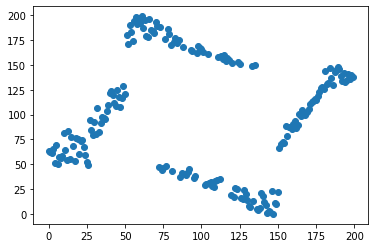

[19000] [6924486, 6924357, 6924192, 6924109, 6923832, 6923776, 6923581, 6923558, 6923525, 6923525] [6915381]


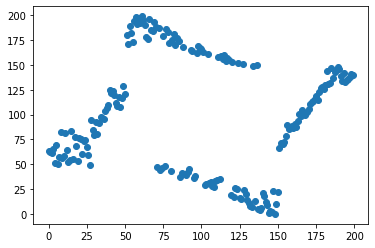

[20000] [6924602, 6924486, 6924486, 6924472, 6924359, 6924357, 6924229, 6924192, 6924109, 6924041] [6916147]


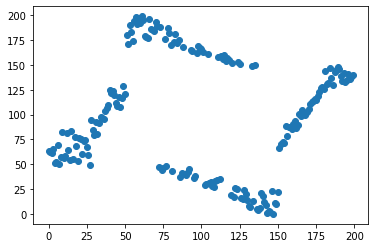

[21000] [6925494, 6924847, 6924602, 6924602, 6924486, 6924486, 6924472, 6924441, 6924359, 6924357] [6916800]


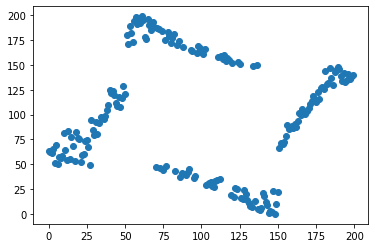

[22000] [6925494, 6925351, 6925095, 6924912, 6924847, 6924838, 6924813, 6924637, 6924602, 6924602] [6917547]


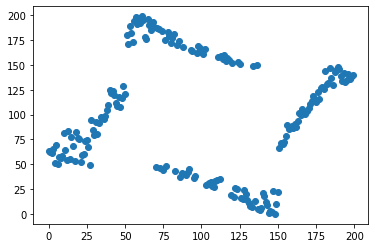

[23000] [6925640, 6925566, 6925494, 6925412, 6925351, 6925145, 6925145, 6925139, 6925105, 6925101] [6918052]


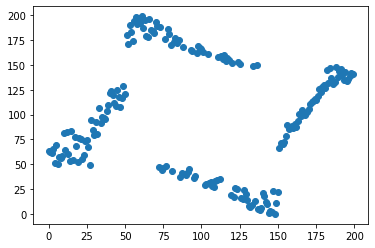

[24000] [6926781, 6926341, 6926176, 6925893, 6925893, 6925831, 6925702, 6925695, 6925688, 6925670] [6918438]


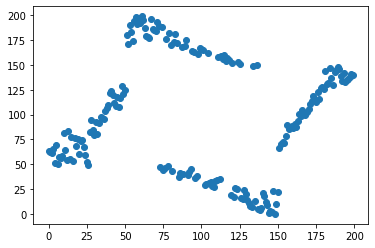

[25000] [6927793, 6927759, 6927061, 6926912, 6926912, 6926781, 6926754, 6926371, 6926341, 6926176] [6918921]


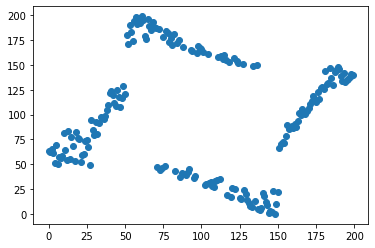

[26000] [6928337, 6928137, 6927793, 6927793, 6927759, 6927294, 6927294, 6927061, 6927061, 6927061] [6919323]


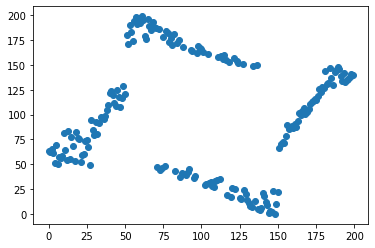

[27000] [6928340, 6928337, 6928137, 6927933, 6927829, 6927796, 6927793, 6927793, 6927793, 6927759] [6919827]


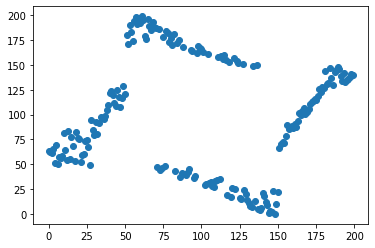

[28000] [6928340, 6928340, 6928337, 6928337, 6928137, 6927933, 6927829, 6927826, 6927796, 6927796] [6920477]


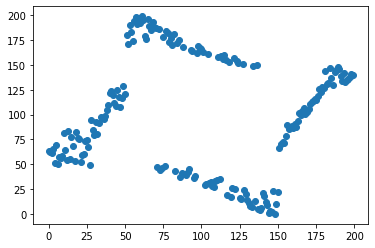

[29000] [6929357, 6928608, 6928400, 6928370, 6928340, 6928340, 6928340, 6928337, 6928337, 6928337] [6921305]


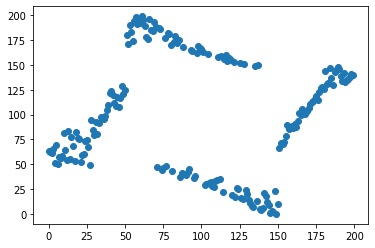

[30000] [6929357, 6929222, 6928790, 6928608, 6928400, 6928370, 6928344, 6928340, 6928340, 6928340] [6921643]


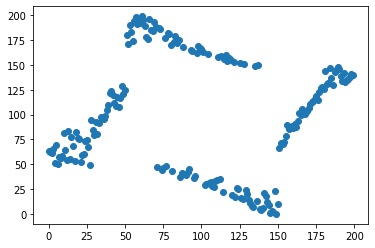

[31000] [6929501, 6929357, 6929331, 6929296, 6929222, 6928896, 6928822, 6928790, 6928670, 6928608] [6922124]


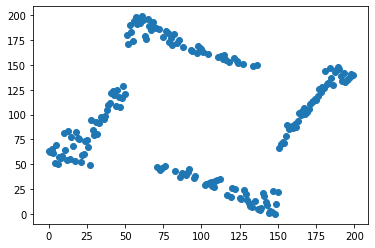

[32000] [6930182, 6929501, 6929501, 6929396, 6929357, 6929331, 6929296, 6929222, 6928896, 6928822] [6922635]


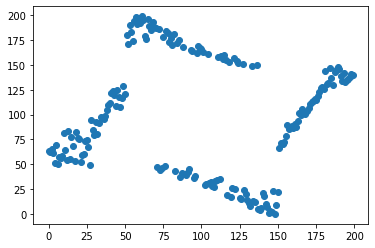

[33000] [6930182, 6929556, 6929522, 6929519, 6929501, 6929501, 6929501, 6929501, 6929501, 6929501] [6923097]


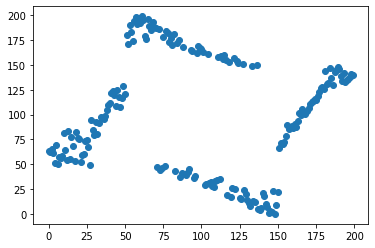

[34000] [6930182, 6930157, 6929888, 6929696, 6929696, 6929556, 6929553, 6929522, 6929522, 6929519] [6923380]


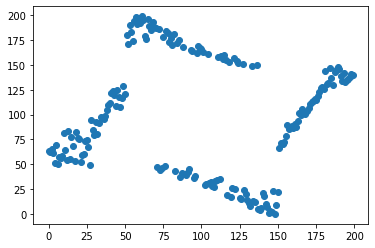

[35000] [6930182, 6930177, 6930157, 6929942, 6929888, 6929862, 6929731, 6929728, 6929696, 6929696] [6923942]


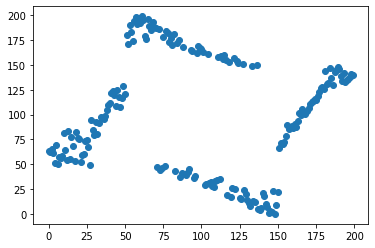

[36000] [6934319, 6933602, 6933415, 6931941, 6931485, 6930409, 6930345, 6930231, 6930211, 6930182] [6924515]


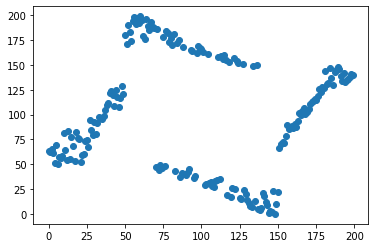

[37000] [6934471, 6934319, 6934319, 6933678, 6933602, 6933575, 6933523, 6933418, 6933415, 6933412] [6925125]


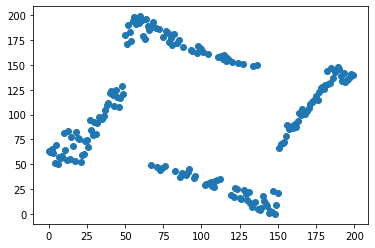

[38000] [6934558, 6934474, 6934471, 6934319, 6934319, 6933681, 6933678, 6933678, 6933602, 6933575] [6925661]


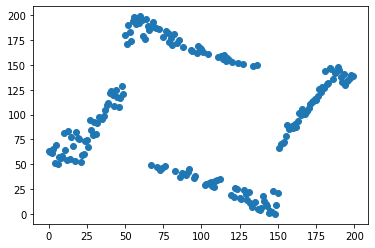

[39000] [6934558, 6934474, 6934474, 6934471, 6934319, 6934319, 6934319, 6933769, 6933681, 6933678] [6926350]


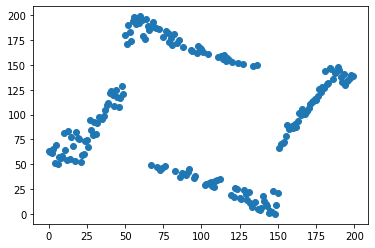

[40000] [6935021, 6935021, 6934614, 6934558, 6934505, 6934474, 6934474, 6934471, 6934471, 6934427] [6926920]


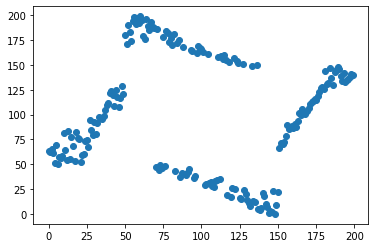

In [16]:
EA206 = Evolutionary_Algorithm_randomcrossover_2413_POP(200,EA205)

[1000] [6913937, 6913766, 6913283, 6913056, 6913054, 6913054, 6912865, 6912698, 6912695, 6912498] [6905200]


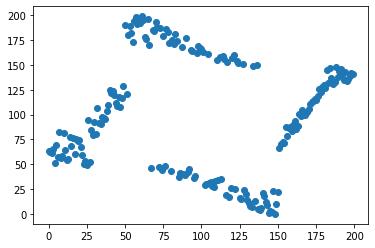

[2000] [6914634, 6914502, 6913937, 6913766, 6913631, 6913398, 6913379, 6913283, 6913219, 6913056] [6905806]


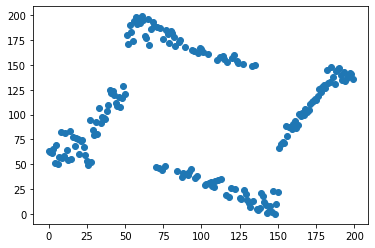

[3000] [6914634, 6914633, 6914502, 6914009, 6913945, 6913937, 6913884, 6913766, 6913692, 6913654] [6906344]


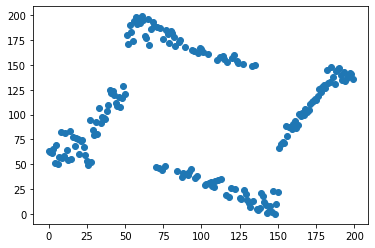

[4000] [6915265, 6914955, 6914760, 6914725, 6914634, 6914633, 6914582, 6914502, 6914502, 6914376] [6907046]


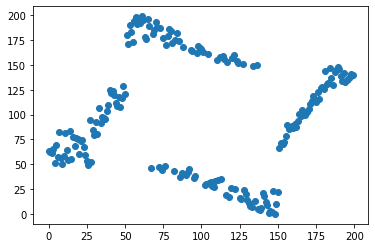

[5000] [6916705, 6916186, 6915541, 6915349, 6915265, 6915207, 6915207, 6915180, 6915024, 6914955] [6907275]


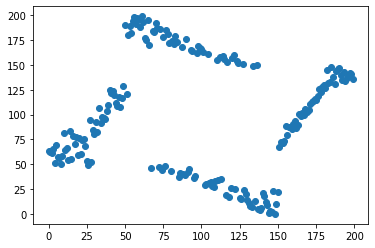

[6000] [6917942, 6916705, 6916593, 6916585, 6916567, 6916292, 6916186, 6916186, 6916176, 6915889] [6907769]


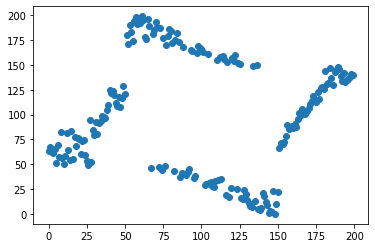

[7000] [6920708, 6919085, 6918303, 6917942, 6917918, 6917002, 6916853, 6916852, 6916705, 6916593] [6908256]


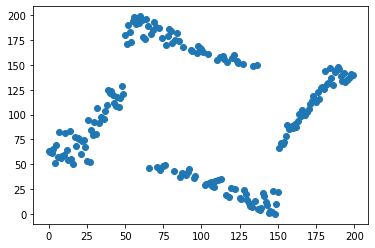

[8000] [6920708, 6920387, 6919286, 6919085, 6919085, 6919041, 6918897, 6918591, 6918582, 6918424] [6908581]


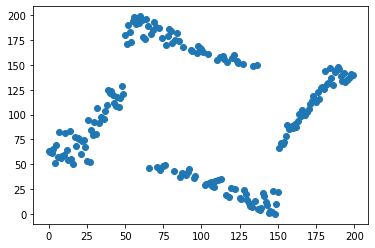

[9000] [6920708, 6920387, 6919450, 6919397, 6919286, 6919207, 6919158, 6919158, 6919085, 6919085] [6908925]


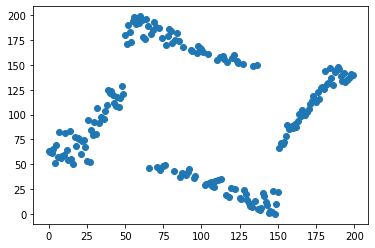

[10000] [6920708, 6920708, 6920465, 6920387, 6919685, 6919450, 6919441, 6919440, 6919397, 6919286] [6909449]


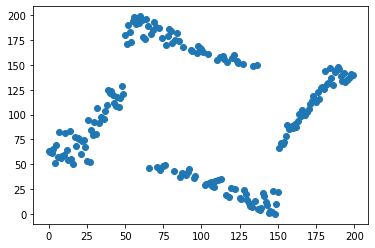

[11000] [6921019, 6920708, 6920708, 6920708, 6920465, 6920455, 6920387, 6920296, 6920273, 6920074] [6910053]


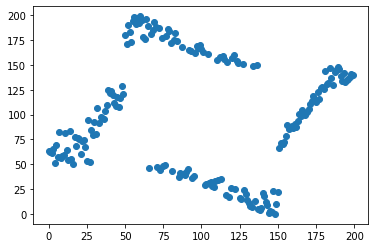

[12000] [6921019, 6920708, 6920708, 6920708, 6920708, 6920708, 6920708, 6920623, 6920465, 6920455] [6910598]


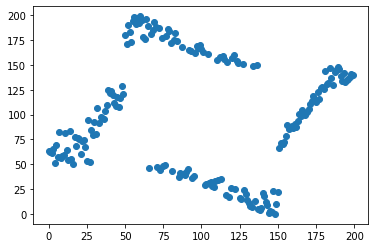

[13000] [6922124, 6921019, 6920930, 6920830, 6920768, 6920708, 6920708, 6920708, 6920708, 6920708] [6911213]


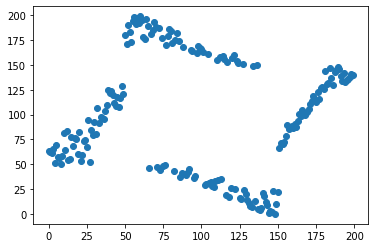

[14000] [6922124, 6921804, 6921275, 6921019, 6921019, 6921019, 6921012, 6920934, 6920931, 6920930] [6911812]


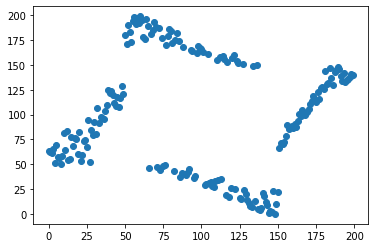

[15000] [6922124, 6922124, 6921804, 6921546, 6921389, 6921379, 6921361, 6921361, 6921335, 6921288] [6912634]


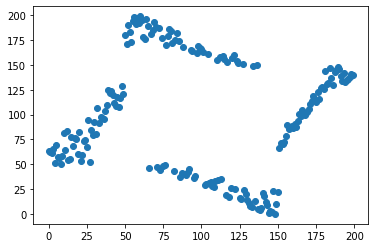

[16000] [6923143, 6922503, 6922500, 6922210, 6922207, 6922197, 6922197, 6922124, 6922124, 6922124] [6913699]


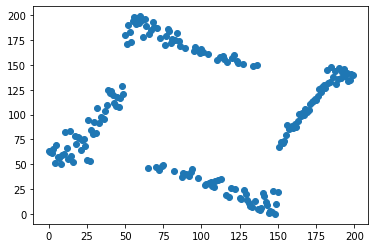

[17000] [6923498, 6923143, 6922891, 6922503, 6922503, 6922503, 6922503, 6922503, 6922502, 6922500] [6914585]


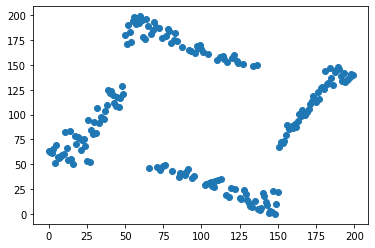

[18000] [6924220, 6923919, 6923498, 6923359, 6923143, 6923083, 6923070, 6922981, 6922891, 6922854] [6915333]


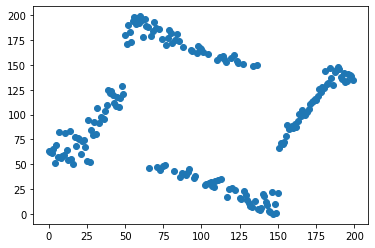

[19000] [6924274, 6924220, 6923919, 6923800, 6923498, 6923359, 6923359, 6923143, 6923135, 6923083] [6915930]


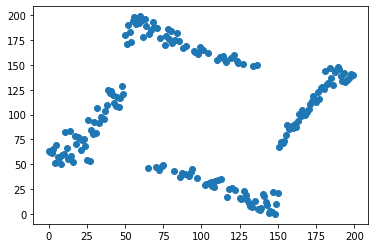

[20000] [6924274, 6924220, 6924198, 6924130, 6923945, 6923919, 6923919, 6923897, 6923800, 6923523] [6916630]


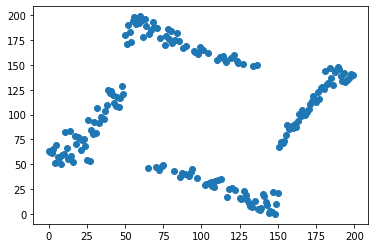

[21000] [6924640, 6924596, 6924552, 6924486, 6924274, 6924274, 6924220, 6924206, 6924198, 6924198] [6917413]


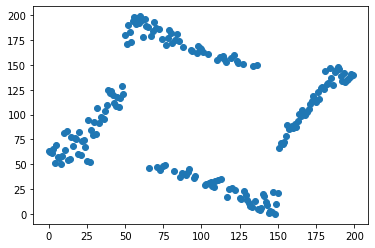

[22000] [6926016, 6924687, 6924640, 6924596, 6924552, 6924486, 6924434, 6924291, 6924274, 6924274] [6918323]


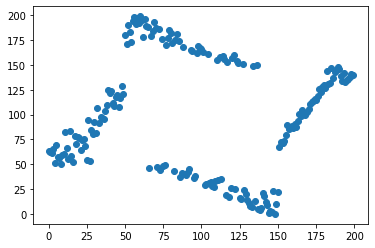

[23000] [6926016, 6925869, 6925793, 6925636, 6925636, 6925622, 6925346, 6925258, 6925080, 6925080] [6919082]


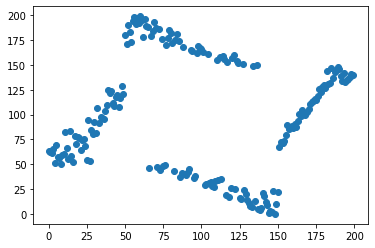

[24000] [6926306, 6926016, 6925869, 6925793, 6925793, 6925636, 6925636, 6925622, 6925346, 6925336] [6919506]


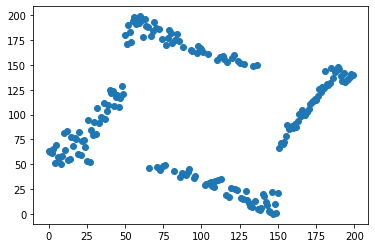

[25000] [6926496, 6926306, 6926075, 6926016, 6925904, 6925896, 6925869, 6925793, 6925793, 6925636] [6919952]


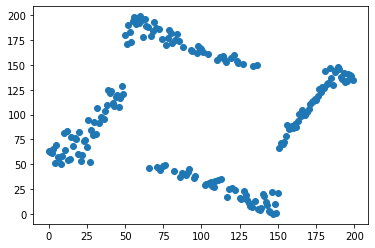

[26000] [6926496, 6926496, 6926466, 6926459, 6926447, 6926306, 6926202, 6926075, 6926016, 6925918] [6920311]


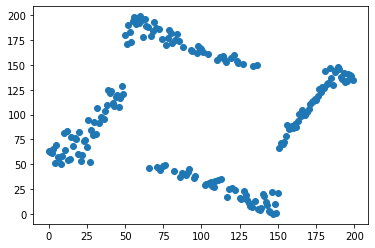

[27000] [6928483, 6927010, 6926690, 6926645, 6926527, 6926496, 6926496, 6926496, 6926482, 6926482] [6920708]


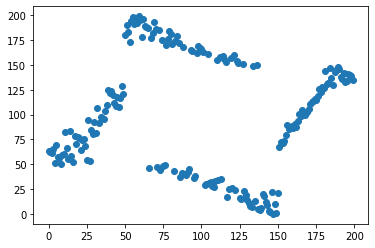

[28000] [6928483, 6927641, 6927378, 6927253, 6927010, 6926713, 6926690, 6926645, 6926586, 6926527] [6920894]


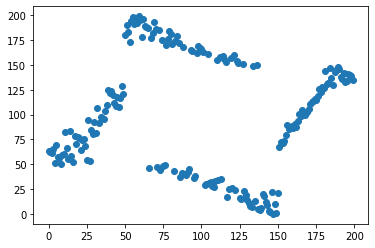

[29000] [6928483, 6928471, 6928056, 6928042, 6927641, 6927591, 6927378, 6927253, 6927252, 6927081] [6921242]


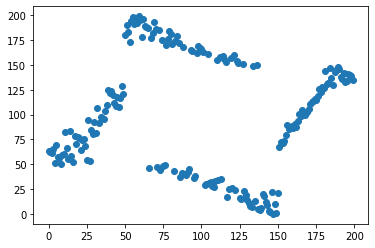

[30000] [6928501, 6928483, 6928471, 6928056, 6928042, 6927784, 6927641, 6927591, 6927410, 6927410] [6921702]


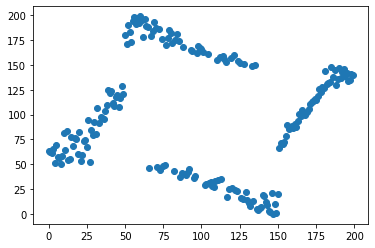

[31000] [6928501, 6928483, 6928471, 6928104, 6928056, 6928042, 6927784, 6927784, 6927641, 6927630] [6922197]


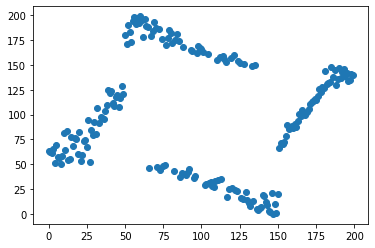

[32000] [6928501, 6928483, 6928471, 6928469, 6928332, 6928247, 6928135, 6928104, 6928056, 6928042] [6922503]


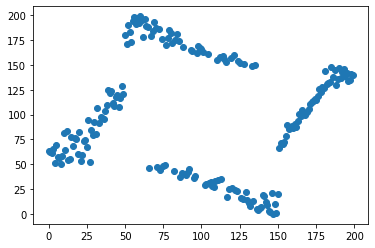

[33000] [6929344, 6928777, 6928505, 6928501, 6928501, 6928501, 6928483, 6928471, 6928469, 6928374] [6923009]


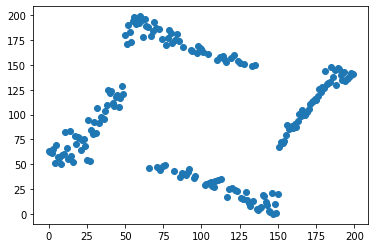

[34000] [6929995, 6929468, 6929429, 6929393, 6929353, 6929344, 6929032, 6928777, 6928740, 6928654] [6923348]


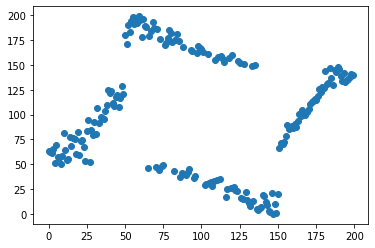

[35000] [6930318, 6929995, 6929543, 6929468, 6929429, 6929429, 6929393, 6929353, 6929344, 6929216] [6923677]


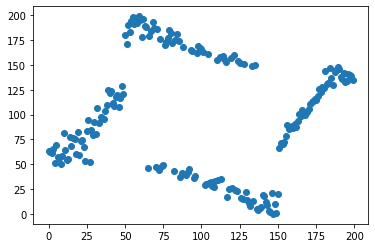

[36000] [6931495, 6930318, 6930048, 6929995, 6929908, 6929736, 6929543, 6929468, 6929460, 6929446] [6924134]


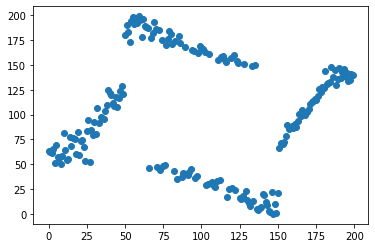

[37000] [6932230, 6931495, 6931440, 6930892, 6930588, 6930456, 6930318, 6930282, 6930237, 6930096] [6924605]


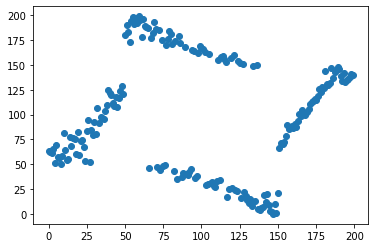

[38000] [6932383, 6932230, 6931495, 6931440, 6930892, 6930609, 6930588, 6930567, 6930456, 6930380] [6924955]


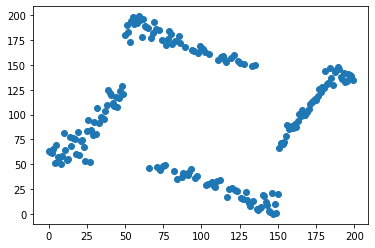

[39000] [6932383, 6932230, 6931858, 6931515, 6931495, 6931440, 6931387, 6931178, 6930922, 6930892] [6925369]


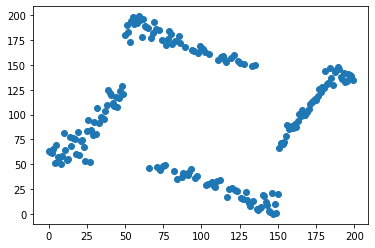

[40000] [6932383, 6932337, 6932230, 6931858, 6931540, 6931515, 6931495, 6931465, 6931465, 6931445] [6925793]


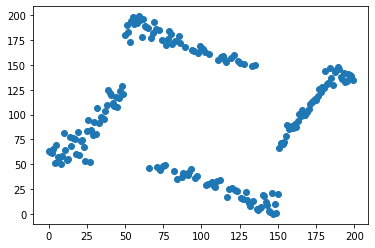

In [17]:
EA206 = Evolutionary_Algorithm_randomcrossover_2413_POP(200,EA205)

[1000] [6932413, 6932383, 6932366, 6932366, 6932363, 6932337, 6932335, 6932335, 6932230, 6932128] [6926065]


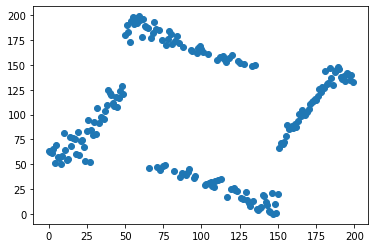

[2000] [6933064, 6932992, 6932770, 6932413, 6932383, 6932383, 6932366, 6932366, 6932366, 6932366] [6926447]


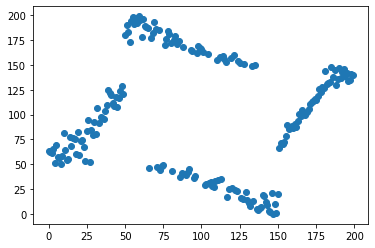

[3000] [6933519, 6933398, 6933130, 6933111, 6933064, 6932992, 6932939, 6932770, 6932561, 6932413] [6926645]


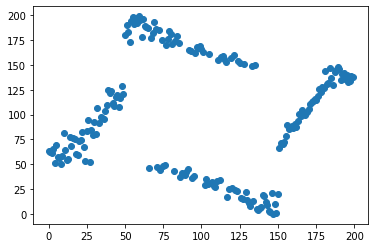

[4000] [6933702, 6933519, 6933398, 6933398, 6933360, 6933130, 6933111, 6933064, 6933064, 6933064] [6927101]


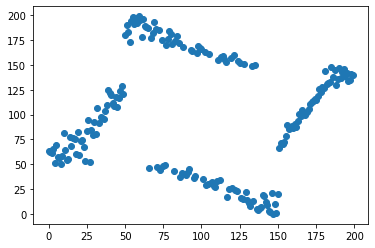

[5000] [6933790, 6933759, 6933702, 6933519, 6933481, 6933398, 6933398, 6933360, 6933360, 6933161] [6927429]


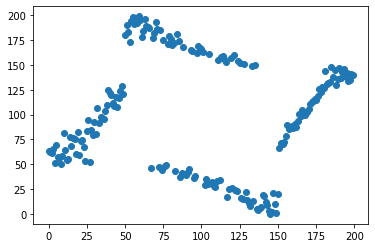

[6000] [6934620, 6933790, 6933790, 6933790, 6933759, 6933728, 6933722, 6933702, 6933519, 6933513] [6928012]


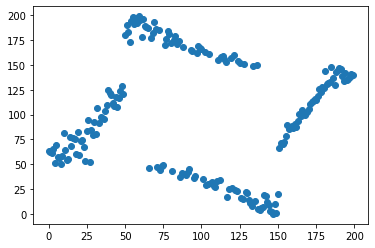

[7000] [6934620, 6934358, 6934358, 6934082, 6933916, 6933855, 6933847, 6933790, 6933790, 6933790] [6928483]


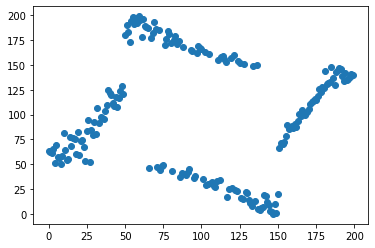

[8000] [6936574, 6934690, 6934620, 6934540, 6934388, 6934383, 6934358, 6934358, 6934358, 6934105] [6929015]


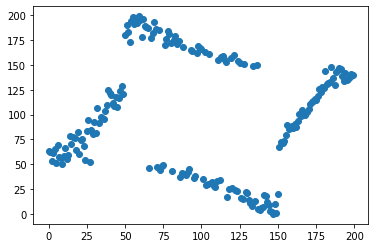

[9000] [6936574, 6934799, 6934705, 6934690, 6934649, 6934631, 6934620, 6934571, 6934540, 6934477] [6929429]


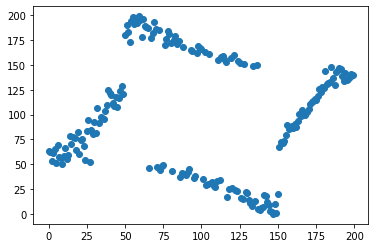

[10000] [6936574, 6935219, 6934985, 6934942, 6934799, 6934765, 6934758, 6934730, 6934705, 6934690] [6930112]


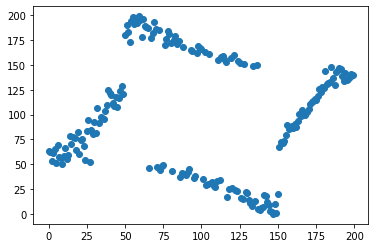

[11000] [6936623, 6936574, 6936203, 6936093, 6935245, 6935219, 6934985, 6934942, 6934920, 6934918] [6930497]


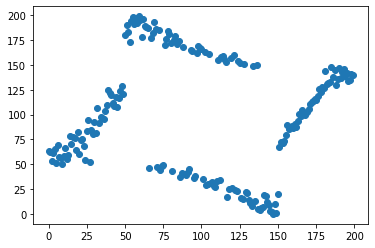

[12000] [6936623, 6936574, 6936203, 6936093, 6936045, 6935922, 6935853, 6935735, 6935735, 6935695] [6931054]


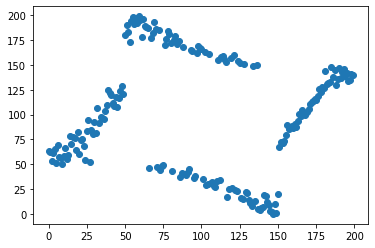

[13000] [6936669, 6936623, 6936623, 6936574, 6936203, 6936202, 6936171, 6936142, 6936101, 6936093] [6931507]


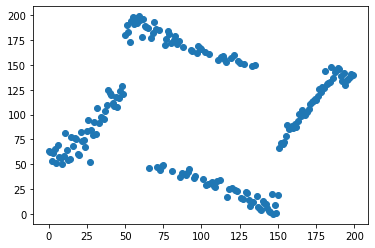

[14000] [6936669, 6936623, 6936623, 6936623, 6936574, 6936526, 6936440, 6936203, 6936203, 6936202] [6932052]


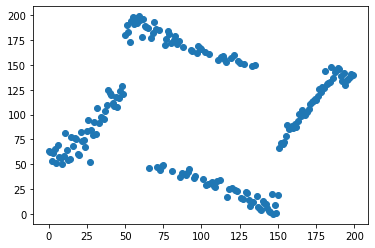

[15000] [6938118, 6938071, 6936872, 6936872, 6936703, 6936669, 6936623, 6936623, 6936623, 6936586] [6932347]


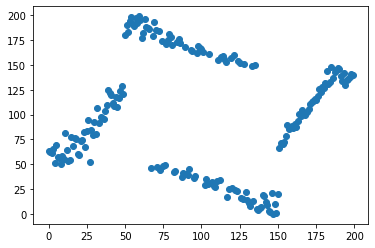

[16000] [6938497, 6938136, 6938118, 6938071, 6936872, 6936872, 6936871, 6936870, 6936870, 6936852] [6932615]


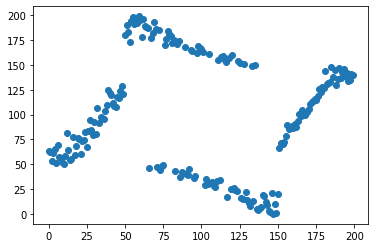

[17000] [6938497, 6938136, 6938118, 6938071, 6938071, 6938030, 6937511, 6937385, 6937329, 6937325] [6933026]


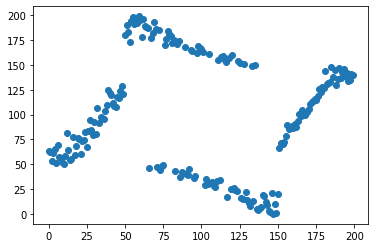

[18000] [6939072, 6939003, 6938881, 6938760, 6938497, 6938151, 6938136, 6938118, 6938071, 6938071] [6933235]


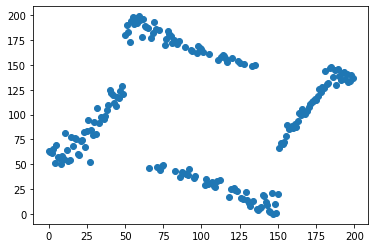

[19000] [6939875, 6939072, 6939003, 6938930, 6938881, 6938859, 6938760, 6938497, 6938151, 6938151] [6933404]


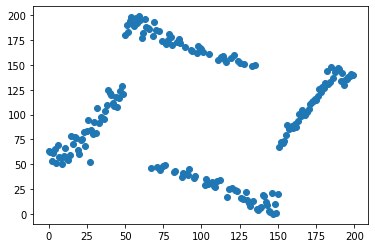

[20000] [6939960, 6939875, 6939481, 6939079, 6939072, 6939072, 6939003, 6938930, 6938930, 6938881] [6933601]


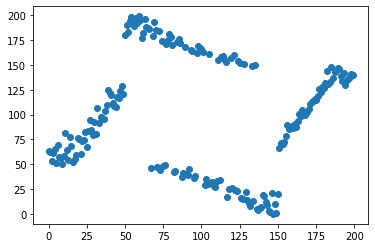

[21000] [6940579, 6939960, 6939875, 6939712, 6939506, 6939481, 6939151, 6939139, 6939108, 6939079] [6933839]


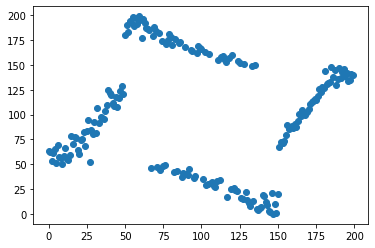

[22000] [6941650, 6940823, 6940579, 6940075, 6939960, 6939875, 6939727, 6939721, 6939712, 6939627] [6934151]


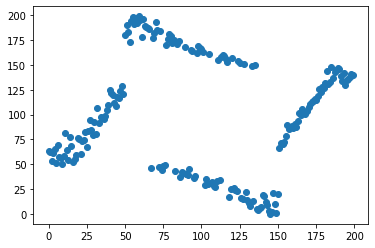

[23000] [6941650, 6940823, 6940695, 6940626, 6940579, 6940075, 6939995, 6939962, 6939960, 6939946] [6934461]


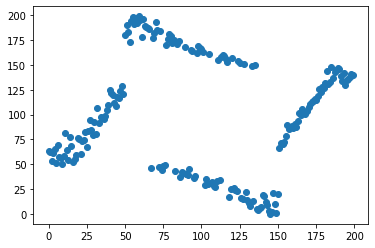

[24000] [6941650, 6940823, 6940695, 6940637, 6940626, 6940592, 6940579, 6940467, 6940365, 6940313] [6934700]


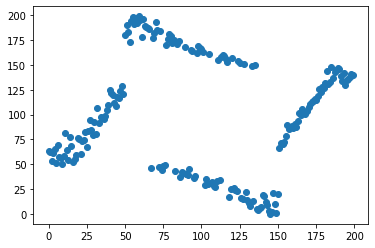

[25000] [6941706, 6941650, 6941603, 6941554, 6941470, 6941417, 6941327, 6940984, 6940924, 6940833] [6935051]


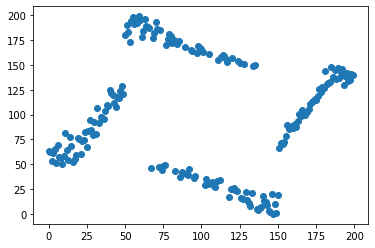

[26000] [6941706, 6941650, 6941603, 6941554, 6941470, 6941417, 6941327, 6941207, 6941207, 6941152] [6935433]


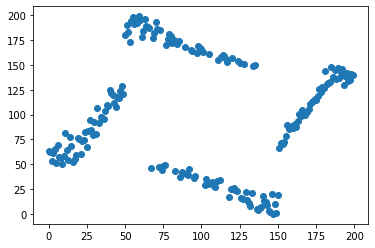

[27000] [6943549, 6943278, 6943157, 6942715, 6942075, 6941983, 6941934, 6941706, 6941668, 6941650] [6936026]


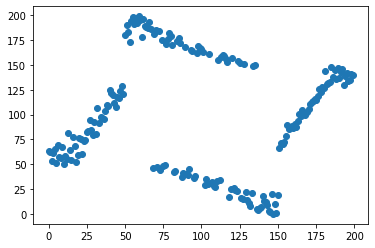

[28000] [6943549, 6943278, 6943278, 6943157, 6942715, 6942474, 6942304, 6942284, 6942123, 6942075] [6936171]


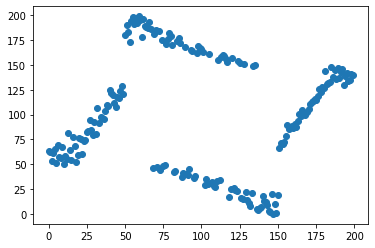

[29000] [6943549, 6943549, 6943507, 6943442, 6943278, 6943278, 6943221, 6943157, 6942755, 6942715] [6936326]


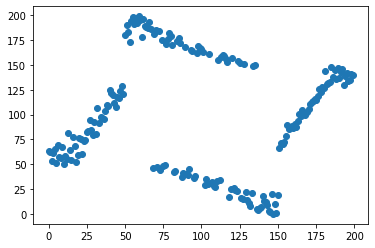

[30000] [6944241, 6944155, 6943874, 6943631, 6943608, 6943549, 6943549, 6943507, 6943463, 6943442] [6936637]


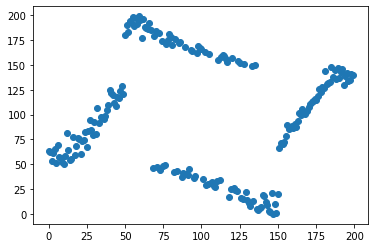

[31000] [6944393, 6944241, 6944181, 6944155, 6944133, 6944101, 6944008, 6943991, 6943955, 6943955] [6936945]


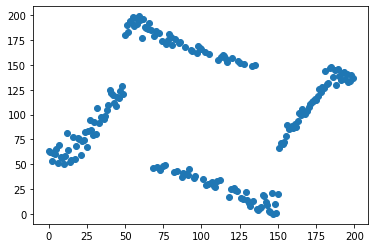

[32000] [6945076, 6944723, 6944393, 6944241, 6944181, 6944176, 6944167, 6944155, 6944133, 6944101] [6937434]


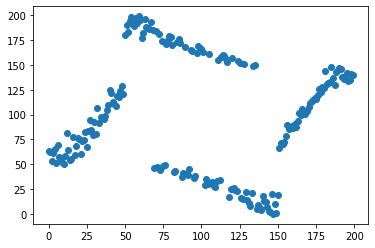

[33000] [6945837, 6945185, 6945076, 6944898, 6944723, 6944603, 6944603, 6944603, 6944538, 6944482] [6937880]


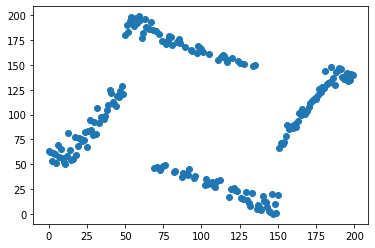

[34000] [6945837, 6945197, 6945197, 6945185, 6945076, 6945072, 6945001, 6944898, 6944815, 6944789] [6938293]


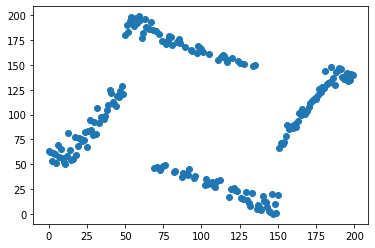

[35000] [6945837, 6945245, 6945197, 6945197, 6945197, 6945197, 6945185, 6945185, 6945179, 6945172] [6938881]


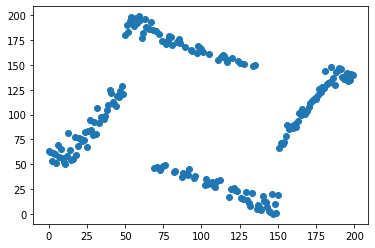

[36000] [6946497, 6945966, 6945837, 6945837, 6945766, 6945732, 6945732, 6945732, 6945732, 6945326] [6939479]


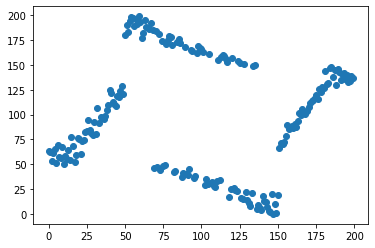

[37000] [6946497, 6946311, 6945966, 6945966, 6945948, 6945884, 6945862, 6945837, 6945837, 6945837] [6939890]


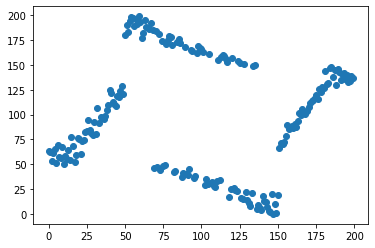

[38000] [6946872, 6946586, 6946497, 6946476, 6946360, 6946330, 6946311, 6946122, 6946122, 6946051] [6940313]


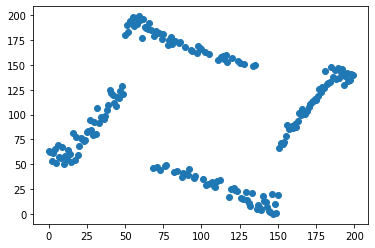

[39000] [6946880, 6946872, 6946828, 6946797, 6946586, 6946586, 6946586, 6946552, 6946525, 6946497] [6940766]


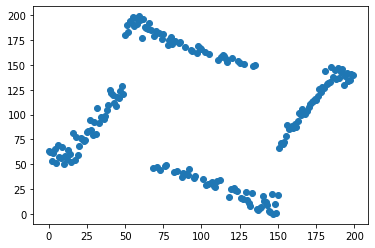

[40000] [6947648, 6947107, 6946921, 6946913, 6946883, 6946880, 6946880, 6946872, 6946828, 6946797] [6941230]


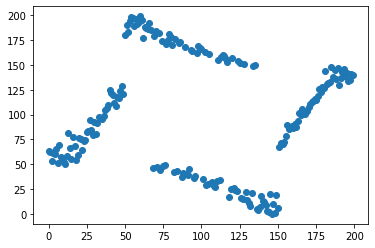

In [18]:
EA207 = Evolutionary_Algorithm_randomcrossover_2413_POP(200,EA206)

[1000] [6947648, 6947107, 6947042, 6946959, 6946921, 6946917, 6946913, 6946883, 6946880, 6946880] [5962366]


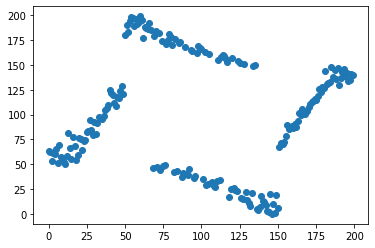

[2000] [6947683, 6947648, 6947617, 6947149, 6947107, 6947083, 6947042, 6947011, 6946959, 6946921] [5766263]


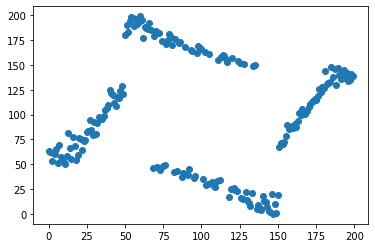

[3000] [6947683, 6947648, 6947617, 6947374, 6947197, 6947149, 6947107, 6947083, 6947042, 6947011] [5754115]


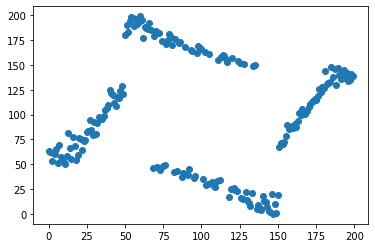

[4000] [6947683, 6947648, 6947617, 6947374, 6947374, 6947197, 6947149, 6947107, 6947107, 6947083] [5754115]


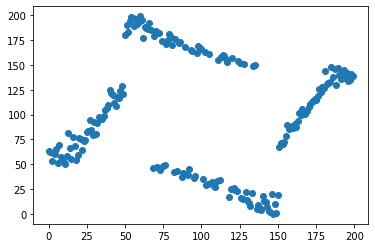

[5000] [6947683, 6947648, 6947617, 6947374, 6947374, 6947197, 6947149, 6947107, 6947107, 6947083] [5653185]


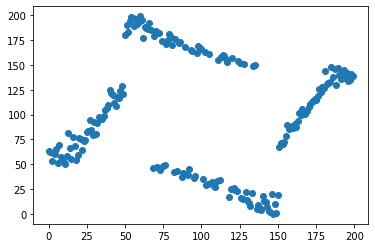

[6000] [6947683, 6947648, 6947617, 6947374, 6947374, 6947197, 6947149, 6947107, 6947107, 6947083] [5653185]


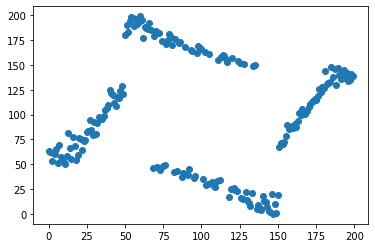

[7000] [6947683, 6947648, 6947617, 6947374, 6947374, 6947203, 6947197, 6947149, 6947119, 6947114] [5653185]


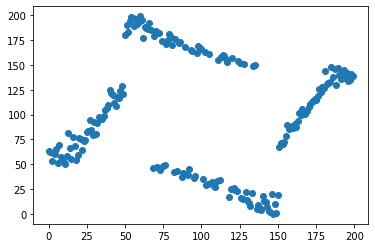

[8000] [6947683, 6947648, 6947617, 6947497, 6947374, 6947374, 6947203, 6947197, 6947149, 6947119] [5653185]


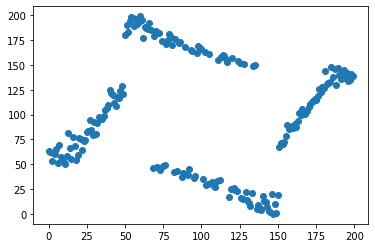

[9000] [6947683, 6947648, 6947617, 6947497, 6947374, 6947374, 6947203, 6947197, 6947197, 6947149] [5653185]


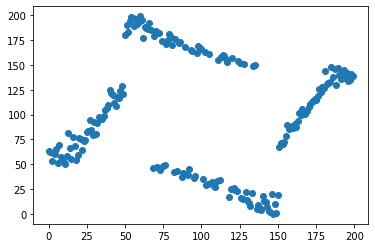

[10000] [6947683, 6947648, 6947617, 6947497, 6947374, 6947374, 6947203, 6947197, 6947197, 6947149] [5653185]


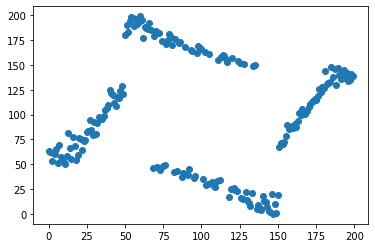

[11000] [6947683, 6947648, 6947617, 6947497, 6947374, 6947374, 6947289, 6947242, 6947203, 6947197] [5653185]


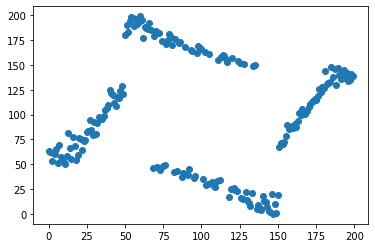

[12000] [6947683, 6947648, 6947617, 6947497, 6947374, 6947374, 6947289, 6947242, 6947203, 6947197] [5653185]


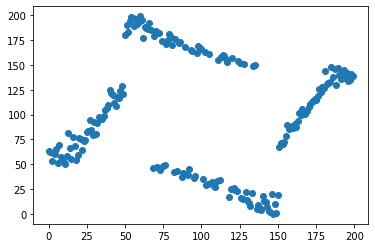

[13000] [6947683, 6947648, 6947617, 6947497, 6947406, 6947374, 6947374, 6947289, 6947242, 6947203] [5653185]


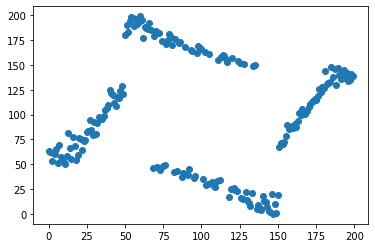

[14000] [6947683, 6947648, 6947617, 6947497, 6947406, 6947374, 6947374, 6947289, 6947242, 6947203] [5653185]


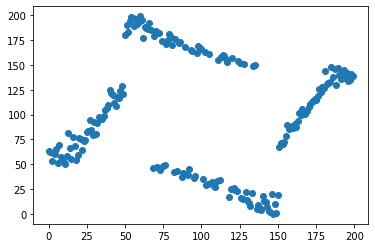

[15000] [6947683, 6947648, 6947617, 6947497, 6947406, 6947374, 6947374, 6947343, 6947318, 6947310] [5653185]


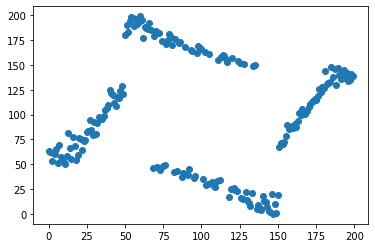

[16000] [6947683, 6947648, 6947617, 6947497, 6947406, 6947374, 6947374, 6947343, 6947318, 6947310] [5653185]


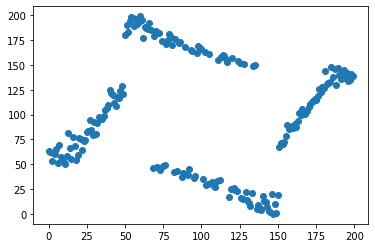

[17000] [6947683, 6947648, 6947617, 6947497, 6947406, 6947374, 6947374, 6947343, 6947318, 6947310] [5653185]


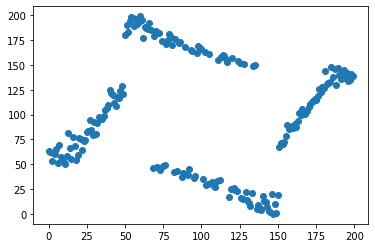

[18000] [6947683, 6947648, 6947617, 6947497, 6947406, 6947374, 6947374, 6947343, 6947318, 6947310] [5653185]


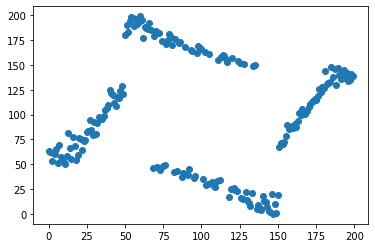

[19000] [6947808, 6947683, 6947648, 6947617, 6947497, 6947406, 6947376, 6947374, 6947374, 6947343] [5653185]


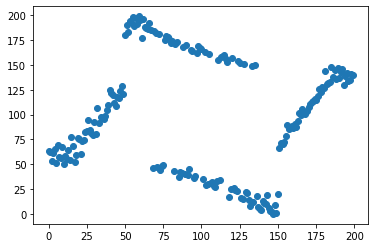

[20000] [6947808, 6947683, 6947648, 6947617, 6947497, 6947406, 6947376, 6947374, 6947374, 6947343] [5653185]


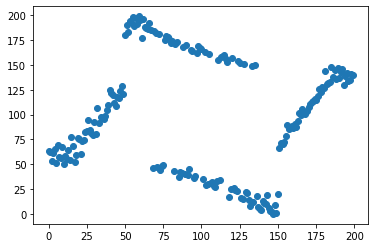

[21000] [6947808, 6947683, 6947648, 6947617, 6947497, 6947406, 6947376, 6947374, 6947374, 6947343] [5653185]


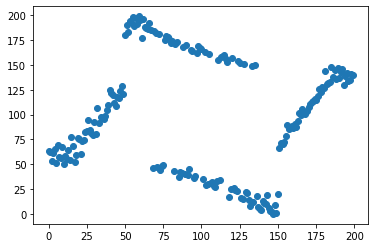

[22000] [6947808, 6947683, 6947648, 6947617, 6947595, 6947497, 6947406, 6947376, 6947374, 6947374] [5653185]


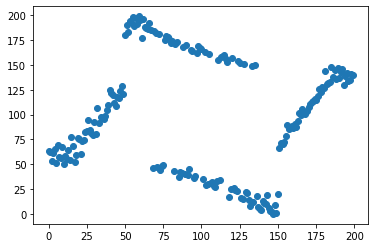

[23000] [6947808, 6947683, 6947648, 6947617, 6947595, 6947503, 6947497, 6947437, 6947406, 6947392] [5653185]


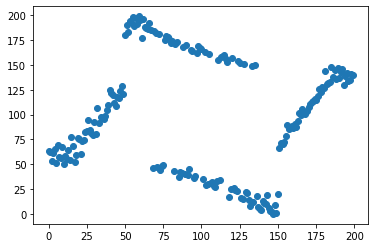

[24000] [6947808, 6947683, 6947648, 6947617, 6947595, 6947503, 6947497, 6947437, 6947406, 6947392] [5653185]


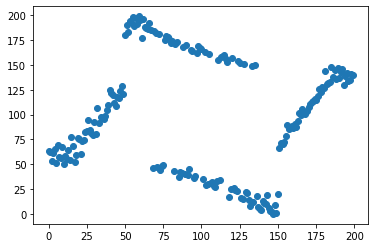

[25000] [6947808, 6947683, 6947648, 6947617, 6947596, 6947595, 6947503, 6947497, 6947437, 6947406] [5620970]


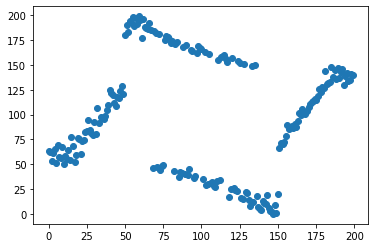

[26000] [6947808, 6947735, 6947683, 6947648, 6947617, 6947596, 6947595, 6947503, 6947497, 6947437] [5620970]


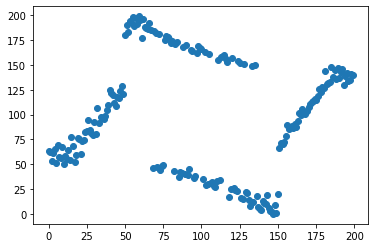

[27000] [6947808, 6947735, 6947683, 6947648, 6947617, 6947596, 6947595, 6947503, 6947497, 6947437] [5620970]


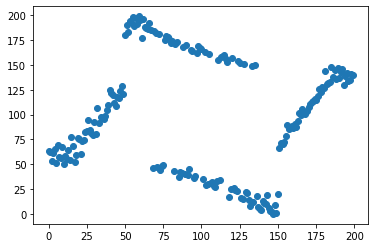

[28000] [6947808, 6947735, 6947683, 6947648, 6947617, 6947596, 6947595, 6947503, 6947497, 6947437] [5620970]


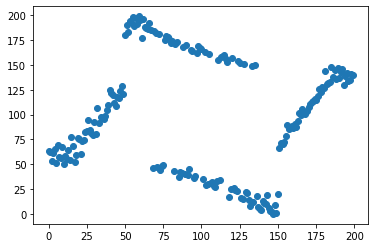

[29000] [6948123, 6947808, 6947735, 6947683, 6947648, 6947617, 6947596, 6947595, 6947503, 6947497] [5620970]


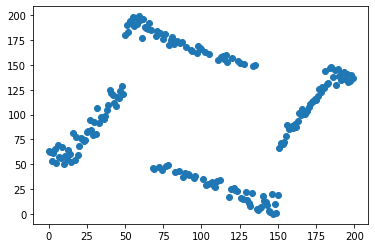

[30000] [6948123, 6947808, 6947735, 6947683, 6947648, 6947617, 6947596, 6947595, 6947503, 6947497] [5620970]


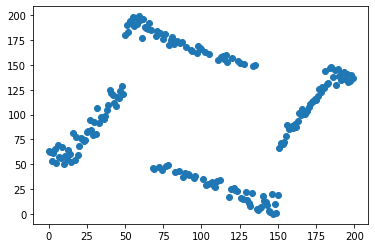

[31000] [6948123, 6947808, 6947735, 6947683, 6947648, 6947617, 6947615, 6947596, 6947595, 6947503] [5620970]


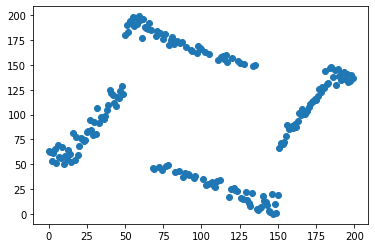

[32000] [6948123, 6948002, 6947808, 6947735, 6947683, 6947648, 6947648, 6947617, 6947615, 6947596] [5620970]


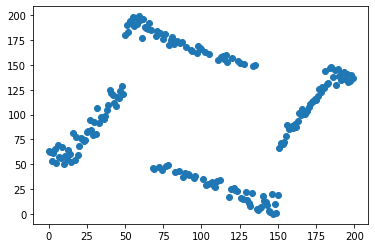

[33000] [6948123, 6948002, 6947808, 6947735, 6947683, 6947648, 6947648, 6947617, 6947615, 6947596] [5620970]


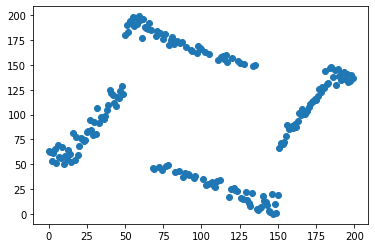

[34000] [6948123, 6948002, 6947808, 6947735, 6947683, 6947648, 6947648, 6947617, 6947615, 6947596] [5620970]


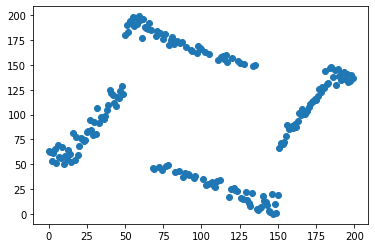

[35000] [6948123, 6948002, 6947808, 6947735, 6947683, 6947648, 6947648, 6947617, 6947615, 6947596] [5620970]


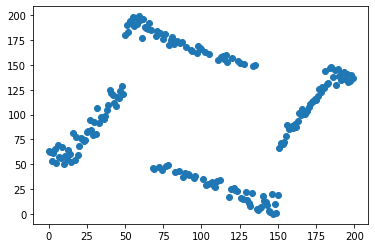

[36000] [6948123, 6948002, 6947808, 6947735, 6947694, 6947683, 6947648, 6947648, 6947617, 6947615] [5620970]


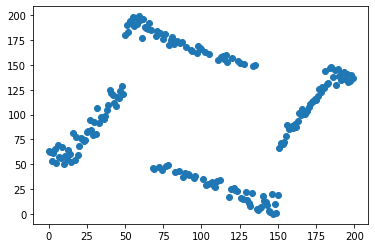

[37000] [6948123, 6948002, 6947808, 6947735, 6947694, 6947683, 6947648, 6947648, 6947620, 6947617] [5620970]


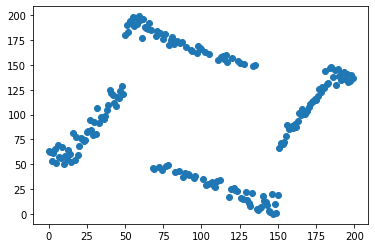

[38000] [6948274, 6948123, 6948011, 6948002, 6947808, 6947735, 6947694, 6947683, 6947648, 6947648] [5620970]


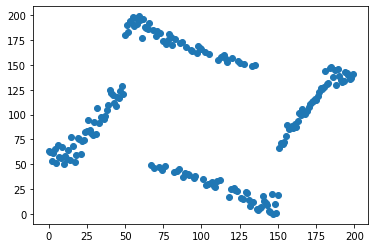

[39000] [6948274, 6948123, 6948011, 6948002, 6947808, 6947735, 6947694, 6947683, 6947648, 6947648] [5620970]


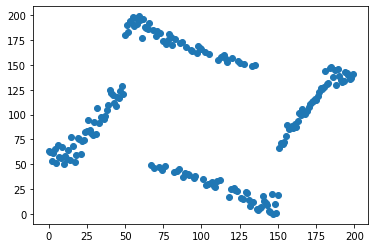

[40000] [6948274, 6948123, 6948011, 6948002, 6947808, 6947735, 6947694, 6947683, 6947648, 6947648] [5620970]


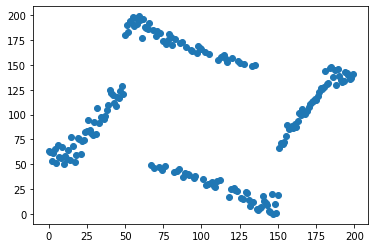

In [20]:
EA208 = Evolutionary_Algorithm_randomcrossover_2413_POP(200,EA207)

[1000] [6948274, 6948123, 6948029, 6948011, 6948002, 6947808, 6947779, 6947760, 6947735, 6947694] [6861384]


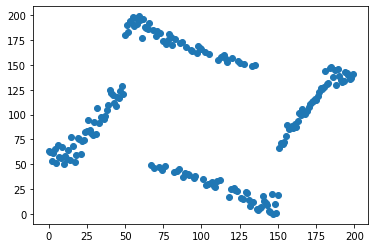

[2000] [6948274, 6948123, 6948029, 6948011, 6948002, 6947808, 6947779, 6947760, 6947735, 6947694] [6864868]


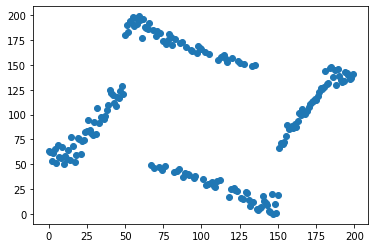

[3000] [6948274, 6948123, 6948029, 6948011, 6948002, 6947882, 6947808, 6947779, 6947760, 6947735] [6868307]


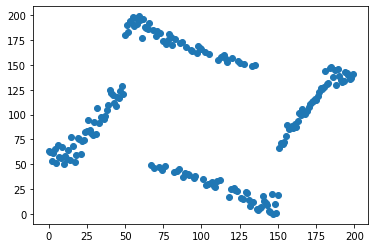

[4000] [6948274, 6948123, 6948029, 6948011, 6948002, 6947882, 6947808, 6947806, 6947779, 6947760] [6871747]


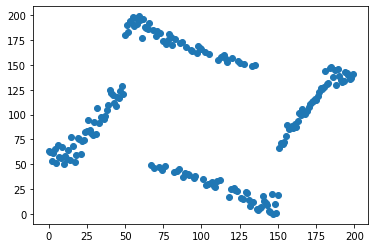

[5000] [6948274, 6948123, 6948090, 6948029, 6948029, 6948011, 6948002, 6947882, 6947808, 6947806] [6875755]


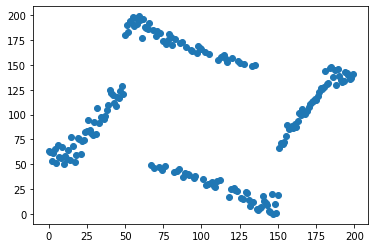

[6000] [6948274, 6948123, 6948090, 6948029, 6948029, 6948011, 6948002, 6947882, 6947808, 6947806] [6878790]


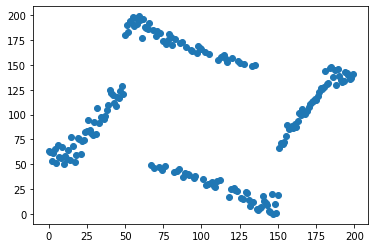

[7000] [6948274, 6948123, 6948090, 6948029, 6948029, 6948023, 6948011, 6948002, 6947882, 6947808] [6881514]


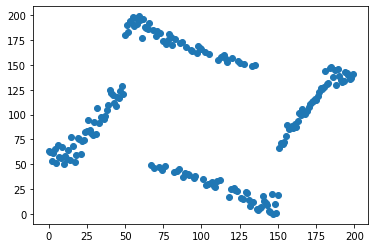

[8000] [6948274, 6948274, 6948123, 6948090, 6948029, 6948029, 6948023, 6948011, 6948002, 6947882] [6884369]


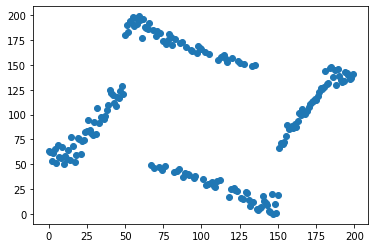

[9000] [6948274, 6948274, 6948247, 6948123, 6948090, 6948029, 6948029, 6948023, 6948011, 6948002] [6887298]


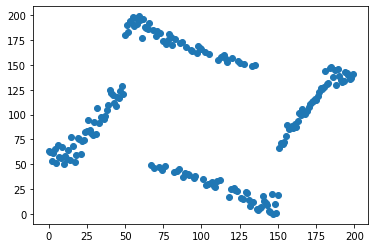

[10000] [6948274, 6948274, 6948247, 6948123, 6948090, 6948029, 6948029, 6948023, 6948011, 6948002] [6889875]


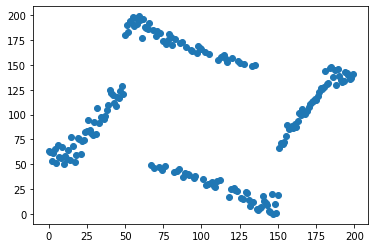

[11000] [6948689, 6948466, 6948450, 6948274, 6948274, 6948247, 6948135, 6948123, 6948090, 6948029] [6892166]


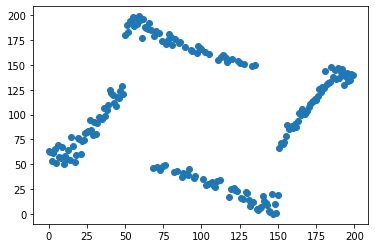

[12000] [6948689, 6948526, 6948466, 6948450, 6948274, 6948274, 6948247, 6948135, 6948123, 6948090] [6894149]


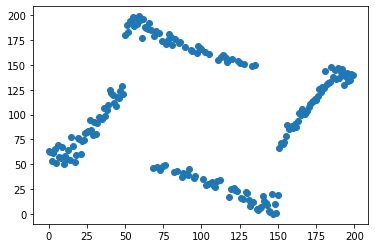

[13000] [6948689, 6948526, 6948466, 6948450, 6948274, 6948274, 6948247, 6948135, 6948123, 6948090] [6896185]


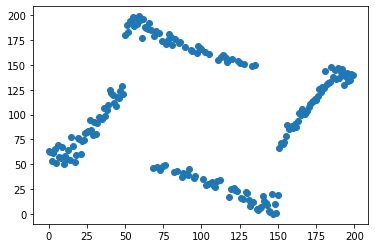

[14000] [6948689, 6948526, 6948466, 6948450, 6948450, 6948427, 6948274, 6948274, 6948247, 6948135] [6898012]


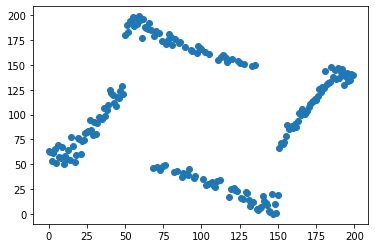

[15000] [6948701, 6948689, 6948526, 6948466, 6948450, 6948450, 6948427, 6948274, 6948274, 6948247] [6899782]


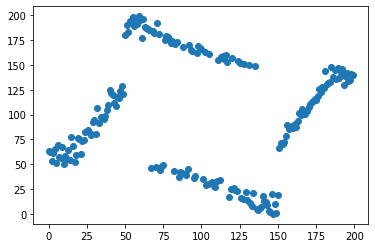

[16000] [6948701, 6948689, 6948526, 6948466, 6948460, 6948450, 6948450, 6948427, 6948274, 6948274] [6901167]


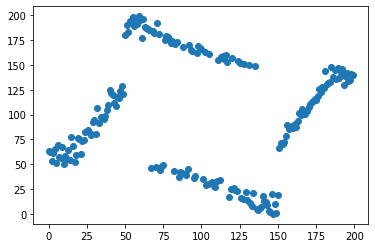

[17000] [6948701, 6948689, 6948526, 6948466, 6948460, 6948450, 6948450, 6948427, 6948347, 6948334] [6902691]


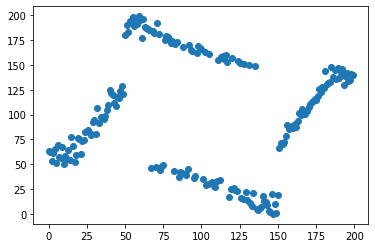

[18000] [6949207, 6948701, 6948689, 6948526, 6948519, 6948466, 6948460, 6948450, 6948450, 6948427] [6904130]


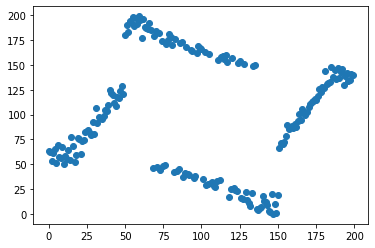

[19000] [6949207, 6949108, 6948701, 6948689, 6948526, 6948519, 6948466, 6948460, 6948450, 6948450] [6906054]


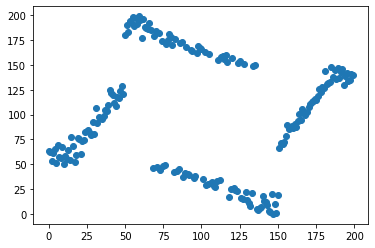

[20000] [6949207, 6949108, 6948701, 6948689, 6948542, 6948526, 6948519, 6948466, 6948460, 6948450] [6907420]


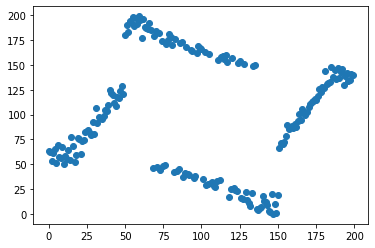

[21000] [6949207, 6949108, 6948701, 6948689, 6948542, 6948526, 6948526, 6948519, 6948466, 6948460] [6908564]


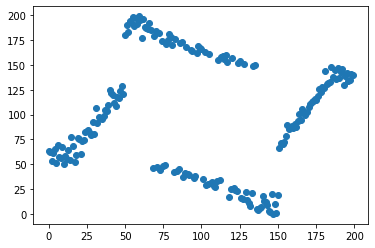

[22000] [6949207, 6949108, 6948943, 6948726, 6948701, 6948689, 6948689, 6948542, 6948526, 6948526] [6909904]


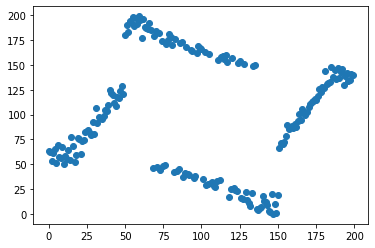

[23000] [6949207, 6949180, 6949108, 6948943, 6948787, 6948726, 6948701, 6948689, 6948689, 6948542] [6911362]


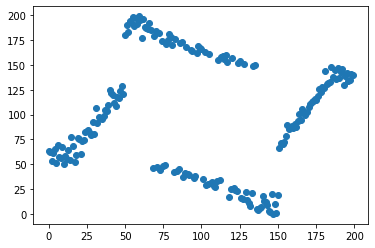

[24000] [6949207, 6949180, 6949108, 6949055, 6948943, 6948938, 6948787, 6948726, 6948701, 6948689] [6912403]


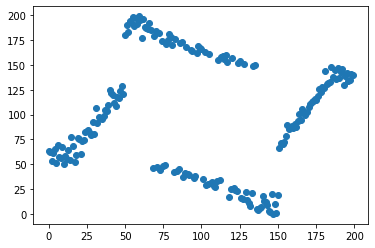

[25000] [6949207, 6949180, 6949108, 6949055, 6948953, 6948943, 6948938, 6948847, 6948840, 6948787] [6913732]


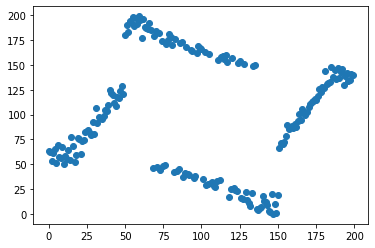

[26000] [6949207, 6949180, 6949108, 6949055, 6949018, 6948989, 6948953, 6948943, 6948938, 6948847] [6915251]


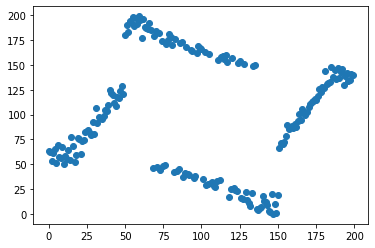

[27000] [6949207, 6949184, 6949180, 6949108, 6949055, 6949018, 6948989, 6948953, 6948943, 6948938] [6916638]


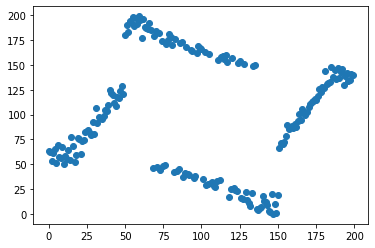

[28000] [6949207, 6949184, 6949180, 6949108, 6949082, 6949055, 6949018, 6948989, 6948953, 6948943] [6917793]


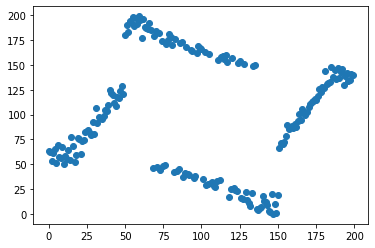

[29000] [6949207, 6949184, 6949180, 6949108, 6949082, 6949055, 6949018, 6948989, 6948953, 6948943] [6918924]


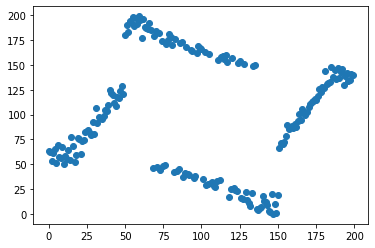

[30000] [6949207, 6949184, 6949180, 6949108, 6949082, 6949055, 6949018, 6948989, 6948953, 6948943] [6920060]


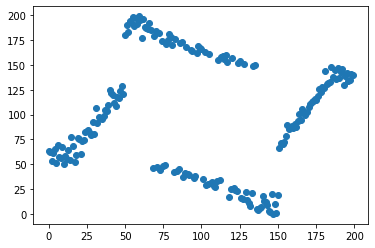

[31000] [6949207, 6949184, 6949180, 6949108, 6949082, 6949055, 6949018, 6948989, 6948953, 6948943] [6921145]


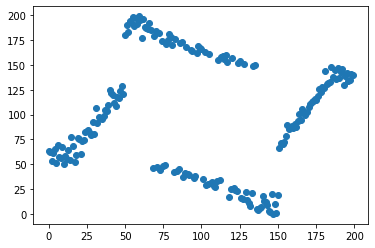

[32000] [6949207, 6949184, 6949180, 6949108, 6949082, 6949055, 6949018, 6948989, 6948953, 6948943] [6922109]


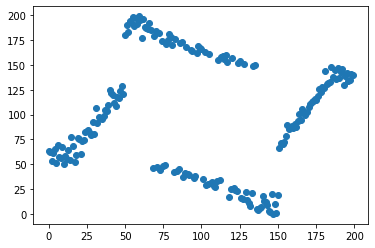

[33000] [6949207, 6949184, 6949180, 6949108, 6949082, 6949055, 6949018, 6948989, 6948953, 6948943] [6923084]


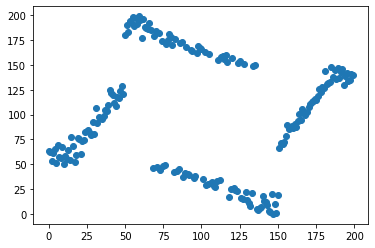

[34000] [6949215, 6949207, 6949184, 6949180, 6949108, 6949082, 6949055, 6949018, 6948989, 6948953] [6924172]


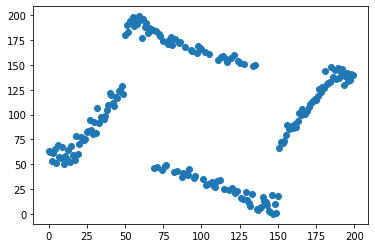

[35000] [6949215, 6949207, 6949184, 6949180, 6949108, 6949082, 6949055, 6949018, 6949018, 6948989] [6925116]


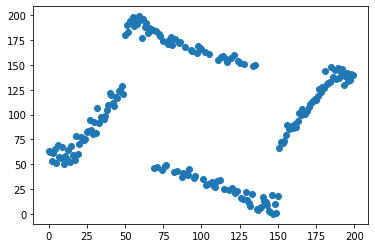

[36000] [6949321, 6949227, 6949215, 6949213, 6949207, 6949184, 6949180, 6949108, 6949082, 6949055] [6925783]


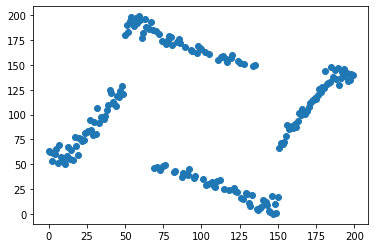

[37000] [6949321, 6949227, 6949215, 6949213, 6949207, 6949184, 6949180, 6949108, 6949082, 6949055] [6926754]


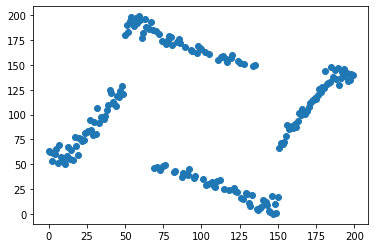

[38000] [6949661, 6949321, 6949227, 6949215, 6949213, 6949207, 6949207, 6949184, 6949180, 6949108] [6927550]


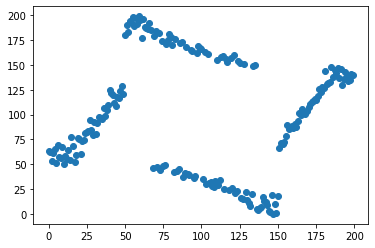

[39000] [6949661, 6949321, 6949227, 6949215, 6949213, 6949207, 6949207, 6949184, 6949180, 6949108] [6928528]


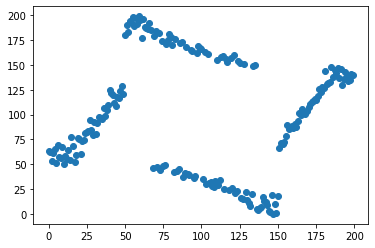

[40000] [6949661, 6949321, 6949227, 6949215, 6949213, 6949207, 6949207, 6949184, 6949180, 6949108] [6929421]


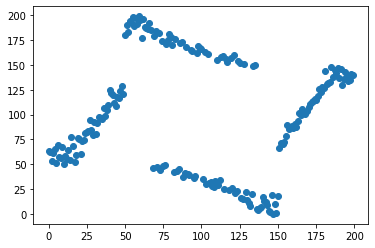

In [23]:
EA209 = Evolutionary_Algorithm_randomcrossover_2413_POP(200,EA208)

In [7]:
for i in range(30):
    print((2*i)**(0.5)+0.5)

0.5
1.9142135623730951
2.5
2.949489742783178
3.3284271247461903
3.6622776601683795
3.9641016151377544
4.241657386773941
4.5
4.742640687119285
4.97213595499958
5.19041575982343
5.398979485566356
5.5990195135927845
5.791502622129181
5.977225575051661
6.156854249492381
6.330951894845301
6.5
6.664414002968976
6.824555320336759
6.98074069840786
7.1332495807108
7.282329983125268
7.428203230275509
7.5710678118654755
7.711102550927978
7.8484692283495345
7.983314773547883
8.115773105863909


In [21]:
len(EA208)

41502